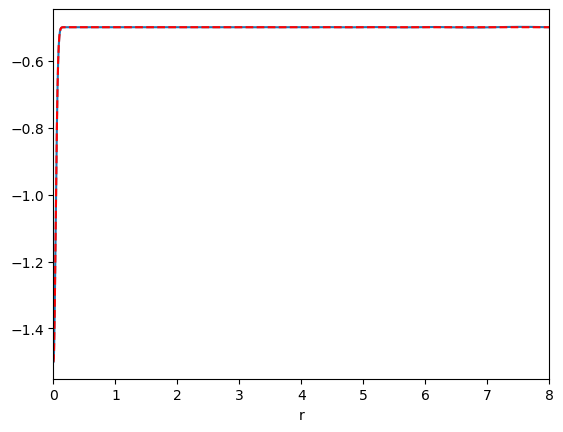

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 100                                                   # Truncation ordem

L0 = 1                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

#r0 = 0

#sigma = 1/2

# L0 = 1 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.76  #  0.7602785  -> disperse ;  # 0.77 -> colapse 

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse 

Phi_c = 1/2

Phi_0 = -1/2

R = 0.05  # 0.7 -> disperse ;  # 0.  -> colapse   A0 substitution

Phi_init = 2*Phi_0*np.exp(-r**2/R**2) - Phi_c          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = 2*Phi_0*np.exp(-rplot**2/R**2) - Phi_c    

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [92]:
r

array([6.12323400e-17, 1.55536929e-02, 3.11149131e-02, 4.66912023e-02,
       6.22901316e-02, 7.79193160e-02, 9.35864295e-02, 1.09299220e-01,
       1.25065525e-01, 1.40893288e-01, 1.56790573e-01, 1.72765585e-01,
       1.88826682e-01, 2.04982399e-01, 2.21241461e-01, 2.37612809e-01,
       2.54105614e-01, 2.70729305e-01, 2.87493588e-01, 3.04408470e-01,
       3.21484286e-01, 3.38731729e-01, 3.56161871e-01, 3.73786202e-01,
       3.91616659e-01, 4.09665660e-01, 4.27946146e-01, 4.46471618e-01,
       4.65256181e-01, 4.84314593e-01, 5.03662314e-01, 5.23315561e-01,
       5.43291369e-01, 5.63607652e-01, 5.84283277e-01, 6.05338140e-01,
       6.26793244e-01, 6.48670795e-01, 6.70994302e-01, 6.93788678e-01,
       7.17080368e-01, 7.40897474e-01, 7.65269902e-01, 7.90229517e-01,
       8.15810324e-01, 8.42048658e-01, 8.68983397e-01, 8.96656206e-01,
       9.25111800e-01, 9.54398238e-01, 9.84567258e-01, 1.01567464e+00,
       1.04778064e+00, 1.08095043e+00, 1.11525465e+00, 1.15076997e+00,
      

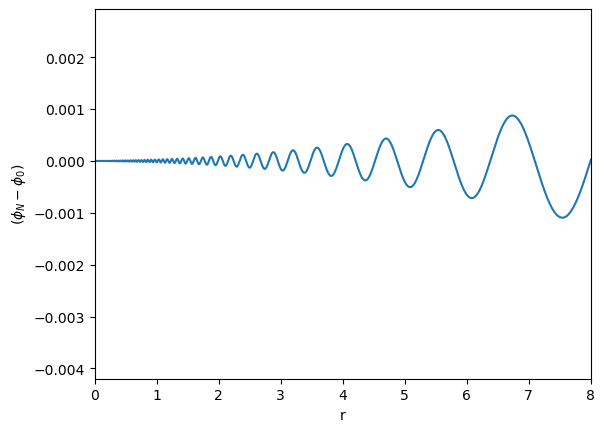

In [93]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$(\phi_N - \phi_0)$")
plt.show()

In [100]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

V = 1/4*(Phi**2 - Phi_0**2)**2

dV = Phi**3 - Phi_0**2 

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-19
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2 - 1/2*rPhi[0]**2 - np.exp(4*Chi[0])*V[0]
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] - 1/2*rPhi[1:N+1]**2 - np.exp(4*Chi[1:N+1])*V[1:N+1]
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin - 4*rChi[0]*np.exp(4*Chi[0])*rpsi[:,0]*V[0]
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] - 4*rChi[1:N+1]*np.exp(4*Chi[1:N+1])*rpsi[:,1:N+1]*V[1:N+1]
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    print(c0)
    break
  n = n + 1
c0

array([-2.11455278e-02,  6.12628652e-03, -8.28189483e-03,  4.44426776e-03,
       -5.47197960e-03,  3.24441765e-03, -3.93038528e-03,  2.38248465e-03,
       -2.90487937e-03,  1.73843072e-03, -2.16640097e-03,  1.24674742e-03,
       -1.61396188e-03,  8.68134786e-04, -1.19314292e-03,  5.76687202e-04,
       -8.70484841e-04,  3.53979272e-04, -6.23380253e-04,  1.86118628e-04,
       -4.35460921e-04,  6.21758452e-05, -2.94270342e-04, -2.66988560e-05,
       -1.89998205e-04, -8.77971154e-05, -1.14748681e-04, -1.27176143e-04,
       -6.20922699e-05, -1.49872060e-04, -2.67740263e-05, -1.60051256e-04,
       -4.51014641e-06, -1.61127042e-04,  8.16455603e-06, -1.55856907e-04,
        1.40191921e-05, -1.46428659e-04,  1.52308721e-05, -1.34539577e-04,
        1.34764144e-05, -1.21470210e-04,  1.00146740e-05, -1.08153149e-04,
        5.76073982e-06, -9.52363863e-05,  1.35237394e-06, -8.31406936e-05,
       -2.79129530e-06, -7.21104783e-05, -6.41885823e-06, -6.22577993e-05,
       -9.40339977e-06, -

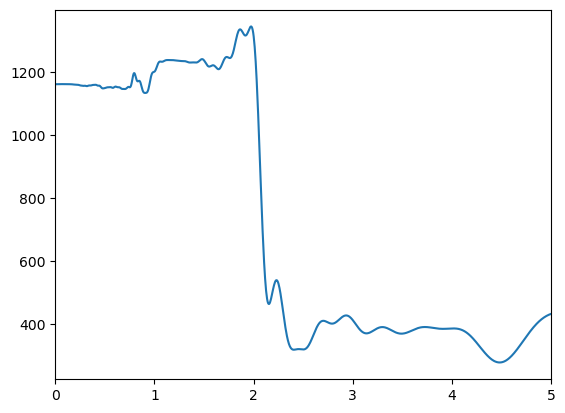

In [96]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [7]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [8]:
np.shape(SB2)

(100, 101)

In [9]:
np.shape(SB1)

(100, 101)

In [10]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [11]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

#filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [12]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)


M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
  
  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]- Alpha[0]*dV[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]- Alpha[0]*dV[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t,'rPi =', max(rPi), sep = '\n') 
    

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

t =
0.0002
rPi =
18.759039852489117
t =
0.0004
rPi =
31.645864710094738
t =
0.0006000000000000001
rPi =
43.01972297704433
t =
0.0008
rPi =
53.46219037972237
t =
0.001
rPi =
63.22104944679047
t =
0.0012000000000000001
rPi =
72.43347821368626
t =
0.0014000000000000002
rPi =
81.1860926516926
t =
0.0016000000000000003
rPi =
89.53818766611559
t =
0.0018000000000000004
rPi =
97.53267612519728
t =
0.0020000000000000005
rPi =
105.20192520932333
t =
0.0022000000000000006
rPi =
112.57115706382771
t =
0.0024000000000000007
rPi =
119.6605644835176
t =
0.0026000000000000007
rPi =
126.48669533630355
t =
0.002800000000000001
rPi =
133.06339514833425
t =
0.003000000000000001
rPi =
139.40246943745774
t =
0.003200000000000001
rPi =
145.51416103880445
t =
0.003400000000000001
rPi =
151.4075011725129
t =
0.003600000000000001
rPi =
157.09057191202248
t =
0.0038000000000000013
rPi =
162.57070499377554
t =
0.004000000000000001
rPi =
167.854633956496
t =
0.004200000000000001
rPi =
172.94861146824414
t =
0.004

t =
0.03619999999999989
rPi =
386.14562958654335
t =
0.03639999999999989
rPi =
387.52113124687787
t =
0.03659999999999989
rPi =
388.8882972698677
t =
0.03679999999999989
rPi =
390.2471975291453
t =
0.03699999999999989
rPi =
391.59790107229827
t =
0.037199999999999886
rPi =
392.9404761327997
t =
0.037399999999999885
rPi =
394.2749901415478
t =
0.037599999999999884
rPi =
395.60150973853166
t =
0.03779999999999988
rPi =
396.9201007841153
t =
0.03799999999999988
rPi =
398.23082837030677
t =
0.03819999999999988
rPi =
399.5337568319093
t =
0.03839999999999988
rPi =
400.8289497571817
t =
0.03859999999999988
rPi =
402.11646999898477
t =
0.038799999999999876
rPi =
403.3963796851664
t =
0.038999999999999875
rPi =
404.6687402290787
t =
0.039199999999999874
rPi =
405.93361234002236
t =
0.03939999999999987
rPi =
407.1910560333054
t =
0.03959999999999987
rPi =
408.441130640362
t =
0.03979999999999987
rPi =
409.6838948185934
t =
0.03999999999999987
rPi =
410.919406561226
t =
0.04019999999999987
rPi =

t =
0.07099999999999998
rPi =
540.202843747482
t =
0.07119999999999999
rPi =
540.7507157261052
t =
0.07139999999999999
rPi =
541.2959662542181
t =
0.0716
rPi =
541.8386096896738
t =
0.0718
rPi =
542.3786602897026
t =
0.07200000000000001
rPi =
542.9161322117301
t =
0.07220000000000001
rPi =
543.4510395143824
t =
0.07240000000000002
rPi =
543.9833961583727
t =
0.07260000000000003
rPi =
544.5132160073637
t =
0.07280000000000003
rPi =
545.0405128288467
t =
0.07300000000000004
rPi =
545.56530029495
t =
0.07320000000000004
rPi =
546.0875919833734
t =
0.07340000000000005
rPi =
546.607401378194
t =
0.07360000000000005
rPi =
547.1247418707432
t =
0.07380000000000006
rPi =
547.6396267603392
t =
0.07400000000000007
rPi =
548.1520692552132
t =
0.07420000000000007
rPi =
548.6620824732187
t =
0.07440000000000008
rPi =
549.1696794427114
t =
0.07460000000000008
rPi =
549.6748731032786
t =
0.07480000000000009
rPi =
550.1776763065451
t =
0.0750000000000001
rPi =
550.6781018169382
t =
0.0752000000000001


t =
0.10920000000000107
rPi =
609.6462604853479
t =
0.10940000000000108
rPi =
609.8733564270581
t =
0.10960000000000109
rPi =
610.0994240212599
t =
0.10980000000000109
rPi =
610.3244678482675
t =
0.1100000000000011
rPi =
610.5484924645914
t =
0.1102000000000011
rPi =
610.7715024032298
t =
0.11040000000000111
rPi =
610.993502173709
t =
0.11060000000000111
rPi =
611.2144962622797
t =
0.11080000000000112
rPi =
611.4344891320796
t =
0.11100000000000113
rPi =
611.6534852232362
t =
0.11120000000000113
rPi =
611.8714889530322
t =
0.11140000000000114
rPi =
612.088504716048
t =
0.11160000000000114
rPi =
612.3045368843074
t =
0.11180000000000115
rPi =
612.5195898074202
t =
0.11200000000000115
rPi =
612.7336678126725
t =
0.11220000000000116
rPi =
612.9467752052742
t =
0.11240000000000117
rPi =
613.1589162683676
t =
0.11260000000000117
rPi =
613.3700952632366
t =
0.11280000000000118
rPi =
613.5803164294817
t =
0.11300000000000118
rPi =
613.7895839850564
t =
0.11320000000000119
rPi =
613.9979021264

t =
0.15360000000000235
rPi =
641.2402295981403
t =
0.15380000000000235
rPi =
641.3197177630535
t =
0.15400000000000236
rPi =
641.398800515431
t =
0.15420000000000236
rPi =
641.4774794707063
t =
0.15440000000000237
rPi =
641.5557562373862
t =
0.15460000000000237
rPi =
641.6336324170611
t =
0.15480000000000238
rPi =
641.7111096044847
t =
0.15500000000000239
rPi =
641.7881893875582
t =
0.1552000000000024
rPi =
641.8648733474247
t =
0.1554000000000024
rPi =
641.9411630584052
t =
0.1556000000000024
rPi =
642.017060088138
t =
0.1558000000000024
rPi =
642.092565997553
t =
0.15600000000000241
rPi =
642.1676823409024
t =
0.15620000000000242
rPi =
642.2424106658149
t =
0.15640000000000243
rPi =
642.3167525133472
t =
0.15660000000000243
rPi =
642.3907094179414
t =
0.15680000000000244
rPi =
642.464282907555
t =
0.15700000000000244
rPi =
642.5374745036034
t =
0.15720000000000245
rPi =
642.610285721061
t =
0.15740000000000245
rPi =
642.6827180684553
t =
0.15760000000000246
rPi =
642.7547730478842
t

t =
0.19240000000000346
rPi =
650.6732520784309
t =
0.19260000000000346
rPi =
650.6976356737543
t =
0.19280000000000347
rPi =
650.7218296005975
t =
0.19300000000000347
rPi =
650.745834593783
t =
0.19320000000000348
rPi =
650.769651385304
t =
0.19340000000000349
rPi =
650.7932807043682
t =
0.1936000000000035
rPi =
650.8167232773552
t =
0.1938000000000035
rPi =
650.839979827887
t =
0.1940000000000035
rPi =
650.8630510767937
t =
0.1942000000000035
rPi =
650.8859377421422
t =
0.19440000000000351
rPi =
650.90864053927
t =
0.19460000000000352
rPi =
650.9311601807683
t =
0.19480000000000353
rPi =
650.9534973764963
t =
0.19500000000000353
rPi =
650.975652833615
t =
0.19520000000000354
rPi =
650.9976272565665
t =
0.19540000000000354
rPi =
651.0194213471124
t =
0.19560000000000355
rPi =
651.0410358043428
t =
0.19580000000000355
rPi =
651.0624713246721
t =
0.19600000000000356
rPi =
651.0837286018652
t =
0.19620000000000357
rPi =
651.1048083270142
t =
0.19640000000000357
rPi =
651.1257111886398
t 

t =
0.2322000000000046
rPi =
652.5868063129914
t =
0.2324000000000046
rPi =
652.5849223732844
t =
0.2326000000000046
rPi =
652.582952111595
t =
0.23280000000000461
rPi =
652.5808958814274
t =
0.23300000000000462
rPi =
652.5787540350034
t =
0.23320000000000463
rPi =
652.5765269233322
t =
0.23340000000000463
rPi =
652.5742148961788
t =
0.23360000000000464
rPi =
652.5718183020903
t =
0.23380000000000464
rPi =
652.5693374883705
t =
0.23400000000000465
rPi =
652.5667728011148
t =
0.23420000000000465
rPi =
652.5641245851837
t =
0.23440000000000466
rPi =
652.5613931842537
t =
0.23460000000000467
rPi =
652.5585789407716
t =
0.23480000000000467
rPi =
652.5556821959945
t =
0.23500000000000468
rPi =
652.5527032899781
t =
0.23520000000000468
rPi =
652.5496425615855
t =
0.2354000000000047
rPi =
652.5465003484835
t =
0.2356000000000047
rPi =
652.5432769871616
t =
0.2358000000000047
rPi =
652.5399728129402
t =
0.2360000000000047
rPi =
652.5365881599553
t =
0.2362000000000047
rPi =
652.5331233611558
t

t =
0.27700000000000213
rPi =
650.5536864270485
t =
0.2772000000000021
rPi =
650.5394060913297
t =
0.2774000000000021
rPi =
650.5250946615731
t =
0.27760000000000207
rPi =
650.5107523022239
t =
0.27780000000000205
rPi =
650.4963791771999
t =
0.278000000000002
rPi =
650.4819754498543
t =
0.278200000000002
rPi =
650.467541283015
t =
0.278400000000002
rPi =
650.4530768389689
t =
0.27860000000000196
rPi =
650.4385822794417
t =
0.27880000000000194
rPi =
650.4240577656544
t =
0.2790000000000019
rPi =
650.4095034582541
t =
0.2792000000000019
rPi =
650.3949195173832
t =
0.27940000000000187
rPi =
650.3803061026382
t =
0.27960000000000185
rPi =
650.3656633731049
t =
0.2798000000000018
rPi =
650.350991487299
t =
0.2800000000000018
rPi =
650.3362906032534
t =
0.2802000000000018
rPi =
650.3215608784596
t =
0.28040000000000176
rPi =
650.3068024698579
t =
0.28060000000000174
rPi =
650.2920155339222
t =
0.2808000000000017
rPi =
650.2772002265637
t =
0.2810000000000017
rPi =
650.2623567032009
t =
0.281

t =
0.3153999999999979
rPi =
647.4061633534013
t =
0.3155999999999979
rPi =
647.3883836192394
t =
0.31579999999999786
rPi =
647.3705961874132
t =
0.31599999999999784
rPi =
647.3528011449987
t =
0.3161999999999978
rPi =
647.3349985787936
t =
0.3163999999999978
rPi =
647.3171885752909
t =
0.31659999999999777
rPi =
647.2993712206886
t =
0.31679999999999775
rPi =
647.2815466009342
t =
0.31699999999999773
rPi =
647.2637148016672
t =
0.3171999999999977
rPi =
647.2458759082365
t =
0.3173999999999977
rPi =
647.2280300057346
t =
0.31759999999999766
rPi =
647.2101771789462
t =
0.31779999999999764
rPi =
647.1923175123892
t =
0.3179999999999976
rPi =
647.1744510903015
t =
0.3181999999999976
rPi =
647.1565779966186
t =
0.3183999999999976
rPi =
647.1386983150394
t =
0.31859999999999755
rPi =
647.1208121289617
t =
0.31879999999999753
rPi =
647.102919521493
t =
0.3189999999999975
rPi =
647.0850205755039
t =
0.3191999999999975
rPi =
647.0671153735481
t =
0.31939999999999746
rPi =
647.0492039979362
t =


t =
0.3569999999999933
rPi =
643.651708295127
t =
0.3571999999999933
rPi =
643.6338373252075
t =
0.3573999999999933
rPi =
643.6159717230775
t =
0.35759999999999326
rPi =
643.5981115318309
t =
0.35779999999999323
rPi =
643.5802567944146
t =
0.3579999999999932
rPi =
643.5624075536142
t =
0.3581999999999932
rPi =
643.5445638520936
t =
0.35839999999999317
rPi =
643.5267257323405
t =
0.35859999999999315
rPi =
643.5088932367009
t =
0.3587999999999931
rPi =
643.4910664073843
t =
0.3589999999999931
rPi =
643.4732452864439
t =
0.3591999999999931
rPi =
643.4554299157909
t =
0.35939999999999306
rPi =
643.4376203371813
t =
0.35959999999999304
rPi =
643.4198165922356
t =
0.359799999999993
rPi =
643.4020187224182
t =
0.359999999999993
rPi =
643.3842267690601
t =
0.36019999999999297
rPi =
643.3664407733303
t =
0.36039999999999295
rPi =
643.3486607762715
t =
0.3605999999999929
rPi =
643.3308868187816
t =
0.3607999999999929
rPi =
643.313118941604
t =
0.3609999999999929
rPi =
643.2953571853362
t =
0.361

t =
0.39579999999998905
rPi =
640.3291866570934
t =
0.395999999999989
rPi =
640.3130074378874
t =
0.396199999999989
rPi =
640.2968396138851
t =
0.396399999999989
rPi =
640.2806832061551
t =
0.39659999999998896
rPi =
640.2645382356908
t =
0.39679999999998894
rPi =
640.2484047234043
t =
0.3969999999999889
rPi =
640.2322826901186
t =
0.3971999999999889
rPi =
640.2161721565802
t =
0.3973999999999889
rPi =
640.2000731434533
t =
0.39759999999998885
rPi =
640.1839856713133
t =
0.39779999999998883
rPi =
640.167909760661
t =
0.3979999999999888
rPi =
640.1518454319076
t =
0.3981999999999888
rPi =
640.1357927053871
t =
0.39839999999998876
rPi =
640.1197516013673
t =
0.39859999999998874
rPi =
640.1037221400046
t =
0.3987999999999887
rPi =
640.0877043413952
t =
0.3989999999999887
rPi =
640.0716982255574
t =
0.3991999999999887
rPi =
640.0557038124103
t =
0.39939999999998865
rPi =
640.0397211218196
t =
0.39959999999998863
rPi =
640.0237501735605
t =
0.3997999999999886
rPi =
640.0077909873014
t =
0.39

t =
0.43119999999998515
rPi =
637.6591267169904
t =
0.43139999999998513
rPi =
637.6452259419169
t =
0.4315999999999851
rPi =
637.6313391946704
t =
0.4317999999999851
rPi =
637.6174664848564
t =
0.43199999999998506
rPi =
637.6036078220548
t =
0.43219999999998504
rPi =
637.5897632157795
t =
0.432399999999985
rPi =
637.5759326754926
t =
0.432599999999985
rPi =
637.5621162106222
t =
0.432799999999985
rPi =
637.5483138305369
t =
0.43299999999998495
rPi =
637.534525544564
t =
0.43319999999998493
rPi =
637.520751361974
t =
0.4333999999999849
rPi =
637.5069912920002
t =
0.4335999999999849
rPi =
637.4932453438167
t =
0.43379999999998486
rPi =
637.4795135265632
t =
0.43399999999998484
rPi =
637.4657958493194
t =
0.4341999999999848
rPi =
637.4520923211123
t =
0.4343999999999848
rPi =
637.4384029509549
t =
0.4345999999999848
rPi =
637.4247277477758
t =
0.43479999999998475
rPi =
637.4110667204686
t =
0.43499999999998473
rPi =
637.3974198778865
t =
0.4351999999999847
rPi =
637.3837872288327
t =
0.43

t =
0.47199999999998066
rPi =
635.1241756907008
t =
0.47219999999998064
rPi =
635.113276543971
t =
0.4723999999999806
rPi =
635.102392549401
t =
0.4725999999999806
rPi =
635.0915237091257
t =
0.47279999999998057
rPi =
635.0806700252297
t =
0.47299999999998055
rPi =
635.0698314998252
t =
0.4731999999999805
rPi =
635.059008134938
t =
0.4733999999999805
rPi =
635.048199932615
t =
0.4735999999999805
rPi =
635.0374068948395
t =
0.47379999999998046
rPi =
635.0266290236025
t =
0.47399999999998044
rPi =
635.0158663208372
t =
0.4741999999999804
rPi =
635.0051187884716
t =
0.4743999999999804
rPi =
634.9943864284086
t =
0.47459999999998037
rPi =
634.9836692425134
t =
0.47479999999998035
rPi =
634.9729672326243
t =
0.4749999999999803
rPi =
634.9622804005788
t =
0.4751999999999803
rPi =
634.9516087481469
t =
0.4753999999999803
rPi =
634.9409522771143
t =
0.47559999999998026
rPi =
634.9303109892244
t =
0.47579999999998024
rPi =
634.9196848861875
t =
0.4759999999999802
rPi =
634.9090739697041
t =
0.4

t =
0.5131999999999761
rPi =
633.2002354468575
t =
0.5133999999999761
rPi =
633.1924698540457
t =
0.5135999999999761
rPi =
633.1847193933462
t =
0.513799999999976
rPi =
633.1769840628668
t =
0.513999999999976
rPi =
633.1692638606488
t =
0.514199999999976
rPi =
633.1615587847477
t =
0.514399999999976
rPi =
633.1538688332065
t =
0.514599999999976
rPi =
633.1461940040529
t =
0.5147999999999759
rPi =
633.1385342952929
t =
0.5149999999999759
rPi =
633.1308897049196
t =
0.5151999999999759
rPi =
633.1232602309163
t =
0.5153999999999759
rPi =
633.1156458712542
t =
0.5155999999999759
rPi =
633.1080466238802
t =
0.5157999999999758
rPi =
633.1004624867505
t =
0.5159999999999758
rPi =
633.0928934577757
t =
0.5161999999999758
rPi =
633.0853395348795
t =
0.5163999999999758
rPi =
633.0778007159631
t =
0.5165999999999757
rPi =
633.0702769989101
t =
0.5167999999999757
rPi =
633.0627683815995
t =
0.5169999999999757
rPi =
633.055274861886
t =
0.5171999999999757
rPi =
633.0477964376194
t =
0.5173999999999

t =
0.5541999999999716
rPi =
631.9210973215557
t =
0.5543999999999716
rPi =
631.9163766240085
t =
0.5545999999999716
rPi =
631.9116704257787
t =
0.5547999999999715
rPi =
631.9069787228285
t =
0.5549999999999715
rPi =
631.9023015111156
t =
0.5551999999999715
rPi =
631.8976387865923
t =
0.5553999999999715
rPi =
631.8929905452233
t =
0.5555999999999715
rPi =
631.8883567829297
t =
0.5557999999999714
rPi =
631.8837374956497
t =
0.5559999999999714
rPi =
631.8791326793064
t =
0.5561999999999714
rPi =
631.8745423298317
t =
0.5563999999999714
rPi =
631.869966443127
t =
0.5565999999999713
rPi =
631.8654050150914
t =
0.5567999999999713
rPi =
631.8608580416295
t =
0.5569999999999713
rPi =
631.8563255186353
t =
0.5571999999999713
rPi =
631.8518074419819
t =
0.5573999999999713
rPi =
631.8473038075575
t =
0.5575999999999712
rPi =
631.8428146112228
t =
0.5577999999999712
rPi =
631.8383398488477
t =
0.5579999999999712
rPi =
631.833879516286
t =
0.5581999999999712
rPi =
631.8294336093859
t =
0.558399999

t =
0.595799999999967
rPi =
631.2448966249168
t =
0.595999999999967
rPi =
631.2430959938404
t =
0.596199999999967
rPi =
631.2413088997167
t =
0.596399999999967
rPi =
631.2395353374415
t =
0.5965999999999669
rPi =
631.237775301916
t =
0.5967999999999669
rPi =
631.2360287880547
t =
0.5969999999999669
rPi =
631.2342957907314
t =
0.5971999999999669
rPi =
631.2325763048495
t =
0.5973999999999668
rPi =
631.2308703252952
t =
0.5975999999999668
rPi =
631.229177846952
t =
0.5977999999999668
rPi =
631.2274988647002
t =
0.5979999999999668
rPi =
631.2258333734147
t =
0.5981999999999668
rPi =
631.2241813679767
t =
0.5983999999999667
rPi =
631.222542843253
t =
0.5985999999999667
rPi =
631.2209177941112
t =
0.5987999999999667
rPi =
631.2193062154228
t =
0.5989999999999667
rPi =
631.2177081020477
t =
0.5991999999999666
rPi =
631.2161234488351
t =
0.5993999999999666
rPi =
631.2145522506448
t =
0.5995999999999666
rPi =
631.2129945023252
t =
0.5997999999999666
rPi =
631.2114501987413
t =
0.59999999999996

t =
0.6379999999999624
rPi =
631.1567785817487
t =
0.6381999999999624
rPi =
631.1577170885688
t =
0.6383999999999623
rPi =
631.1586680000742
t =
0.6385999999999623
rPi =
631.1596313107011
t =
0.6387999999999623
rPi =
631.1606070148871
t =
0.6389999999999623
rPi =
631.1615951070439
t =
0.6391999999999622
rPi =
631.1625955816337
t =
0.6393999999999622
rPi =
631.163608433066
t =
0.6395999999999622
rPi =
631.1646336557693
t =
0.6397999999999622
rPi =
631.1656712441836
t =
0.6399999999999622
rPi =
631.1667211927316
t =
0.6401999999999621
rPi =
631.167783495829
t =
0.6403999999999621
rPi =
631.1688581479118
t =
0.6405999999999621
rPi =
631.1699451434022
t =
0.6407999999999621
rPi =
631.1710444767122
t =
0.640999999999962
rPi =
631.1721561422629
t =
0.641199999999962
rPi =
631.1732801344816
t =
0.641399999999962
rPi =
631.1744164477766
t =
0.641599999999962
rPi =
631.1755650765758
t =
0.641799999999962
rPi =
631.1767260152853
t =
0.6419999999999619
rPi =
631.1778992583234
t =
0.64219999999996

t =
0.678199999999958
rPi =
631.5872666012051
t =
0.6783999999999579
rPi =
631.590585337007
t =
0.6785999999999579
rPi =
631.5939153419541
t =
0.6787999999999579
rPi =
631.5972566103645
t =
0.6789999999999579
rPi =
631.6006091365339
t =
0.6791999999999578
rPi =
631.6039729147581
t =
0.6793999999999578
rPi =
631.6073479393499
t =
0.6795999999999578
rPi =
631.610734204606
t =
0.6797999999999578
rPi =
631.6141317048277
t =
0.6799999999999577
rPi =
631.6175404343197
t =
0.6801999999999577
rPi =
631.6209603873842
t =
0.6803999999999577
rPi =
631.6243915583165
t =
0.6805999999999577
rPi =
631.6278339414206
t =
0.6807999999999577
rPi =
631.6312875310059
t =
0.6809999999999576
rPi =
631.6347523213618
t =
0.6811999999999576
rPi =
631.6382283067974
t =
0.6813999999999576
rPi =
631.6417154816129
t =
0.6815999999999576
rPi =
631.6452138401011
t =
0.6817999999999576
rPi =
631.6487233765727
t =
0.6819999999999575
rPi =
631.6522440853252
t =
0.6821999999999575
rPi =
631.6557759606575
t =
0.6823999999

t =
0.7165999999999537
rPi =
632.424478144396
t =
0.7167999999999537
rPi =
632.4298561142572
t =
0.7169999999999537
rPi =
632.4352442607202
t =
0.7171999999999537
rPi =
632.4406425781151
t =
0.7173999999999536
rPi =
632.4460510607805
t =
0.7175999999999536
rPi =
632.4514697030475
t =
0.7177999999999536
rPi =
632.4568984992591
t =
0.7179999999999536
rPi =
632.462337443755
t =
0.7181999999999535
rPi =
632.4677865308633
t =
0.7183999999999535
rPi =
632.4732457549288
t =
0.7185999999999535
rPi =
632.4787151102914
t =
0.7187999999999535
rPi =
632.484194591289
t =
0.7189999999999535
rPi =
632.4896841922643
t =
0.7191999999999534
rPi =
632.4951839075547
t =
0.7193999999999534
rPi =
632.5006937314974
t =
0.7195999999999534
rPi =
632.5062136584435
t =
0.7197999999999534
rPi =
632.5117436827254
t =
0.7199999999999533
rPi =
632.5172837986831
t =
0.7201999999999533
rPi =
632.5228340006726
t =
0.7203999999999533
rPi =
632.5283942830299
t =
0.7205999999999533
rPi =
632.5339646400978
t =
0.7207999999

t =
0.7517999999999498
rPi =
633.5226811217744
t =
0.7519999999999498
rPi =
633.5297634206214
t =
0.7521999999999498
rPi =
633.5368549078024
t =
0.7523999999999498
rPi =
633.5439555777676
t =
0.7525999999999498
rPi =
633.5510654249574
t =
0.7527999999999497
rPi =
633.5581844438191
t =
0.7529999999999497
rPi =
633.5653126287951
t =
0.7531999999999497
rPi =
633.5724499743385
t =
0.7533999999999497
rPi =
633.579596474896
t =
0.7535999999999496
rPi =
633.5867521249107
t =
0.7537999999999496
rPi =
633.593916918824
t =
0.7539999999999496
rPi =
633.6010908511147
t =
0.7541999999999496
rPi =
633.6082739162016
t =
0.7543999999999496
rPi =
633.615466108554
t =
0.7545999999999495
rPi =
633.6226674226141
t =
0.7547999999999495
rPi =
633.6298778528436
t =
0.7549999999999495
rPi =
633.6370973936864
t =
0.7551999999999495
rPi =
633.6443260396052
t =
0.7553999999999494
rPi =
633.6515637850487
t =
0.7555999999999494
rPi =
633.6588106244807
t =
0.7557999999999494
rPi =
633.6660665523522
t =
0.7559999999

t =
0.795799999999945
rPi =
635.2924837497427
t =
0.795999999999945
rPi =
635.3014550588234
t =
0.796199999999945
rPi =
635.3104343539338
t =
0.7963999999999449
rPi =
635.319421629705
t =
0.7965999999999449
rPi =
635.3284168807561
t =
0.7967999999999449
rPi =
635.3374201017401
t =
0.7969999999999449
rPi =
635.3464312872914
t =
0.7971999999999448
rPi =
635.3554504320417
t =
0.7973999999999448
rPi =
635.3644775306342
t =
0.7975999999999448
rPi =
635.3735125777175
t =
0.7977999999999448
rPi =
635.3825555679143
t =
0.7979999999999448
rPi =
635.3916064958794
t =
0.7981999999999447
rPi =
635.4006653562442
t =
0.7983999999999447
rPi =
635.4097321436722
t =
0.7985999999999447
rPi =
635.4188068527918
t =
0.7987999999999447
rPi =
635.4278894782556
t =
0.7989999999999446
rPi =
635.4369800147058
t =
0.7991999999999446
rPi =
635.4460784567951
t =
0.7993999999999446
rPi =
635.4551847991668
t =
0.7995999999999446
rPi =
635.4642990364692
t =
0.7997999999999446
rPi =
635.4734211633568
t =
0.79999999999

t =
0.8399999999999401
rPi =
637.4598550337048
t =
0.8401999999999401
rPi =
637.4704625448836
t =
0.8403999999999401
rPi =
637.4810768801408
t =
0.8405999999999401
rPi =
637.4916980343502
t =
0.84079999999994
rPi =
637.5023260023576
t =
0.84099999999994
rPi =
637.5129607790142
t =
0.84119999999994
rPi =
637.5236023591873
t =
0.84139999999994
rPi =
637.5342507377338
t =
0.84159999999994
rPi =
637.5449059095082
t =
0.8417999999999399
rPi =
637.5555678693763
t =
0.8419999999999399
rPi =
637.5662366121932
t =
0.8421999999999399
rPi =
637.5769121328267
t =
0.8423999999999399
rPi =
637.5875944261363
t =
0.8425999999999398
rPi =
637.5982834869947
t =
0.8427999999999398
rPi =
637.6089793102472
t =
0.8429999999999398
rPi =
637.6196818907823
t =
0.8431999999999398
rPi =
637.6303912234582
t =
0.8433999999999398
rPi =
637.6411073031448
t =
0.8435999999999397
rPi =
637.6518301247078
t =
0.8437999999999397
rPi =
637.662559683026
t =
0.8439999999999397
rPi =
637.6732959729645
t =
0.8441999999999397
r

t =
0.8765999999999361
rPi =
639.5095473573022
t =
0.8767999999999361
rPi =
639.5213190146882
t =
0.876999999999936
rPi =
639.533096571584
t =
0.877199999999936
rPi =
639.544880023022
t =
0.877399999999936
rPi =
639.5566693640608
t =
0.877599999999936
rPi =
639.5684645897232
t =
0.877799999999936
rPi =
639.5802656950727
t =
0.8779999999999359
rPi =
639.5920726751441
t =
0.8781999999999359
rPi =
639.6038855249959
t =
0.8783999999999359
rPi =
639.6157042396602
t =
0.8785999999999359
rPi =
639.6275288142056
t =
0.8787999999999359
rPi =
639.6393592436652
t =
0.8789999999999358
rPi =
639.6511955231026
t =
0.8791999999999358
rPi =
639.6630376475655
t =
0.8793999999999358
rPi =
639.6748856121135
t =
0.8795999999999358
rPi =
639.6867394117812
t =
0.8797999999999357
rPi =
639.6985990416512
t =
0.8799999999999357
rPi =
639.7104644967632
t =
0.8801999999999357
rPi =
639.7223357721795
t =
0.8803999999999357
rPi =
639.734212862959
t =
0.8805999999999357
rPi =
639.746095764156
t =
0.8807999999999356

t =
0.9159999999999318
rPi =
641.9363003335505
t =
0.9161999999999317
rPi =
641.9491397572076
t =
0.9163999999999317
rPi =
641.9619841233114
t =
0.9165999999999317
rPi =
641.9748334271063
t =
0.9167999999999317
rPi =
641.9876876638301
t =
0.9169999999999316
rPi =
642.0005468287281
t =
0.9171999999999316
rPi =
642.013410917044
t =
0.9173999999999316
rPi =
642.0262799240284
t =
0.9175999999999316
rPi =
642.0391538449242
t =
0.9177999999999316
rPi =
642.0520326749753
t =
0.9179999999999315
rPi =
642.0649164094355
t =
0.9181999999999315
rPi =
642.0778050435513
t =
0.9183999999999315
rPi =
642.0906985725808
t =
0.9185999999999315
rPi =
642.1035969917592
t =
0.9187999999999314
rPi =
642.1165002963509
t =
0.9189999999999314
rPi =
642.1294084816083
t =
0.9191999999999314
rPi =
642.1423215427812
t =
0.9193999999999314
rPi =
642.1552394751327
t =
0.9195999999999314
rPi =
642.1681622739136
t =
0.9197999999999313
rPi =
642.1810899343749
t =
0.9199999999999313
rPi =
642.1940224517858
t =
0.92019999

t =
0.959599999999927
rPi =
644.8441843326711
t =
0.9597999999999269
rPi =
644.8579903220125
t =
0.9599999999999269
rPi =
644.8718002394718
t =
0.9601999999999269
rPi =
644.8856140804799
t =
0.9603999999999269
rPi =
644.8994318405026
t =
0.9605999999999268
rPi =
644.9132535149894
t =
0.9607999999999268
rPi =
644.9270790994003
t =
0.9609999999999268
rPi =
644.9409085891798
t =
0.9611999999999268
rPi =
644.9547419797832
t =
0.9613999999999268
rPi =
644.9685792666759
t =
0.9615999999999267
rPi =
644.9824204453167
t =
0.9617999999999267
rPi =
644.9962655111603
t =
0.9619999999999267
rPi =
645.0101144596646
t =
0.9621999999999267
rPi =
645.023967286284
t =
0.9623999999999266
rPi =
645.0378239864975
t =
0.9625999999999266
rPi =
645.051684555759
t =
0.9627999999999266
rPi =
645.0655489895271
t =
0.9629999999999266
rPi =
645.0794172832702
t =
0.9631999999999266
rPi =
645.0932894324595
t =
0.9633999999999265
rPi =
645.1071654325532
t =
0.9635999999999265
rPi =
645.1210452790233
t =
0.9637999999

t =
1.0033999999999221
rPi =
647.953695300583
t =
1.003599999999922
rPi =
647.9682545404097
t =
1.003799999999922
rPi =
647.9828167338109
t =
1.003999999999922
rPi =
647.9973818764378
t =
1.004199999999922
rPi =
648.0119499639482
t =
1.004399999999922
rPi =
648.026520991978
t =
1.004599999999922
rPi =
648.0410949561813
t =
1.004799999999922
rPi =
648.055671852212
t =
1.004999999999922
rPi =
648.0702516757157
t =
1.005199999999922
rPi =
648.0848344223441
t =
1.005399999999922
rPi =
648.0994200877482
t =
1.005599999999922
rPi =
648.1140086675954
t =
1.0057999999999219
rPi =
648.1286001575269
t =
1.0059999999999218
rPi =
648.1431945531973
t =
1.0061999999999218
rPi =
648.1577918502729
t =
1.0063999999999218
rPi =
648.1723920443987
t =
1.0065999999999218
rPi =
648.1869951312481
t =
1.0067999999999218
rPi =
648.2016011064674
t =
1.0069999999999217
rPi =
648.2162099657207
t =
1.0071999999999217
rPi =
648.2308217046677
t =
1.0073999999999217
rPi =
648.2454363189648
t =
1.0075999999999217
rPi 

t =
1.0469999999999173
rPi =
651.1901337970169
t =
1.0471999999999173
rPi =
651.2052353710898
t =
1.0473999999999173
rPi =
651.2203389692812
t =
1.0475999999999173
rPi =
651.2354445874304
t =
1.0477999999999172
rPi =
651.2505522213582
t =
1.0479999999999172
rPi =
651.2656618668915
t =
1.0481999999999172
rPi =
651.2807735198538
t =
1.0483999999999172
rPi =
651.2958871760662
t =
1.0485999999999172
rPi =
651.3110028313636
t =
1.0487999999999171
rPi =
651.3261204815749
t =
1.048999999999917
rPi =
651.3412401225237
t =
1.049199999999917
rPi =
651.3563617500503
t =
1.049399999999917
rPi =
651.3714853599729
t =
1.049599999999917
rPi =
651.3866109481244
t =
1.049799999999917
rPi =
651.4017385103543
t =
1.049999999999917
rPi =
651.4168680424743
t =
1.050199999999917
rPi =
651.431999540325
t =
1.050399999999917
rPi =
651.4471329997372
t =
1.050599999999917
rPi =
651.4622684165671
t =
1.050799999999917
rPi =
651.4774057866205
t =
1.050999999999917
rPi =
651.4925451057511
t =
1.0511999999999169
rP

t =
1.0911999999999125
rPi =
654.569449787067
t =
1.0913999999999124
rPi =
654.5848984974774
t =
1.0915999999999124
rPi =
654.6003483270866
t =
1.0917999999999124
rPi =
654.615799271877
t =
1.0919999999999124
rPi =
654.631251327831
t =
1.0921999999999124
rPi =
654.6467044909358
t =
1.0923999999999123
rPi =
654.6621587571707
t =
1.0925999999999123
rPi =
654.6776141225312
t =
1.0927999999999123
rPi =
654.6930705830032
t =
1.0929999999999123
rPi =
654.7085281345774
t =
1.0931999999999122
rPi =
654.7239867732301
t =
1.0933999999999122
rPi =
654.7394464949743
t =
1.0935999999999122
rPi =
654.7549072957834
t =
1.0937999999999122
rPi =
654.770369171648
t =
1.0939999999999122
rPi =
654.7858321185669
t =
1.0941999999999121
rPi =
654.8012961325311
t =
1.094399999999912
rPi =
654.8167612095335
t =
1.094599999999912
rPi =
654.8322273455584
t =
1.094799999999912
rPi =
654.847694536615
t =
1.094999999999912
rPi =
654.863162778694
t =
1.095199999999912
rPi =
654.8786320677805
t =
1.095399999999912
rP

t =
1.1339999999999077
rPi =
657.8945705031647
t =
1.1341999999999077
rPi =
657.9101682669408
t =
1.1343999999999077
rPi =
657.9257663054983
t =
1.1345999999999077
rPi =
657.941364614964
t =
1.1347999999999077
rPi =
657.956963191468
t =
1.1349999999999076
rPi =
657.97256203112
t =
1.1351999999999076
rPi =
657.988161130044
t =
1.1353999999999076
rPi =
658.0037604843667
t =
1.1355999999999076
rPi =
658.0193600902124
t =
1.1357999999999076
rPi =
658.0349599437171
t =
1.1359999999999075
rPi =
658.0505600409945
t =
1.1361999999999075
rPi =
658.0661603781706
t =
1.1363999999999075
rPi =
658.0817609513805
t =
1.1365999999999075
rPi =
658.0973617567425
t =
1.1367999999999074
rPi =
658.1129627903997
t =
1.1369999999999074
rPi =
658.1285640484655
t =
1.1371999999999074
rPi =
658.1441655270752
t =
1.1373999999999074
rPi =
658.159767222363
t =
1.1375999999999074
rPi =
658.1753691304481
t =
1.1377999999999073
rPi =
658.1909712474775
t =
1.1379999999999073
rPi =
658.2065735695719
t =
1.1381999999999

t =
1.1723999999999035
rPi =
660.8899081530574
t =
1.1725999999999035
rPi =
660.905488242981
t =
1.1727999999999035
rPi =
660.9210678736827
t =
1.1729999999999035
rPi =
660.9366470413819
t =
1.1731999999999034
rPi =
660.9522257423263
t =
1.1733999999999034
rPi =
660.9678039727346
t =
1.1735999999999034
rPi =
660.9833817288403
t =
1.1737999999999034
rPi =
660.998959006877
t =
1.1739999999999033
rPi =
661.0145358030894
t =
1.1741999999999033
rPi =
661.0301121136877
t =
1.1743999999999033
rPi =
661.0456879349273
t =
1.1745999999999033
rPi =
661.0612632630433
t =
1.1747999999999033
rPi =
661.0768380942509
t =
1.1749999999999032
rPi =
661.0924124248022
t =
1.1751999999999032
rPi =
661.1079862509285
t =
1.1753999999999032
rPi =
661.1235595688745
t =
1.1755999999999032
rPi =
661.1391323748657
t =
1.1757999999999031
rPi =
661.1547046651502
t =
1.1759999999999031
rPi =
661.1702764359565
t =
1.176199999999903
rPi =
661.1858476835371
t =
1.176399999999903
rPi =
661.201418404124
t =
1.176599999999

t =
1.212799999999899
rPi =
664.0226970538934
t =
1.212999999999899
rPi =
664.0381085559253
t =
1.213199999999899
rPi =
664.0535188476674
t =
1.213399999999899
rPi =
664.0689279254512
t =
1.213599999999899
rPi =
664.0843357856097
t =
1.213799999999899
rPi =
664.099742424474
t =
1.213999999999899
rPi =
664.1151478383798
t =
1.214199999999899
rPi =
664.1305520236449
t =
1.214399999999899
rPi =
664.1459549766258
t =
1.2145999999998989
rPi =
664.161356693646
t =
1.2147999999998988
rPi =
664.1767571710324
t =
1.2149999999998988
rPi =
664.1921564051265
t =
1.2151999999998988
rPi =
664.207554392265
t =
1.2153999999998988
rPi =
664.2229511287903
t =
1.2155999999998988
rPi =
664.23834661103
t =
1.2157999999998987
rPi =
664.2537408353171
t =
1.2159999999998987
rPi =
664.2691337979946
t =
1.2161999999998987
rPi =
664.2845254953996
t =
1.2163999999998987
rPi =
664.2999159238734
t =
1.2165999999998987
rPi =
664.3153050797578
t =
1.2167999999998986
rPi =
664.3306929593751
t =
1.2169999999998986
rPi 

t =
1.2571999999998942
rPi =
667.4078054696399
t =
1.2573999999998942
rPi =
667.4228590944241
t =
1.2575999999998941
rPi =
667.4379107052926
t =
1.2577999999998941
rPi =
667.4529602986704
t =
1.257999999999894
rPi =
667.4680078709819
t =
1.258199999999894
rPi =
667.483053418658
t =
1.258399999999894
rPi =
667.4980969381219
t =
1.258599999999894
rPi =
667.5131384258021
t =
1.258799999999894
rPi =
667.5281778781391
t =
1.258999999999894
rPi =
667.5432152915475
t =
1.259199999999894
rPi =
667.558250662464
t =
1.259399999999894
rPi =
667.573283987317
t =
1.259599999999894
rPi =
667.588315262526
t =
1.259799999999894
rPi =
667.60334448454
t =
1.2599999999998939
rPi =
667.618371649783
t =
1.2601999999998938
rPi =
667.6333967546856
t =
1.2603999999998938
rPi =
667.6484197956798
t =
1.2605999999998938
rPi =
667.6634407691967
t =
1.2607999999998938
rPi =
667.6784596716681
t =
1.2609999999998938
rPi =
667.6934764995298
t =
1.2611999999998937
rPi =
667.7084912492093
t =
1.2613999999998937
rPi =
6

t =
1.2995999999998895
rPi =
670.5485676072744
t =
1.2997999999998895
rPi =
670.5631149573676
t =
1.2999999999998895
rPi =
670.5776595444114
t =
1.3001999999998894
rPi =
670.5922013649109
t =
1.3003999999998894
rPi =
670.6067404153706
t =
1.3005999999998894
rPi =
670.6212766922943
t =
1.3007999999998894
rPi =
670.6358101921908
t =
1.3009999999998894
rPi =
670.6503409115605
t =
1.3011999999998893
rPi =
670.6648688469088
t =
1.3013999999998893
rPi =
670.6793939947484
t =
1.3015999999998893
rPi =
670.6939163515746
t =
1.3017999999998893
rPi =
670.7084359139066
t =
1.3019999999998892
rPi =
670.7229526782518
t =
1.3021999999998892
rPi =
670.7374666411062
t =
1.3023999999998892
rPi =
670.7519777989895
t =
1.3025999999998892
rPi =
670.7664861484011
t =
1.3027999999998892
rPi =
670.7809916858566
t =
1.3029999999998891
rPi =
670.7954944078627
t =
1.3031999999998891
rPi =
670.8099943109256
t =
1.303399999999889
rPi =
670.8244913915586
t =
1.303599999999889
rPi =
670.8389856462705
t =
1.303799999

t =
1.3419999999998848
rPi =
673.5653611818647
t =
1.3421999999998848
rPi =
673.5792450866479
t =
1.3423999999998848
rPi =
673.5931254944206
t =
1.3425999999998848
rPi =
673.6070024017619
t =
1.3427999999998848
rPi =
673.6208758052277
t =
1.3429999999998847
rPi =
673.6347457013953
t =
1.3431999999998847
rPi =
673.6486120868321
t =
1.3433999999998847
rPi =
673.6624749581116
t =
1.3435999999998847
rPi =
673.676334311818
t =
1.3437999999998846
rPi =
673.690190144501
t =
1.3439999999998846
rPi =
673.7040424527542
t =
1.3441999999998846
rPi =
673.7178912331337
t =
1.3443999999998846
rPi =
673.7317364822127
t =
1.3445999999998846
rPi =
673.7455781965688
t =
1.3447999999998845
rPi =
673.7594163727728
t =
1.3449999999998845
rPi =
673.773251007402
t =
1.3451999999998845
rPi =
673.7870820970292
t =
1.3453999999998845
rPi =
673.8009096382318
t =
1.3455999999998844
rPi =
673.8147336275727
t =
1.3457999999998844
rPi =
673.8285540616403
t =
1.3459999999998844
rPi =
673.8423709369918
t =
1.3461999999

t =
1.3831999999998803
rPi =
676.3467013493126
t =
1.3833999999998803
rPi =
676.359792836292
t =
1.3835999999998803
rPi =
676.3728801253446
t =
1.3837999999998802
rPi =
676.3859632130976
t =
1.3839999999998802
rPi =
676.3990420961667
t =
1.3841999999998802
rPi =
676.4121167711778
t =
1.3843999999998802
rPi =
676.425187234758
t =
1.3845999999998801
rPi =
676.4382534835312
t =
1.3847999999998801
rPi =
676.4513155141192
t =
1.38499999999988
rPi =
676.4643733231518
t =
1.38519999999988
rPi =
676.4774269072465
t =
1.38539999999988
rPi =
676.4904762630383
t =
1.38559999999988
rPi =
676.5035213871489
t =
1.38579999999988
rPi =
676.5165622761996
t =
1.38599999999988
rPi =
676.5295989268221
t =
1.38619999999988
rPi =
676.5426313356488
t =
1.38639999999988
rPi =
676.5556594992958
t =
1.38659999999988
rPi =
676.5686834143905
t =
1.38679999999988
rPi =
676.581703077567
t =
1.3869999999998799
rPi =
676.5947184854448
t =
1.3871999999998799
rPi =
676.6077296346592
t =
1.3873999999998798
rPi =
676.620

t =
1.4255999999998756
rPi =
679.0229383580092
t =
1.4257999999998756
rPi =
679.0350647236531
t =
1.4259999999998756
rPi =
679.0471861805717
t =
1.4261999999998756
rPi =
679.0593027254411
t =
1.4263999999998755
rPi =
679.0714143549249
t =
1.4265999999998755
rPi =
679.083521065692
t =
1.4267999999998755
rPi =
679.0956228544243
t =
1.4269999999998755
rPi =
679.1077197177808
t =
1.4271999999998755
rPi =
679.1198116524276
t =
1.4273999999998754
rPi =
679.1318986550448
t =
1.4275999999998754
rPi =
679.1439807223021
t =
1.4277999999998754
rPi =
679.1560578508678
t =
1.4279999999998754
rPi =
679.168130037411
t =
1.4281999999998753
rPi =
679.1801972786099
t =
1.4283999999998753
rPi =
679.1922595711362
t =
1.4285999999998753
rPi =
679.2043169116558
t =
1.4287999999998753
rPi =
679.2163692968434
t =
1.4289999999998753
rPi =
679.2284167233651
t =
1.4291999999998752
rPi =
679.2404591879035
t =
1.4293999999998752
rPi =
679.2524966871247
t =
1.4295999999998752
rPi =
679.2645292177056
t =
1.429799999

t =
1.467999999999871
rPi =
681.478740404584
t =
1.468199999999871
rPi =
681.4897519214072
t =
1.468399999999871
rPi =
681.5007578275284
t =
1.468599999999871
rPi =
681.5117581196415
t =
1.4687999999998709
rPi =
681.5227527944634
t =
1.4689999999998709
rPi =
681.5337418486869
t =
1.4691999999998708
rPi =
681.544725279039
t =
1.4693999999998708
rPi =
681.555703082207
t =
1.4695999999998708
rPi =
681.5666752549226
t =
1.4697999999998708
rPi =
681.5776417938708
t =
1.4699999999998707
rPi =
681.5886026957692
t =
1.4701999999998707
rPi =
681.5995579573291
t =
1.4703999999998707
rPi =
681.610507575248
t =
1.4705999999998707
rPi =
681.6214515462494
t =
1.4707999999998707
rPi =
681.6323898670288
t =
1.4709999999998706
rPi =
681.6433225342989
t =
1.4711999999998706
rPi =
681.6542495447724
t =
1.4713999999998706
rPi =
681.665170895157
t =
1.4715999999998706
rPi =
681.6760865821559
t =
1.4717999999998705
rPi =
681.6869966024872
t =
1.4719999999998705
rPi =
681.6979009528517
t =
1.4721999999998705

t =
1.5075999999998666
rPi =
683.5454083416126
t =
1.5077999999998666
rPi =
683.5552449022662
t =
1.5079999999998666
rPi =
683.5650752030285
t =
1.5081999999998665
rPi =
683.5748992406394
t =
1.5083999999998665
rPi =
683.5847170118371
t =
1.5085999999998665
rPi =
683.5945285133454
t =
1.5087999999998665
rPi =
683.6043337419108
t =
1.5089999999998664
rPi =
683.6141326942629
t =
1.5091999999998664
rPi =
683.6239253671366
t =
1.5093999999998664
rPi =
683.6337117572688
t =
1.5095999999998664
rPi =
683.6434918614061
t =
1.5097999999998664
rPi =
683.6532656762619
t =
1.5099999999998663
rPi =
683.663033198593
t =
1.5101999999998663
rPi =
683.6727944251226
t =
1.5103999999998663
rPi =
683.682549352595
t =
1.5105999999998663
rPi =
683.6922979777415
t =
1.5107999999998662
rPi =
683.702040297296
t =
1.5109999999998662
rPi =
683.7117763080058
t =
1.5111999999998662
rPi =
683.7215060065986
t =
1.5113999999998662
rPi =
683.731229389812
t =
1.5115999999998662
rPi =
683.7409464543848
t =
1.51179999999

t =
1.548799999999862
rPi =
685.4348829347955
t =
1.548999999999862
rPi =
685.4433611857206
t =
1.549199999999862
rPi =
685.4518325065957
t =
1.549399999999862
rPi =
685.4602968941749
t =
1.549599999999862
rPi =
685.4687543452105
t =
1.549799999999862
rPi =
685.4772048564629
t =
1.549999999999862
rPi =
685.4856484246918
t =
1.550199999999862
rPi =
685.4940850466502
t =
1.5503999999998619
rPi =
685.502514719107
t =
1.5505999999998619
rPi =
685.5109374388135
t =
1.5507999999998618
rPi =
685.5193532025289
t =
1.5509999999998618
rPi =
685.5277620070049
t =
1.5511999999998618
rPi =
685.5361638490132
t =
1.5513999999998618
rPi =
685.5445587253063
t =
1.5515999999998618
rPi =
685.5529466326424
t =
1.5517999999998617
rPi =
685.5613275677778
t =
1.5519999999998617
rPi =
685.569701527479
t =
1.5521999999998617
rPi =
685.578068508505
t =
1.5523999999998617
rPi =
685.5864285075967
t =
1.5525999999998616
rPi =
685.5947815215355
t =
1.5527999999998616
rPi =
685.6031275470667
t =
1.5529999999998616
r

t =
1.585999999999858
rPi =
686.8891889808583
t =
1.586199999999858
rPi =
686.8963225521044
t =
1.586399999999858
rPi =
686.9034485917325
t =
1.586599999999858
rPi =
686.910567096514
t =
1.5867999999998579
rPi =
686.9176780632243
t =
1.5869999999998579
rPi =
686.9247814886292
t =
1.5871999999998578
rPi =
686.9318773695076
t =
1.5873999999998578
rPi =
686.93896570263
t =
1.5875999999998578
rPi =
686.9460464847753
t =
1.5877999999998578
rPi =
686.9531197127114
t =
1.5879999999998577
rPi =
686.9601853832069
t =
1.5881999999998577
rPi =
686.967243493052
t =
1.5883999999998577
rPi =
686.9742940390094
t =
1.5885999999998577
rPi =
686.9813370178457
t =
1.5887999999998577
rPi =
686.9883724263515
t =
1.5889999999998576
rPi =
686.9954002612913
t =
1.5891999999998576
rPi =
687.0024205194317
t =
1.5893999999998576
rPi =
687.0094331975666
t =
1.5895999999998576
rPi =
687.0164382924626
t =
1.5897999999998575
rPi =
687.023435800884
t =
1.5899999999998575
rPi =
687.0304257196104
t =
1.5901999999998575

t =
1.622799999999854
rPi =
688.0716709037531
t =
1.622999999999854
rPi =
688.0773643953662
t =
1.6231999999998539
rPi =
688.0830497626721
t =
1.6233999999998538
rPi =
688.0887270024518
t =
1.6235999999998538
rPi =
688.0943961114928
t =
1.6237999999998538
rPi =
688.1000570865691
t =
1.6239999999998538
rPi =
688.1057099244773
t =
1.6241999999998538
rPi =
688.1113546219965
t =
1.6243999999998537
rPi =
688.1169911759039
t =
1.6245999999998537
rPi =
688.1226195829969
t =
1.6247999999998537
rPi =
688.1282398400539
t =
1.6249999999998537
rPi =
688.1338519438565
t =
1.6251999999998537
rPi =
688.1394558911902
t =
1.6253999999998536
rPi =
688.1450516788409
t =
1.6255999999998536
rPi =
688.1506393035921
t =
1.6257999999998536
rPi =
688.1562187622244
t =
1.6259999999998536
rPi =
688.161790051529
t =
1.6261999999998535
rPi =
688.1673531682877
t =
1.6263999999998535
rPi =
688.1729081092851
t =
1.6265999999998535
rPi =
688.1784548713034
t =
1.6267999999998535
rPi =
688.1839934511405
t =
1.6269999999

t =
1.667199999999849
rPi =
689.1305470879357
t =
1.667399999999849
rPi =
689.1343581600693
t =
1.667599999999849
rPi =
689.1381603948437
t =
1.667799999999849
rPi =
689.1419537890331
t =
1.667999999999849
rPi =
689.1457383394411
t =
1.668199999999849
rPi =
689.1495140428485
t =
1.668399999999849
rPi =
689.153280896053
t =
1.6685999999998489
rPi =
689.1570388958436
t =
1.6687999999998488
rPi =
689.1607880390106
t =
1.6689999999998488
rPi =
689.164528322348
t =
1.6691999999998488
rPi =
689.1682597426435
t =
1.6693999999998488
rPi =
689.1719822966917
t =
1.6695999999998488
rPi =
689.175695981279
t =
1.6697999999998487
rPi =
689.1794007932051
t =
1.6699999999998487
rPi =
689.1830967292493
t =
1.6701999999998487
rPi =
689.1867837862159
t =
1.6703999999998487
rPi =
689.1904619608905
t =
1.6705999999998487
rPi =
689.1941312500638
t =
1.6707999999998486
rPi =
689.1977916505282
t =
1.6709999999998486
rPi =
689.2014431590726
t =
1.6711999999998486
rPi =
689.2050857724894
t =
1.6713999999998486


t =
1.7053999999998448
rPi =
689.6944403371011
t =
1.7055999999998448
rPi =
689.6965052605365
t =
1.7057999999998448
rPi =
689.6985607338937
t =
1.7059999999998448
rPi =
689.7006067539618
t =
1.7061999999998447
rPi =
689.7026433175313
t =
1.7063999999998447
rPi =
689.7046704214026
t =
1.7065999999998447
rPi =
689.7066880623537
t =
1.7067999999998447
rPi =
689.7086962371958
t =
1.7069999999998446
rPi =
689.7106949427048
t =
1.7071999999998446
rPi =
689.7126841756835
t =
1.7073999999998446
rPi =
689.7146639329186
t =
1.7075999999998446
rPi =
689.7166342112005
t =
1.7077999999998446
rPi =
689.718595007326
t =
1.7079999999998445
rPi =
689.7205463180904
t =
1.7081999999998445
rPi =
689.7224881402819
t =
1.7083999999998445
rPi =
689.7244204706894
t =
1.7085999999998445
rPi =
689.7263433061039
t =
1.7087999999998444
rPi =
689.7282566433288
t =
1.7089999999998444
rPi =
689.7301604791413
t =
1.7091999999998444
rPi =
689.7320548103503
t =
1.7093999999998444
rPi =
689.7339396337419
t =
1.70959999

t =
1.7421999999998408
rPi =
689.9120078845664
t =
1.7423999999998407
rPi =
689.912279975712
t =
1.7425999999998407
rPi =
689.9125420263238
t =
1.7427999999998407
rPi =
689.9127940331887
t =
1.7429999999998407
rPi =
689.9130359930813
t =
1.7431999999998407
rPi =
689.9132679028091
t =
1.7433999999998406
rPi =
689.9134897591474
t =
1.7435999999998406
rPi =
689.9137015588931
t =
1.7437999999998406
rPi =
689.9139032988304
t =
1.7439999999998406
rPi =
689.9140949757515
t =
1.7441999999998405
rPi =
689.914276586439
t =
1.7443999999998405
rPi =
689.9144481276969
t =
1.7445999999998405
rPi =
689.9146095962928
t =
1.7447999999998405
rPi =
689.914760989026
t =
1.7449999999998405
rPi =
689.9149023026903
t =
1.7451999999998404
rPi =
689.915033534063
t =
1.7453999999998404
rPi =
689.9151546799377
t =
1.7455999999998404
rPi =
689.9152657371035
t =
1.7457999999998404
rPi =
689.9153667023485
t =
1.7459999999998403
rPi =
689.9154575724613
t =
1.7461999999998403
rPi =
689.915538344228
t =
1.746399999999

t =
1.784999999999836
rPi =
689.7362266361151
t =
1.785199999999836
rPi =
689.734276805741
t =
1.785399999999836
rPi =
689.7323162467081
t =
1.785599999999836
rPi =
689.7303449558133
t =
1.785799999999836
rPi =
689.7283629298179
t =
1.785999999999836
rPi =
689.7263701655161
t =
1.786199999999836
rPi =
689.7243666596861
t =
1.786399999999836
rPi =
689.7223524090911
t =
1.7865999999998359
rPi =
689.7203274105237
t =
1.7867999999998359
rPi =
689.7182916607564
t =
1.7869999999998358
rPi =
689.7162451565736
t =
1.7871999999998358
rPi =
689.7141878947547
t =
1.7873999999998358
rPi =
689.7121198720702
t =
1.7875999999998358
rPi =
689.7100410852984
t =
1.7877999999998357
rPi =
689.7079515312272
t =
1.7879999999998357
rPi =
689.7058512066302
t =
1.7881999999998357
rPi =
689.7037401082785
t =
1.7883999999998357
rPi =
689.701618232964
t =
1.7885999999998357
rPi =
689.69948557745
t =
1.7887999999998356
rPi =
689.6973421385205
t =
1.7889999999998356
rPi =
689.695187912957
t =
1.7891999999998356
rPi

t =
1.822199999999832
rPi =
689.185569597722
t =
1.822399999999832
rPi =
689.1815687485544
t =
1.822599999999832
rPi =
689.1775565703995
t =
1.8227999999998319
rPi =
689.1735330600284
t =
1.8229999999998319
rPi =
689.1694982141971
t =
1.8231999999998318
rPi =
689.1654520296793
t =
1.8233999999998318
rPi =
689.1613945032241
t =
1.8235999999998318
rPi =
689.1573256316145
t =
1.8237999999998318
rPi =
689.1532454115979
t =
1.8239999999998318
rPi =
689.1491538399583
t =
1.8241999999998317
rPi =
689.1450509134355
t =
1.8243999999998317
rPi =
689.1409366288106
t =
1.8245999999998317
rPi =
689.1368109828505
t =
1.8247999999998317
rPi =
689.132673972304
t =
1.8249999999998316
rPi =
689.128525593939
t =
1.8251999999998316
rPi =
689.1243658445321
t =
1.8253999999998316
rPi =
689.1201947208351
t =
1.8255999999998316
rPi =
689.116012219611
t =
1.8257999999998316
rPi =
689.1118183376251
t =
1.8259999999998315
rPi =
689.1076130716434
t =
1.8261999999998315
rPi =
689.1033964184272
t =
1.82639999999983

t =
1.8613999999998276
rPi =
688.18090227027
t =
1.8615999999998276
rPi =
688.174618989561
t =
1.8617999999998276
rPi =
688.1683237437722
t =
1.8619999999998276
rPi =
688.1620165296465
t =
1.8621999999998275
rPi =
688.1556973439248
t =
1.8623999999998275
rPi =
688.1493661833556
t =
1.8625999999998275
rPi =
688.1430230446798
t =
1.8627999999998275
rPi =
688.1366679246449
t =
1.8629999999998275
rPi =
688.1303008199828
t =
1.8631999999998274
rPi =
688.1239217274456
t =
1.8633999999998274
rPi =
688.1175306437704
t =
1.8635999999998274
rPi =
688.1111275657012
t =
1.8637999999998274
rPi =
688.1047124899827
t =
1.8639999999998274
rPi =
688.0982854133455
t =
1.8641999999998273
rPi =
688.091846332545
t =
1.8643999999998273
rPi =
688.0853952443123
t =
1.8645999999998273
rPi =
688.0789321454022
t =
1.8647999999998273
rPi =
688.0724570325411
t =
1.8649999999998272
rPi =
688.0659699024814
t =
1.8651999999998272
rPi =
688.0594707519582
t =
1.8653999999998272
rPi =
688.0529595777112
t =
1.86559999999

t =
1.8995999999998234
rPi =
686.7599590624512
t =
1.8997999999998234
rPi =
686.7513311998399
t =
1.8999999999998234
rPi =
686.7426907475444
t =
1.9001999999998234
rPi =
686.7340377022692
t =
1.9003999999998233
rPi =
686.7253720607466
t =
1.9005999999998233
rPi =
686.7166938196756
t =
1.9007999999998233
rPi =
686.7080029757798
t =
1.9009999999998233
rPi =
686.6992995257729
t =
1.9011999999998233
rPi =
686.6905834663589
t =
1.9013999999998232
rPi =
686.6818547942603
t =
1.9015999999998232
rPi =
686.6731135061972
t =
1.9017999999998232
rPi =
686.6643595988686
t =
1.9019999999998232
rPi =
686.6555930690013
t =
1.9021999999998231
rPi =
686.6468139132966
t =
1.9023999999998231
rPi =
686.6380221284774
t =
1.902599999999823
rPi =
686.6292177112567
t =
1.902799999999823
rPi =
686.6204006583384
t =
1.902999999999823
rPi =
686.6115709664375
t =
1.903199999999823
rPi =
686.60272863227
t =
1.903399999999823
rPi =
686.5938736525488
t =
1.903599999999823
rPi =
686.5850060239849
t =
1.903799999999823

t =
1.9347999999998196
rPi =
685.0446329995561
t =
1.9349999999998195
rPi =
685.0337386017898
t =
1.9351999999998195
rPi =
685.022831033352
t =
1.9353999999998195
rPi =
685.0119102909098
t =
1.9355999999998195
rPi =
685.0009763711636
t =
1.9357999999998194
rPi =
684.9900292707706
t =
1.9359999999998194
rPi =
684.9790689864378
t =
1.9361999999998194
rPi =
684.9680955148214
t =
1.9363999999998194
rPi =
684.9571088526142
t =
1.9365999999998194
rPi =
684.9461089964984
t =
1.9367999999998193
rPi =
684.9350959431507
t =
1.9369999999998193
rPi =
684.9240696892386
t =
1.9371999999998193
rPi =
684.9130302314675
t =
1.9373999999998193
rPi =
684.9019775664964
t =
1.9375999999998192
rPi =
684.8909116910054
t =
1.9377999999998192
rPi =
684.8798326016887
t =
1.9379999999998192
rPi =
684.8687402952104
t =
1.9381999999998192
rPi =
684.8576347682534
t =
1.9383999999998192
rPi =
684.8465160174899
t =
1.9385999999998191
rPi =
684.8353840396068
t =
1.9387999999998191
rPi =
684.8242388312782
t =
1.93899999

t =
1.9733999999998153
rPi =
682.6940607301428
t =
1.9735999999998153
rPi =
682.6805626378583
t =
1.9737999999998153
rPi =
682.6670507301253
t =
1.9739999999998152
rPi =
682.6535250035782
t =
1.9741999999998152
rPi =
682.6399854548619
t =
1.9743999999998152
rPi =
682.6264320805991
t =
1.9745999999998152
rPi =
682.612864877439
t =
1.9747999999998151
rPi =
682.5992838420073
t =
1.9749999999998151
rPi =
682.5856889709406
t =
1.975199999999815
rPi =
682.5720802608577
t =
1.975399999999815
rPi =
682.5584577084048
t =
1.975599999999815
rPi =
682.5448213102186
t =
1.975799999999815
rPi =
682.531171062926
t =
1.975999999999815
rPi =
682.5175069631573
t =
1.976199999999815
rPi =
682.5038290075464
t =
1.976399999999815
rPi =
682.4901371927277
t =
1.976599999999815
rPi =
682.4764315153242
t =
1.976799999999815
rPi =
682.4627119719809
t =
1.976999999999815
rPi =
682.4489785593229
t =
1.9771999999998149
rPi =
682.4352312739716
t =
1.9773999999998149
rPi =
682.421470112568
t =
1.9775999999998148
rPi

t =
2.0099999999998115
rPi =
679.9904476077764
t =
2.0101999999998115
rPi =
679.9743649659687
t =
2.0103999999998114
rPi =
679.9582678880907
t =
2.0105999999998114
rPi =
679.9421563707292
t =
2.0107999999998114
rPi =
679.9260304104564
t =
2.0109999999998114
rPi =
679.9098900038579
t =
2.0111999999998114
rPi =
679.8937351475116
t =
2.0113999999998113
rPi =
679.8775658379968
t =
2.0115999999998113
rPi =
679.8613820718896
t =
2.0117999999998113
rPi =
679.8451838457694
t =
2.0119999999998113
rPi =
679.8289711562139
t =
2.0121999999998113
rPi =
679.8127439998037
t =
2.0123999999998112
rPi =
679.7965023731078
t =
2.012599999999811
rPi =
679.7802462727034
t =
2.012799999999811
rPi =
679.7639756951766
t =
2.012999999999811
rPi =
679.7476906370981
t =
2.013199999999811
rPi =
679.73139109504
t =
2.013399999999811
rPi =
679.7150770655832
t =
2.013599999999811
rPi =
679.6987485452985
t =
2.013799999999811
rPi =
679.6824055307598
t =
2.013999999999811
rPi =
679.6660480185446
t =
2.014199999999811
r

t =
2.0453999999998076
rPi =
676.9158426968611
t =
2.0455999999998076
rPi =
676.8971512825411
t =
2.0457999999998076
rPi =
676.8784448212623
t =
2.0459999999998075
rPi =
676.8597233095389
t =
2.0461999999998075
rPi =
676.840986743873
t =
2.0463999999998075
rPi =
676.8222351207826
t =
2.0465999999998075
rPi =
676.8034684367873
t =
2.0467999999998074
rPi =
676.7846866883899
t =
2.0469999999998074
rPi =
676.7658898721132
t =
2.0471999999998074
rPi =
676.7470779844758
t =
2.0473999999998074
rPi =
676.728251021963
t =
2.0475999999998074
rPi =
676.7094089811042
t =
2.0477999999998073
rPi =
676.6905518584176
t =
2.0479999999998073
rPi =
676.6716796503904
t =
2.0481999999998073
rPi =
676.6527923535549
t =
2.0483999999998073
rPi =
676.6338899644136
t =
2.0485999999998072
rPi =
676.61497247947
t =
2.048799999999807
rPi =
676.5960398952428
t =
2.048999999999807
rPi =
676.5770922082319
t =
2.049199999999807
rPi =
676.5581294149528
t =
2.049399999999807
rPi =
676.5391515119081
t =
2.049599999999807

t =
2.0847999999998033
rPi =
672.9387377940658
t =
2.0849999999998032
rPi =
672.9170143006248
t =
2.085199999999803
rPi =
672.8952750651603
t =
2.085399999999803
rPi =
672.8735200841005
t =
2.085599999999803
rPi =
672.8517493538667
t =
2.085799999999803
rPi =
672.8299628708821
t =
2.085999999999803
rPi =
672.8081606315666
t =
2.086199999999803
rPi =
672.7863426323557
t =
2.086399999999803
rPi =
672.76450886966
t =
2.086599999999803
rPi =
672.742659339911
t =
2.086799999999803
rPi =
672.7207940395234
t =
2.086999999999803
rPi =
672.6989129649165
t =
2.087199999999803
rPi =
672.67701611252
t =
2.087399999999803
rPi =
672.6551034787501
t =
2.087599999999803
rPi =
672.6331750600214
t =
2.087799999999803
rPi =
672.6112308527618
t =
2.087999999999803
rPi =
672.5892708533848
t =
2.088199999999803
rPi =
672.5672950583091
t =
2.088399999999803
rPi =
672.5453034639509
t =
2.088599999999803
rPi =
672.5232960667322
t =
2.088799999999803
rPi =
672.5012728630678
t =
2.088999999999803
rPi =
672.47923

t =
2.1279999999997985
rPi =
667.8749657577825
t =
2.1281999999997985
rPi =
667.8497580961669
t =
2.1283999999997985
rPi =
667.8245339077238
t =
2.1285999999997984
rPi =
667.7992931887538
t =
2.1287999999997984
rPi =
667.7740359355564
t =
2.1289999999997984
rPi =
667.7487621444399
t =
2.1291999999997984
rPi =
667.723471811701
t =
2.1293999999997983
rPi =
667.6981649336411
t =
2.1295999999997983
rPi =
667.6728415065613
t =
2.1297999999997983
rPi =
667.6475015267514
t =
2.1299999999997983
rPi =
667.6221449905247
t =
2.1301999999997983
rPi =
667.596771894168
t =
2.1303999999997982
rPi =
667.5713822339827
t =
2.130599999999798
rPi =
667.5459760062641
t =
2.130799999999798
rPi =
667.520553207304
t =
2.130999999999798
rPi =
667.4951138334027
t =
2.131199999999798
rPi =
667.4696578808563
t =
2.131399999999798
rPi =
667.4441853459512
t =
2.131599999999798
rPi =
667.4186962249877
t =
2.131799999999798
rPi =
667.3931905142574
t =
2.131999999999798
rPi =
667.3676682100472
t =
2.132199999999798
rP

t =
2.168599999999794
rPi =
662.4138365089321
t =
2.168799999999794
rPi =
662.38519717712
t =
2.168999999999794
rPi =
662.3565405539653
t =
2.169199999999794
rPi =
662.3278666356223
t =
2.169399999999794
rPi =
662.2991754182576
t =
2.169599999999794
rPi =
662.2704668980166
t =
2.169799999999794
rPi =
662.2417410710649
t =
2.169999999999794
rPi =
662.2129979335589
t =
2.170199999999794
rPi =
662.1842374816514
t =
2.170399999999794
rPi =
662.1554597114946
t =
2.170599999999794
rPi =
662.1266646192495
t =
2.170799999999794
rPi =
662.0978522010615
t =
2.1709999999997938
rPi =
662.0690224530885
t =
2.1711999999997937
rPi =
662.0401753714755
t =
2.1713999999997937
rPi =
662.0113109523824
t =
2.1715999999997937
rPi =
661.9824291919499
t =
2.1717999999997937
rPi =
661.9535300863287
t =
2.1719999999997937
rPi =
661.9246136316693
t =
2.1721999999997936
rPi =
661.8956798241219
t =
2.1723999999997936
rPi =
661.8667286598272
t =
2.1725999999997936
rPi =
661.8377601349345
t =
2.1727999999997936
rPi 

t =
2.2115999999997893
rPi =
655.8522484970345
t =
2.2117999999997893
rPi =
655.8198018149469
t =
2.2119999999997892
rPi =
655.7873369963057
t =
2.2121999999997892
rPi =
655.7548540370758
t =
2.212399999999789
rPi =
655.7223529332399
t =
2.212599999999789
rPi =
655.6898336807583
t =
2.212799999999789
rPi =
655.6572962755945
t =
2.212999999999789
rPi =
655.6247407137209
t =
2.213199999999789
rPi =
655.592166991101
t =
2.213399999999789
rPi =
655.5595751036997
t =
2.213599999999789
rPi =
655.526965047481
t =
2.213799999999789
rPi =
655.4943368184084
t =
2.213999999999789
rPi =
655.4616904124382
t =
2.214199999999789
rPi =
655.4290258255403
t =
2.214399999999789
rPi =
655.396343053669
t =
2.214599999999789
rPi =
655.3636420927814
t =
2.214799999999789
rPi =
655.3309229388357
t =
2.214999999999789
rPi =
655.2981855877892
t =
2.215199999999789
rPi =
655.2654300356005
t =
2.215399999999789
rPi =
655.232656278224
t =
2.215599999999789
rPi =
655.1998643116085
t =
2.215799999999789
rPi =
655.16

t =
2.249199999999785
rPi =
649.4290251490042
t =
2.249399999999785
rPi =
649.3930968447179
t =
2.249599999999785
rPi =
649.357149627969
t =
2.249799999999785
rPi =
649.3211834945421
t =
2.249999999999785
rPi =
649.2851984401927
t =
2.250199999999785
rPi =
649.2491944606934
t =
2.250399999999785
rPi =
649.2131715518055
t =
2.250599999999785
rPi =
649.1771297092888
t =
2.250799999999785
rPi =
649.1410689289081
t =
2.250999999999785
rPi =
649.1049892064233
t =
2.251199999999785
rPi =
649.0688905375987
t =
2.251399999999785
rPi =
649.0327729181838
t =
2.251599999999785
rPi =
648.9966363439413
t =
2.251799999999785
rPi =
648.9604808106271
t =
2.251999999999785
rPi =
648.9243063139928
t =
2.252199999999785
rPi =
648.8881128497949
t =
2.252399999999785
rPi =
648.8519004137826
t =
2.2525999999997848
rPi =
648.8156690017104
t =
2.2527999999997848
rPi =
648.7794186093221
t =
2.2529999999997847
rPi =
648.7431492323743
t =
2.2531999999997847
rPi =
648.7068608666126
t =
2.2533999999997847
rPi =
64

t =
2.286799999999781
rPi =
642.3373863478228
t =
2.286999999999781
rPi =
642.2978267534498
t =
2.287199999999781
rPi =
642.2582474287595
t =
2.287399999999781
rPi =
642.218648369268
t =
2.287599999999781
rPi =
642.1790295705099
t =
2.287799999999781
rPi =
642.1393910279949
t =
2.287999999999781
rPi =
642.0997327372442
t =
2.288199999999781
rPi =
642.0600546937748
t =
2.288399999999781
rPi =
642.0203568931003
t =
2.288599999999781
rPi =
641.9806393307351
t =
2.288799999999781
rPi =
641.9409020021886
t =
2.2889999999997808
rPi =
641.9011449029814
t =
2.2891999999997807
rPi =
641.8613680286148
t =
2.2893999999997807
rPi =
641.8215713746001
t =
2.2895999999997807
rPi =
641.7817549364403
t =
2.2897999999997807
rPi =
641.7419187096493
t =
2.2899999999997807
rPi =
641.7020626897232
t =
2.2901999999997806
rPi =
641.6621868721679
t =
2.2903999999997806
rPi =
641.6222912524797
t =
2.2905999999997806
rPi =
641.5823758261567
t =
2.2907999999997806
rPi =
641.542440588709
t =
2.2909999999997805
rPi

t =
2.3291999999997763
rPi =
633.502331840076
t =
2.3293999999997763
rPi =
633.4584869108885
t =
2.3295999999997763
rPi =
633.4146212677622
t =
2.3297999999997763
rPi =
633.3707349058845
t =
2.3299999999997763
rPi =
633.3268278204339
t =
2.3301999999997762
rPi =
633.2829000065955
t =
2.330399999999776
rPi =
633.2389514595509
t =
2.330599999999776
rPi =
633.1949821744709
t =
2.330799999999776
rPi =
633.1509921465374
t =
2.330999999999776
rPi =
633.1069813709216
t =
2.331199999999776
rPi =
633.0629498427911
t =
2.331399999999776
rPi =
633.0188975573233
t =
2.331599999999776
rPi =
632.9748245096874
t =
2.331799999999776
rPi =
632.9307306950438
t =
2.331999999999776
rPi =
632.8866161085591
t =
2.332199999999776
rPi =
632.8424807454032
t =
2.332399999999776
rPi =
632.7983246007259
t =
2.332599999999776
rPi =
632.7541476696991
t =
2.332799999999776
rPi =
632.7099499474689
t =
2.332999999999776
rPi =
632.6657314291991
t =
2.333199999999776
rPi =
632.621492110045
t =
2.333399999999776
rPi =
63

t =
2.368799999999772
rPi =
624.4108018066132
t =
2.368999999999772
rPi =
624.3627592336082
t =
2.369199999999772
rPi =
624.3146949563421
t =
2.369399999999772
rPi =
624.2666089696091
t =
2.369599999999772
rPi =
624.2185012682052
t =
2.369799999999772
rPi =
624.1703718469308
t =
2.369999999999772
rPi =
624.1222207005699
t =
2.370199999999772
rPi =
624.0740478239147
t =
2.370399999999772
rPi =
624.0258532117457
t =
2.370599999999772
rPi =
623.9776368588529
t =
2.3707999999997718
rPi =
623.9293987600222
t =
2.3709999999997717
rPi =
623.8811389100263
t =
2.3711999999997717
rPi =
623.8328573036467
t =
2.3713999999997717
rPi =
623.7845539356601
t =
2.3715999999997717
rPi =
623.7362288008434
t =
2.3717999999997716
rPi =
623.6878818939645
t =
2.3719999999997716
rPi =
623.6395132097883
t =
2.3721999999997716
rPi =
623.5911227430919
t =
2.3723999999997716
rPi =
623.5427104886296
t =
2.3725999999997716
rPi =
623.4942764411716
t =
2.3727999999997715
rPi =
623.4458205954755
t =
2.3729999999997715


t =
2.4069999999997678
rPi =
614.8347793744457
t =
2.4071999999997677
rPi =
614.7824943096927
t =
2.4073999999997677
rPi =
614.7301865054026
t =
2.4075999999997677
rPi =
614.6778559559226
t =
2.4077999999997677
rPi =
614.6255026555908
t =
2.4079999999997677
rPi =
614.5731265987436
t =
2.4081999999997676
rPi =
614.5207277797327
t =
2.4083999999997676
rPi =
614.4683061928799
t =
2.4085999999997676
rPi =
614.4158618325229
t =
2.4087999999997676
rPi =
614.3633946929975
t =
2.4089999999997675
rPi =
614.3109047686162
t =
2.4091999999997675
rPi =
614.2583920537108
t =
2.4093999999997675
rPi =
614.205856542607
t =
2.4095999999997675
rPi =
614.1532982296183
t =
2.4097999999997675
rPi =
614.100717109068
t =
2.4099999999997674
rPi =
614.0481131752583
t =
2.4101999999997674
rPi =
613.9954864225127
t =
2.4103999999997674
rPi =
613.9428368451345
t =
2.4105999999997674
rPi =
613.8901644374312
t =
2.4107999999997674
rPi =
613.8374691937008
t =
2.4109999999997673
rPi =
613.7847511082527
t =
2.411199999

t =
2.442599999999764
rPi =
605.1644871923174
t =
2.442799999999764
rPi =
605.1080629025917
t =
2.442999999999764
rPi =
605.0516148233895
t =
2.443199999999764
rPi =
604.9951429485392
t =
2.4433999999997638
rPi =
604.9386472718884
t =
2.4435999999997637
rPi =
604.8821277872685
t =
2.4437999999997637
rPi =
604.8255844885107
t =
2.4439999999997637
rPi =
604.7690173694433
t =
2.4441999999997637
rPi =
604.7124264238875
t =
2.4443999999997637
rPi =
604.655811645669
t =
2.4445999999997636
rPi =
604.5991730286029
t =
2.4447999999997636
rPi =
604.5425105665054
t =
2.4449999999997636
rPi =
604.4858242531911
t =
2.4451999999997636
rPi =
604.429114082464
t =
2.4453999999997635
rPi =
604.3723800481337
t =
2.4455999999997635
rPi =
604.3156221440005
t =
2.4457999999997635
rPi =
604.2588403638681
t =
2.4459999999997635
rPi =
604.2020347015274
t =
2.4461999999997635
rPi =
604.1452051507763
t =
2.4463999999997634
rPi =
604.088351705402
t =
2.4465999999997634
rPi =
604.0314743591962
t =
2.44679999999976

t =
2.4835999999997593
rPi =
593.0911238730703
t =
2.4837999999997593
rPi =
593.0296893312226
t =
2.4839999999997593
rPi =
592.9682296678841
t =
2.4841999999997593
rPi =
592.9067448761939
t =
2.4843999999997592
rPi =
592.8452349492803
t =
2.4845999999997592
rPi =
592.7836998802821
t =
2.484799999999759
rPi =
592.7221396623216
t =
2.484999999999759
rPi =
592.6605542885244
t =
2.485199999999759
rPi =
592.5989437519981
t =
2.485399999999759
rPi =
592.5373080458701
t =
2.485599999999759
rPi =
592.4756471632483
t =
2.485799999999759
rPi =
592.4139610972385
t =
2.485999999999759
rPi =
592.3522498409457
t =
2.486199999999759
rPi =
592.2905133874735
t =
2.486399999999759
rPi =
592.2287517299084
t =
2.486599999999759
rPi =
592.1669648613505
t =
2.486799999999759
rPi =
592.1051527748857
t =
2.486999999999759
rPi =
592.0433154635964
t =
2.487199999999759
rPi =
591.9814529205664
t =
2.487399999999759
rPi =
591.9195651388713
t =
2.487599999999759
rPi =
591.8576521115888
t =
2.487799999999759
rPi =


t =
2.520999999999755
rPi =
581.1584239254435
t =
2.521199999999755
rPi =
581.0921680792894
t =
2.521399999999755
rPi =
581.0258857584881
t =
2.521599999999755
rPi =
580.9595769554071
t =
2.521799999999755
rPi =
580.8932416623977
t =
2.521999999999755
rPi =
580.8268798718159
t =
2.522199999999755
rPi =
580.7604915760112
t =
2.522399999999755
rPi =
580.694076767323
t =
2.522599999999755
rPi =
580.6276354380965
t =
2.522799999999755
rPi =
580.561167580667
t =
2.522999999999755
rPi =
580.4946731873576
t =
2.523199999999755
rPi =
580.4281522505021
t =
2.523399999999755
rPi =
580.3616047624182
t =
2.523599999999755
rPi =
580.29503071542
t =
2.523799999999755
rPi =
580.2284301018226
t =
2.523999999999755
rPi =
580.1618029139346
t =
2.524199999999755
rPi =
580.0951491440509
t =
2.524399999999755
rPi =
580.0284687844796
t =
2.524599999999755
rPi =
579.9617618275142
t =
2.524799999999755
rPi =
579.8950282654355
t =
2.5249999999997548
rPi =
579.8282680905324
t =
2.5251999999997548
rPi =
579.7614

t =
2.5623999999997507
rPi =
566.8675188543726
t =
2.5625999999997506
rPi =
566.7956129526224
t =
2.5627999999997506
rPi =
566.7236788915936
t =
2.5629999999997506
rPi =
566.6517166626115
t =
2.5631999999997506
rPi =
566.5797262569906
t =
2.5633999999997505
rPi =
566.5077076660392
t =
2.5635999999997505
rPi =
566.4356608810629
t =
2.5637999999997505
rPi =
566.3635858933625
t =
2.5639999999997505
rPi =
566.2914826942246
t =
2.5641999999997505
rPi =
566.2193512749476
t =
2.5643999999997504
rPi =
566.1471916268066
t =
2.5645999999997504
rPi =
566.0750037410775
t =
2.5647999999997504
rPi =
566.0027876090322
t =
2.5649999999997504
rPi =
565.9305432219352
t =
2.5651999999997503
rPi =
565.8582705710523
t =
2.5653999999997503
rPi =
565.7859696476305
t =
2.5655999999997503
rPi =
565.7136404429184
t =
2.5657999999997503
rPi =
565.6412829481642
t =
2.5659999999997503
rPi =
565.5688971546002
t =
2.5661999999997502
rPi =
565.4964830534614
t =
2.56639999999975
rPi =
565.4240406359706
t =
2.566599999

t =
2.6017999999997463
rPi =
552.147170783121
t =
2.6019999999997463
rPi =
552.0695426322307
t =
2.6021999999997463
rPi =
551.9918844978789
t =
2.6023999999997462
rPi =
551.9141963701853
t =
2.6025999999997462
rPi =
551.8364782392597
t =
2.602799999999746
rPi =
551.7587300951982
t =
2.602999999999746
rPi =
551.6809519280963
t =
2.603199999999746
rPi =
551.6031437280435
t =
2.603399999999746
rPi =
551.5253054851214
t =
2.603599999999746
rPi =
551.4474371894026
t =
2.603799999999746
rPi =
551.3695388309534
t =
2.603999999999746
rPi =
551.2916103998323
t =
2.604199999999746
rPi =
551.2136518860982
t =
2.604399999999746
rPi =
551.135663279794
t =
2.604599999999746
rPi =
551.0576445709606
t =
2.604799999999746
rPi =
550.9795957496342
t =
2.604999999999746
rPi =
550.9015168058341
t =
2.605199999999746
rPi =
550.8234077295873
t =
2.605399999999746
rPi =
550.7452685109026
t =
2.605599999999746
rPi =
550.6670991397865
t =
2.605799999999746
rPi =
550.5888996062382
t =
2.605999999999746
rPi =
550

t =
2.642599999999742
rPi =
535.6759170992018
t =
2.642799999999742
rPi =
535.5919577615741
t =
2.642999999999742
rPi =
535.507966274705
t =
2.6431999999997418
rPi =
535.4239426271953
t =
2.6433999999997417
rPi =
535.3398868076252
t =
2.6435999999997417
rPi =
535.2557988045756
t =
2.6437999999997417
rPi =
535.1716786066188
t =
2.6439999999997417
rPi =
535.0875262023084
t =
2.6441999999997416
rPi =
535.0033415802047
t =
2.6443999999997416
rPi =
534.9191247288497
t =
2.6445999999997416
rPi =
534.8348756367823
t =
2.6447999999997416
rPi =
534.7505942925285
t =
2.6449999999997416
rPi =
534.6662806846089
t =
2.6451999999997415
rPi =
534.5819348015365
t =
2.6453999999997415
rPi =
534.4975566318151
t =
2.6455999999997415
rPi =
534.4131461639384
t =
2.6457999999997415
rPi =
534.3287033863924
t =
2.6459999999997414
rPi =
534.2442282876613
t =
2.6461999999997414
rPi =
534.1597208562084
t =
2.6463999999997414
rPi =
534.075181080501
t =
2.6465999999997414
rPi =
533.990608948992
t =
2.6467999999997

t =
2.6835999999997373
rPi =
517.7752631107841
t =
2.6837999999997373
rPi =
517.6844624578687
t =
2.6839999999997373
rPi =
517.5936271336991
t =
2.6841999999997372
rPi =
517.5027571250016
t =
2.684399999999737
rPi =
517.4118524184967
t =
2.684599999999737
rPi =
517.3209130008928
t =
2.684799999999737
rPi =
517.2299388588882
t =
2.684999999999737
rPi =
517.1389299791764
t =
2.685199999999737
rPi =
517.0478863484293
t =
2.685399999999737
rPi =
516.9568079533201
t =
2.685599999999737
rPi =
516.8656947805076
t =
2.685799999999737
rPi =
516.7745468166396
t =
2.685999999999737
rPi =
516.6833640483542
t =
2.686199999999737
rPi =
516.5921464622787
t =
2.686399999999737
rPi =
516.5008940450383
t =
2.686599999999737
rPi =
516.4096067832311
t =
2.686799999999737
rPi =
516.318284663463
t =
2.686999999999737
rPi =
516.226927672316
t =
2.687199999999737
rPi =
516.1355357963719
t =
2.687399999999737
rPi =
516.0441090221958
t =
2.687599999999737
rPi =
515.9526473363456
t =
2.687799999999737
rPi =
515.

t =
2.7261999999997326
rPi =
497.6299700612496
t =
2.7263999999997326
rPi =
497.53146800519494
t =
2.7265999999997326
rPi =
497.43292820809796
t =
2.7267999999997325
rPi =
497.3343506543154
t =
2.7269999999997325
rPi =
497.23573532818773
t =
2.7271999999997325
rPi =
497.1370822140429
t =
2.7273999999997325
rPi =
497.03839129621014
t =
2.7275999999997325
rPi =
496.93966255896987
t =
2.7277999999997324
rPi =
496.84089598663127
t =
2.7279999999997324
rPi =
496.74209156346785
t =
2.7281999999997324
rPi =
496.64324927374685
t =
2.7283999999997324
rPi =
496.5443691017235
t =
2.7285999999997324
rPi =
496.4454510316367
t =
2.7287999999997323
rPi =
496.3464950477201
t =
2.7289999999997323
rPi =
496.2475011341857
t =
2.7291999999997323
rPi =
496.1484692752468
t =
2.7293999999997323
rPi =
496.04939945508545
t =
2.7295999999997322
rPi =
495.95029165788884
t =
2.729799999999732
rPi =
495.85114586781623
t =
2.729999999999732
rPi =
495.75196206902575
t =
2.730199999999732
rPi =
495.65274024566196
t =

t =
2.768199999999728
rPi =
476.0914922808662
t =
2.768399999999728
rPi =
475.9847014761966
t =
2.768599999999728
rPi =
475.87786935464356
t =
2.768799999999728
rPi =
475.770995897692
t =
2.768999999999728
rPi =
475.6640810868082
t =
2.769199999999728
rPi =
475.557124903441
t =
2.769399999999728
rPi =
475.4501273290262
t =
2.769599999999728
rPi =
475.34308834498796
t =
2.769799999999728
rPi =
475.2360079327257
t =
2.769999999999728
rPi =
475.1288860736319
t =
2.7701999999997278
rPi =
475.0217227490829
t =
2.7703999999997277
rPi =
474.91451794044696
t =
2.7705999999997277
rPi =
474.80727162904697
t =
2.7707999999997277
rPi =
474.69998379622854
t =
2.7709999999997277
rPi =
474.59265442330343
t =
2.7711999999997277
rPi =
474.4852834915655
t =
2.7713999999997276
rPi =
474.37787098230245
t =
2.7715999999997276
rPi =
474.2704168767785
t =
2.7717999999997276
rPi =
474.1629211562565
t =
2.7719999999997276
rPi =
474.0553838019601
t =
2.7721999999997275
rPi =
473.9478047951228
t =
2.772399999999

t =
2.8099999999997234
rPi =
452.84516275635013
t =
2.8101999999997234
rPi =
452.7293104013065
t =
2.8103999999997233
rPi =
452.61341250828355
t =
2.8105999999997233
rPi =
452.49746905527564
t =
2.8107999999997233
rPi =
452.381480020262
t =
2.8109999999997233
rPi =
452.2654453812062
t =
2.8111999999997233
rPi =
452.1493651160439
t =
2.8113999999997232
rPi =
452.03323920270157
t =
2.811599999999723
rPi =
451.91706761908216
t =
2.811799999999723
rPi =
451.8008503430709
t =
2.811999999999723
rPi =
451.6845873525371
t =
2.812199999999723
rPi =
451.56827862532964
t =
2.812399999999723
rPi =
451.4519241392778
t =
2.812599999999723
rPi =
451.335523872193
t =
2.812799999999723
rPi =
451.2190778018739
t =
2.812999999999723
rPi =
451.10258590609243
t =
2.813199999999723
rPi =
450.98604816260513
t =
2.813399999999723
rPi =
450.8694645491491
t =
2.813599999999723
rPi =
450.75283504344253
t =
2.813799999999723
rPi =
450.6361596231905
t =
2.813999999999723
rPi =
450.5194382660759
t =
2.8141999999997

t =
2.847999999999719
rPi =
429.98982490073746
t =
2.848199999999719
rPi =
429.8649037233393
t =
2.848399999999719
rPi =
429.7399324787401
t =
2.848599999999719
rPi =
429.61491114113807
t =
2.848799999999719
rPi =
429.4898396847187
t =
2.848999999999719
rPi =
429.3647180836376
t =
2.849199999999719
rPi =
429.2395463120321
t =
2.849399999999719
rPi =
429.1143243440174
t =
2.849599999999719
rPi =
428.98905215368984
t =
2.849799999999719
rPi =
428.8637297151188
t =
2.849999999999719
rPi =
428.738357002357
t =
2.850199999999719
rPi =
428.61293398943207
t =
2.850399999999719
rPi =
428.4874606503507
t =
2.850599999999719
rPi =
428.36193695909833
t =
2.850799999999719
rPi =
428.23636288963587
t =
2.850999999999719
rPi =
428.11073841590866
t =
2.851199999999719
rPi =
427.98506351183136
t =
2.851399999999719
rPi =
427.8593381513041
t =
2.851599999999719
rPi =
427.73356230820417
t =
2.851799999999719
rPi =
427.60773595637954
t =
2.8519999999997188
rPi =
427.4818590696655
t =
2.8521999999997187
r

t =
2.887599999999715
rPi =
404.2447101269381
t =
2.887799999999715
rPi =
404.10934377180297
t =
2.887999999999715
rPi =
403.9739217956981
t =
2.8881999999997148
rPi =
403.8384441681777
t =
2.8883999999997148
rPi =
403.70291085876545
t =
2.8885999999997147
rPi =
403.5673218369738
t =
2.8887999999997147
rPi =
403.4316770722801
t =
2.8889999999997147
rPi =
403.29597653413725
t =
2.8891999999997147
rPi =
403.16022019197766
t =
2.8893999999997146
rPi =
403.02440801520373
t =
2.8895999999997146
rPi =
402.8885399731922
t =
2.8897999999997146
rPi =
402.7526160352969
t =
2.8899999999997146
rPi =
402.61663617084673
t =
2.8901999999997146
rPi =
402.4806003491406
t =
2.8903999999997145
rPi =
402.3445085394591
t =
2.8905999999997145
rPi =
402.20836071105003
t =
2.8907999999997145
rPi =
402.07215683314126
t =
2.8909999999997145
rPi =
401.9358968749321
t =
2.8911999999997144
rPi =
401.7995808055956
t =
2.8913999999997144
rPi =
401.66320859428066
t =
2.8915999999997144
rPi =
401.52678021011354
t =
2.

t =
2.924199999999711
rPi =
378.51465115671095
t =
2.924399999999711
rPi =
378.3685729818787
t =
2.9245999999997108
rPi =
378.2224331763478
t =
2.9247999999997107
rPi =
378.076231704761
t =
2.9249999999997107
rPi =
377.9299685317342
t =
2.9251999999997107
rPi =
377.78364362186016
t =
2.9253999999997107
rPi =
377.63725693969826
t =
2.9255999999997107
rPi =
377.4908084497836
t =
2.9257999999997106
rPi =
377.3442981166162
t =
2.9259999999997106
rPi =
377.19772590467704
t =
2.9261999999997106
rPi =
377.0510917784108
t =
2.9263999999997106
rPi =
376.9043957022384
t =
2.9265999999997105
rPi =
376.7576376405496
t =
2.9267999999997105
rPi =
376.6108175577072
t =
2.9269999999997105
rPi =
376.4639354180446
t =
2.9271999999997105
rPi =
376.3169911858738
t =
2.9273999999997105
rPi =
376.1699848254646
t =
2.9275999999997104
rPi =
376.02291630106663
t =
2.9277999999997104
rPi =
375.87578557690733
t =
2.9279999999997104
rPi =
375.72859261717014
t =
2.9281999999997104
rPi =
375.58133738602345
t =
2.92

t =
2.965999999999706
rPi =
346.58946259889564
t =
2.966199999999706
rPi =
346.4296918518057
t =
2.966399999999706
rPi =
346.2698514539343
t =
2.966599999999706
rPi =
346.1099413637953
t =
2.966799999999706
rPi =
345.94996153987864
t =
2.966999999999706
rPi =
345.78991194065
t =
2.967199999999706
rPi =
345.62979252453636
t =
2.967399999999706
rPi =
345.46960324994063
t =
2.967599999999706
rPi =
345.30934407523256
t =
2.967799999999706
rPi =
345.14901495875256
t =
2.967999999999706
rPi =
344.988615858812
t =
2.968199999999706
rPi =
344.82814673369273
t =
2.968399999999706
rPi =
344.66760754164585
t =
2.968599999999706
rPi =
344.50699824089435
t =
2.968799999999706
rPi =
344.34631878962745
t =
2.968999999999706
rPi =
344.1855691460116
t =
2.969199999999706
rPi =
344.02474926817484
t =
2.969399999999706
rPi =
343.86385911422116
t =
2.969599999999706
rPi =
343.70289864221996
t =
2.969799999999706
rPi =
343.54186781021997
t =
2.9699999999997058
rPi =
343.38076657622906
t =
2.970199999999705

t =
3.0019999999997022
rPi =
316.6677492207547
t =
3.002199999999702
rPi =
316.494744787181
t =
3.002399999999702
rPi =
316.3216627619677
t =
3.002599999999702
rPi =
316.1485030984127
t =
3.002799999999702
rPi =
315.9752657497772
t =
3.002999999999702
rPi =
315.80195066930037
t =
3.003199999999702
rPi =
315.6285578101915
t =
3.003399999999702
rPi =
315.455087125633
t =
3.003599999999702
rPi =
315.2815385687829
t =
3.003799999999702
rPi =
315.10791209276607
t =
3.003999999999702
rPi =
314.9342076506871
t =
3.004199999999702
rPi =
314.7604251956184
t =
3.004399999999702
rPi =
314.58656468060593
t =
3.004599999999702
rPi =
314.41262605867314
t =
3.004799999999702
rPi =
314.23860928280817
t =
3.004999999999702
rPi =
314.0645143059824
t =
3.005199999999702
rPi =
313.8903410811299
t =
3.005399999999702
rPi =
313.71608956116705
t =
3.005599999999702
rPi =
313.5417596989766
t =
3.005799999999702
rPi =
313.36735144741704
t =
3.005999999999702
rPi =
313.19286475931983
t =
3.0061999999997018
rPi 

t =
3.039599999999698
rPi =
282.7267983075637
t =
3.039799999999698
rPi =
282.5383578221043
t =
3.039999999999698
rPi =
282.3498305296502
t =
3.040199999999698
rPi =
282.1612163791867
t =
3.040399999999698
rPi =
281.9725153196784
t =
3.040599999999698
rPi =
281.78372730007624
t =
3.040799999999698
rPi =
281.5948522693107
t =
3.040999999999698
rPi =
281.4058901763053
t =
3.041199999999698
rPi =
281.2168409699534
t =
3.041399999999698
rPi =
281.0277045991472
t =
3.041599999999698
rPi =
280.8384810127479
t =
3.041799999999698
rPi =
280.6491701596162
t =
3.041999999999698
rPi =
280.45977198858486
t =
3.042199999999698
rPi =
280.2702864484774
t =
3.042399999999698
rPi =
280.0807134880976
t =
3.0425999999996978
rPi =
279.89105305623605
t =
3.0427999999996977
rPi =
279.701305101671
t =
3.0429999999996977
rPi =
279.51146957316035
t =
3.0431999999996977
rPi =
279.3215464194465
t =
3.0433999999996977
rPi =
279.1315355892602
t =
3.0435999999996977
rPi =
278.9414370313174
t =
3.0437999999996976
rP

t =
3.077199999999694
rPi =
245.7178555206082
t =
3.077399999999694
rPi =
245.51218600275584
t =
3.077599999999694
rPi =
245.3064199201173
t =
3.077799999999694
rPi =
245.10055722072244
t =
3.077999999999694
rPi =
244.89459785261081
t =
3.078199999999694
rPi =
244.6885417638309
t =
3.078399999999694
rPi =
244.48238890244374
t =
3.078599999999694
rPi =
244.2761392165234
t =
3.078799999999694
rPi =
244.06979265414438
t =
3.0789999999996938
rPi =
243.86334916340604
t =
3.0791999999996937
rPi =
243.65680869241018
t =
3.0793999999996937
rPi =
243.45017118927186
t =
3.0795999999996937
rPi =
243.24343660211755
t =
3.0797999999996937
rPi =
243.0366048790888
t =
3.0799999999996936
rPi =
242.82967596833265
t =
3.0801999999996936
rPi =
242.62264981801604
t =
3.0803999999996936
rPi =
242.41552637630969
t =
3.0805999999996936
rPi =
242.20830559140774
t =
3.0807999999996936
rPi =
242.00098741150845
t =
3.0809999999996935
rPi =
241.7935717848236
t =
3.0811999999996935
rPi =
241.5860586595851
t =
3.08

t =
3.11439999999969
rPi =
205.7479666022624
t =
3.11459999999969
rPi =
205.52346360183853
t =
3.11479999999969
rPi =
205.29885479491531
t =
3.11499999999969
rPi =
205.07414013574993
t =
3.1151999999996898
rPi =
204.84931957865038
t =
3.1153999999996898
rPi =
204.62439307800017
t =
3.1155999999996897
rPi =
204.3993605882385
t =
3.1157999999996897
rPi =
204.17422206387099
t =
3.1159999999996897
rPi =
203.94897745946986
t =
3.1161999999996897
rPi =
203.7236267296641
t =
3.1163999999996896
rPi =
203.4981698291554
t =
3.1165999999996896
rPi =
203.27260671270585
t =
3.1167999999996896
rPi =
203.04693733514662
t =
3.1169999999996896
rPi =
202.8211616513745
t =
3.1171999999996896
rPi =
202.5952796163497
t =
3.1173999999996895
rPi =
202.36929118510196
t =
3.1175999999996895
rPi =
202.14319631272664
t =
3.1177999999996895
rPi =
201.91699495438837
t =
3.1179999999996895
rPi =
201.69068706531786
t =
3.1181999999996894
rPi =
201.46427260081697
t =
3.1183999999996894
rPi =
201.2377515162526
t =
3.1

t =
3.149599999999686
rPi =
164.56811981934723
t =
3.149799999999686
rPi =
164.32436238061902
t =
3.149999999999686
rPi =
164.08049242957134
t =
3.150199999999686
rPi =
163.8365099383241
t =
3.150399999999686
rPi =
163.59241487915062
t =
3.150599999999686
rPi =
163.34820722446915
t =
3.150799999999686
rPi =
163.1038869468494
t =
3.150999999999686
rPi =
162.85945401900634
t =
3.151199999999686
rPi =
162.61490841380706
t =
3.151399999999686
rPi =
162.37025010426765
t =
3.1515999999996858
rPi =
162.12547906355792
t =
3.1517999999996857
rPi =
161.88059526499524
t =
3.1519999999996857
rPi =
161.6355986820474
t =
3.1521999999996857
rPi =
161.390489288344
t =
3.1523999999996857
rPi =
161.14526705766002
t =
3.1525999999996857
rPi =
160.89993196392265
t =
3.1527999999996856
rPi =
160.65448398121944
t =
3.1529999999996856
rPi =
160.40892308378992
t =
3.1531999999996856
rPi =
160.16324924603308
t =
3.1533999999996856
rPi =
159.9174624424954
t =
3.1535999999996855
rPi =
159.67156264789145
t =
3.15

t =
3.187399999999682
rPi =
116.47697823547796
t =
3.187599999999682
rPi =
116.21165647479177
t =
3.1877999999996818
rPi =
115.94622026367185
t =
3.1879999999996818
rPi =
115.68066961382917
t =
3.1881999999996817
rPi =
115.41500453725365
t =
3.1883999999996817
rPi =
115.14922504621681
t =
3.1885999999996817
rPi =
114.88333115326456
t =
3.1887999999996817
rPi =
114.61732287122777
t =
3.1889999999996816
rPi =
114.35120021321528
t =
3.1891999999996816
rPi =
114.08496319262228
t =
3.1893999999996816
rPi =
113.81861182312231
t =
3.1895999999996816
rPi =
113.55214611867433
t =
3.1897999999996816
rPi =
113.2855660935226
t =
3.1899999999996815
rPi =
113.01887176219518
t =
3.1901999999996815
rPi =
112.75206313950635
t =
3.1903999999996815
rPi =
112.485140240558
t =
3.1905999999996815
rPi =
112.21810308073616
t =
3.1907999999996814
rPi =
111.95095167572028
t =
3.1909999999996814
rPi =
111.68368604147697
t =
3.1911999999996814
rPi =
111.41630619426097
t =
3.1913999999996814
rPi =
111.148812150616

t =
3.2253999999996776
rPi =
100.66828112891261
t =
3.2255999999996776
rPi =
100.69114684792306
t =
3.2257999999996776
rPi =
100.71399227453284
t =
3.2259999999996776
rPi =
100.73681741323745
t =
3.2261999999996775
rPi =
100.75962226861088
t =
3.2263999999996775
rPi =
100.78240684532005
t =
3.2265999999996775
rPi =
100.80517114810095
t =
3.2267999999996775
rPi =
100.82791518178396
t =
3.2269999999996775
rPi =
100.85063895127661
t =
3.2271999999996774
rPi =
100.87334246157224
t =
3.2273999999996774
rPi =
100.89602571774583
t =
3.2275999999996774
rPi =
100.91868872495819
t =
3.2277999999996774
rPi =
100.94133148845397
t =
3.2279999999996773
rPi =
100.96395401355846
t =
3.2281999999996773
rPi =
100.98655630567822
t =
3.2283999999996773
rPi =
101.00913837031649
t =
3.2285999999996773
rPi =
101.0317002130495
t =
3.2287999999996773
rPi =
101.05424183954408
t =
3.2289999999996772
rPi =
101.07676325554841
t =
3.229199999999677
rPi =
101.09926446689575
t =
3.229399999999677
rPi =
101.1217454795

t =
3.260399999999674
rPi =
104.36808037494293
t =
3.2605999999996738
rPi =
104.38754116810532
t =
3.2607999999996737
rPi =
104.40698383077525
t =
3.2609999999996737
rPi =
104.4264083837653
t =
3.2611999999996737
rPi =
104.44581484799662
t =
3.2613999999996737
rPi =
104.46520324448474
t =
3.2615999999996736
rPi =
104.48457359434383
t =
3.2617999999996736
rPi =
104.50392591879148
t =
3.2619999999996736
rPi =
104.52326023914091
t =
3.2621999999996736
rPi =
104.54257657680552
t =
3.2623999999996736
rPi =
104.5618749533014
t =
3.2625999999996735
rPi =
104.58115539023748
t =
3.2627999999996735
rPi =
104.60041790933249
t =
3.2629999999996735
rPi =
104.61966253239301
t =
3.2631999999996735
rPi =
104.63888928132852
t =
3.2633999999996735
rPi =
104.65809817815797
t =
3.2635999999996734
rPi =
104.67728924498171
t =
3.2637999999996734
rPi =
104.69646250401821
t =
3.2639999999996734
rPi =
104.71561797756806
t =
3.2641999999996734
rPi =
104.73475568804643
t =
3.2643999999996733
rPi =
104.7538756579

t =
3.2971999999996697
rPi =
107.6694090090457
t =
3.2973999999996697
rPi =
107.68598341852217
t =
3.2975999999996697
rPi =
107.7025451332901
t =
3.2977999999996697
rPi =
107.71909419090689
t =
3.2979999999996696
rPi =
107.73563062900149
t =
3.2981999999996696
rPi =
107.75215448527248
t =
3.2983999999996696
rPi =
107.76866579748945
t =
3.2985999999996696
rPi =
107.78516460349914
t =
3.2987999999996696
rPi =
107.80165094121874
t =
3.2989999999996695
rPi =
107.8181248486343
t =
3.2991999999996695
rPi =
107.8345863638025
t =
3.2993999999996695
rPi =
107.85103552485654
t =
3.2995999999996695
rPi =
107.86747236999398
t =
3.2997999999996694
rPi =
107.88389693748411
t =
3.2999999999996694
rPi =
107.9003092656682
t =
3.3001999999996694
rPi =
107.9167093929565
t =
3.3003999999996694
rPi =
107.93309735782415
t =
3.3005999999996694
rPi =
107.94947319882117
t =
3.3007999999996693
rPi =
107.96583695456133
t =
3.3009999999996693
rPi =
107.98218866373247
t =
3.3011999999996693
rPi =
107.9985283650848

t =
3.332799999999666
rPi =
110.45684426369259
t =
3.332999999999666
rPi =
110.47180372046346
t =
3.3331999999996658
rPi =
110.48675797838273
t =
3.3333999999996657
rPi =
110.50170708193461
t =
3.3335999999996657
rPi =
110.51665107560707
t =
3.3337999999996657
rPi =
110.53159000387858
t =
3.3339999999996657
rPi =
110.54652391122704
t =
3.3341999999996657
rPi =
110.56145284213342
t =
3.3343999999996656
rPi =
110.57637684107146
t =
3.3345999999996656
rPi =
110.59129595251055
t =
3.3347999999996656
rPi =
110.606210220915
t =
3.3349999999996656
rPi =
110.62111969074658
t =
3.3351999999996655
rPi =
110.63602440646113
t =
3.3353999999996655
rPi =
110.65092441250714
t =
3.3355999999996655
rPi =
110.66581975332949
t =
3.3357999999996655
rPi =
110.68071047336491
t =
3.3359999999996655
rPi =
110.69559661704339
t =
3.3361999999996654
rPi =
110.71047822878349
t =
3.3363999999996654
rPi =
110.72535535300003
t =
3.3365999999996654
rPi =
110.74022803409832
t =
3.3367999999996654
rPi =
110.75509631647

t =
3.3703999999996617
rPi =
149.2293181923704
t =
3.3705999999996616
rPi =
150.1439961475878
t =
3.3707999999996616
rPi =
151.05846666539605
t =
3.3709999999996616
rPi =
151.9727288871272
t =
3.3711999999996616
rPi =
152.8867819555472
t =
3.3713999999996616
rPi =
153.80062501481206
t =
3.3715999999996615
rPi =
154.71425721051637
t =
3.3717999999996615
rPi =
155.62767768967734
t =
3.3719999999996615
rPi =
156.5408856007353
t =
3.3721999999996615
rPi =
157.45388009357833
t =
3.3723999999996614
rPi =
158.3666603195177
t =
3.3725999999996614
rPi =
159.27922543133482
t =
3.3727999999996614
rPi =
160.1915745832381
t =
3.3729999999996614
rPi =
161.10370693090582
t =
3.3731999999996614
rPi =
162.01562163146343
t =
3.3733999999996613
rPi =
162.92731784350994
t =
3.3735999999996613
rPi =
163.83879472711365
t =
3.3737999999996613
rPi =
164.7500514438153
t =
3.3739999999996613
rPi =
165.661087156635
t =
3.3741999999996612
rPi =
166.5719010300687
t =
3.3743999999996612
rPi =
167.48249223011874
t =

t =
3.4153999999996567
rPi =
348.3613724597104
t =
3.4155999999996567
rPi =
349.2107837362865
t =
3.4157999999996567
rPi =
350.0598366097476
t =
3.4159999999996566
rPi =
350.9085306160972
t =
3.4161999999996566
rPi =
351.7568652932133
t =
3.4163999999996566
rPi =
352.60484018085975
t =
3.4165999999996566
rPi =
353.4524548206696
t =
3.4167999999996566
rPi =
354.2997087561637
t =
3.4169999999996565
rPi =
355.1466015327191
t =
3.4171999999996565
rPi =
355.993132697613
t =
3.4173999999996565
rPi =
356.8393017999816
t =
3.4175999999996565
rPi =
357.6851083908278
t =
3.4177999999996564
rPi =
358.5305520230472
t =
3.4179999999996564
rPi =
359.37563225139314
t =
3.4181999999996564
rPi =
360.2203486324956
t =
3.4183999999996564
rPi =
361.06470072483785
t =
3.4185999999996564
rPi =
361.90868808879685
t =
3.4187999999996563
rPi =
362.75231028661227
t =
3.4189999999996563
rPi =
363.59556688236876
t =
3.4191999999996563
rPi =
364.43845744204305
t =
3.4193999999996563
rPi =
365.28098153346514
t =
3.

t =
3.450399999999653
rPi =
491.21359962035245
t =
3.450599999999653
rPi =
491.9948247399952
t =
3.450799999999653
rPi =
492.77563755758393
t =
3.450999999999653
rPi =
493.55603791197905
t =
3.4511999999996528
rPi =
494.33602564354504
t =
3.4513999999996527
rPi =
495.1156005941533
t =
3.4515999999996527
rPi =
495.89476260718516
t =
3.4517999999996527
rPi =
496.67351152752593
t =
3.4519999999996527
rPi =
497.45184720156107
t =
3.4521999999996527
rPi =
498.22976947717166
t =
3.4523999999996526
rPi =
499.0072782037289
t =
3.4525999999996526
rPi =
499.784373232104
t =
3.4527999999996526
rPi =
500.56105441463905
t =
3.4529999999996526
rPi =
501.33732160517957
t =
3.4531999999996525
rPi =
502.11317465904
t =
3.4533999999996525
rPi =
502.8886134330157
t =
3.4535999999996525
rPi =
503.6636377853785
t =
3.4537999999996525
rPi =
504.4382475758716
t =
3.4539999999996525
rPi =
505.21244266570767
t =
3.4541999999996524
rPi =
505.98622291756504
t =
3.4543999999996524
rPi =
506.75958819558514
t =
3.4

t =
3.4883999999996487
rPi =
632.1354823751931
t =
3.4885999999996486
rPi =
632.8370098530411
t =
3.4887999999996486
rPi =
633.5381179404283
t =
3.4889999999996486
rPi =
634.238806705364
t =
3.4891999999996486
rPi =
634.9390762167691
t =
3.4893999999996486
rPi =
635.6389265444302
t =
3.4895999999996485
rPi =
636.3383577590506
t =
3.4897999999996485
rPi =
637.0373699322054
t =
3.4899999999996485
rPi =
637.7359631363439
t =
3.4901999999996485
rPi =
638.43413744481
t =
3.4903999999996485
rPi =
639.1318929318182
t =
3.4905999999996484
rPi =
639.8292296724525
t =
3.4907999999996484
rPi =
640.5261477426811
t =
3.4909999999996484
rPi =
641.2226472193098
t =
3.4911999999996484
rPi =
641.9187281800495
t =
3.4913999999996483
rPi =
642.6143907034358
t =
3.4915999999996483
rPi =
643.3096348688767
t =
3.4917999999996483
rPi =
644.0044607566371
t =
3.4919999999996483
rPi =
644.6988684478406
t =
3.4921999999996483
rPi =
645.3928580244316
t =
3.4923999999996482
rPi =
646.0864295692304
t =
3.4925999999

t =
3.5257999999996446
rPi =
756.1391786364035
t =
3.5259999999996445
rPi =
756.7642762225832
t =
3.5261999999996445
rPi =
757.3889795648677
t =
3.5263999999996445
rPi =
758.0132888491355
t =
3.5265999999996445
rPi =
758.6372042616592
t =
3.5267999999996444
rPi =
759.2607259890985
t =
3.5269999999996444
rPi =
759.8838542185044
t =
3.5271999999996444
rPi =
760.506589137316
t =
3.5273999999996444
rPi =
761.1289309333582
t =
3.5275999999996444
rPi =
761.7508797948354
t =
3.5277999999996443
rPi =
762.3724359103275
t =
3.5279999999996443
rPi =
762.9935994688088
t =
3.5281999999996443
rPi =
763.6143706596145
t =
3.5283999999996443
rPi =
764.234749672455
t =
3.5285999999996442
rPi =
764.8547366974265
t =
3.528799999999644
rPi =
765.4743319249768
t =
3.528999999999644
rPi =
766.0935355459361
t =
3.529199999999644
rPi =
766.7123477514921
t =
3.529399999999644
rPi =
767.3307687332001
t =
3.529599999999644
rPi =
767.9487986829735
t =
3.529799999999644
rPi =
768.5664377930863
t =
3.529999999999644

t =
3.5619999999996406
rPi =
863.0542278937942
t =
3.5621999999996405
rPi =
863.6112925504358
t =
3.5623999999996405
rPi =
864.1680011513192
t =
3.5625999999996405
rPi =
864.7243539236126
t =
3.5627999999996405
rPi =
865.280351094573
t =
3.5629999999996405
rPi =
865.8359928915478
t =
3.5631999999996404
rPi =
866.3912795419661
t =
3.5633999999996404
rPi =
866.946211273347
t =
3.5635999999996404
rPi =
867.5007883132977
t =
3.5637999999996404
rPi =
868.0550108895087
t =
3.5639999999996403
rPi =
868.6088792297411
t =
3.5641999999996403
rPi =
869.1623935618529
t =
3.5643999999996403
rPi =
869.7155541137731
t =
3.5645999999996403
rPi =
870.2683611135158
t =
3.5647999999996403
rPi =
870.8208147891711
t =
3.5649999999996402
rPi =
871.3729153688973
t =
3.56519999999964
rPi =
871.9246630809382
t =
3.56539999999964
rPi =
872.4760581536057
t =
3.56559999999964
rPi =
873.0271008152946
t =
3.56579999999964
rPi =
873.5777912944591
t =
3.56599999999964
rPi =
874.1281298196283
t =
3.56619999999964
rPi 

t =
3.601599999999636
rPi =
966.7012880455219
t =
3.601799999999636
rPi =
967.1923326220071
t =
3.601999999999636
rPi =
967.6830665700484
t =
3.602199999999636
rPi =
968.1734901158488
t =
3.602399999999636
rPi =
968.6636034855416
t =
3.602599999999636
rPi =
969.1534069051733
t =
3.602799999999636
rPi =
969.6429006007005
t =
3.602999999999636
rPi =
970.1320847980263
t =
3.603199999999636
rPi =
970.6209597229531
t =
3.603399999999636
rPi =
971.1095256012153
t =
3.603599999999636
rPi =
971.597782658462
t =
3.603799999999636
rPi =
972.0857311202587
t =
3.603999999999636
rPi =
972.5733712120989
t =
3.604199999999636
rPi =
973.0607031593873
t =
3.604399999999636
rPi =
973.5477271874441
t =
3.604599999999636
rPi =
974.0344435215072
t =
3.604799999999636
rPi =
974.5208523867345
t =
3.604999999999636
rPi =
975.0069540082011
t =
3.605199999999636
rPi =
975.4927486108921
t =
3.605399999999636
rPi =
975.978236419712
t =
3.6055999999996358
rPi =
976.4634176594803
t =
3.6057999999996357
rPi =
976.94

t =
3.639799999999632
rPi =
1055.1079663425687
t =
3.639999999999632
rPi =
1055.5436734230652
t =
3.640199999999632
rPi =
1055.9791112001194
t =
3.640399999999632
rPi =
1056.4142798781875
t =
3.640599999999632
rPi =
1056.8491796615965
t =
3.640799999999632
rPi =
1057.2838107545426
t =
3.640999999999632
rPi =
1057.7181733610678
t =
3.641199999999632
rPi =
1058.1522676850807
t =
3.641399999999632
rPi =
1058.586093930349
t =
3.641599999999632
rPi =
1059.019652300508
t =
3.6417999999996318
rPi =
1059.4529429990432
t =
3.6419999999996318
rPi =
1059.8859662293012
t =
3.6421999999996317
rPi =
1060.318722194503
t =
3.6423999999996317
rPi =
1060.751211097703
t =
3.6425999999996317
rPi =
1061.1834331418415
t =
3.6427999999996317
rPi =
1061.6153885297012
t =
3.6429999999996316
rPi =
1062.0470774639264
t =
3.6431999999996316
rPi =
1062.4785001470252
t =
3.6433999999996316
rPi =
1062.909656781368
t =
3.6435999999996316
rPi =
1063.340547569178
t =
3.6437999999996316
rPi =
1063.7711727125302
t =
3.64

t =
3.6819999999996273
rPi =
1141.379783094821
t =
3.6821999999996273
rPi =
1141.7629737265447
t =
3.6823999999996273
rPi =
1142.145934964055
t =
3.6825999999996273
rPi =
1142.5286669806555
t =
3.6827999999996273
rPi =
1142.911169949495
t =
3.6829999999996272
rPi =
1143.2934440435727
t =
3.683199999999627
rPi =
1143.6754894357348
t =
3.683399999999627
rPi =
1144.057306298696
t =
3.683599999999627
rPi =
1144.4388948049848
t =
3.683799999999627
rPi =
1144.8202551270163
t =
3.683999999999627
rPi =
1145.2013874370373
t =
3.684199999999627
rPi =
1145.5822919071445
t =
3.684399999999627
rPi =
1145.9629687092943
t =
3.684599999999627
rPi =
1146.3434180152788
t =
3.684799999999627
rPi =
1146.7236399967562
t =
3.684999999999627
rPi =
1147.103634825229
t =
3.685199999999627
rPi =
1147.4834026720407
t =
3.685399999999627
rPi =
1147.862943708395
t =
3.685599999999627
rPi =
1148.2422581053513
t =
3.685799999999627
rPi =
1148.6213460338058
t =
3.685999999999627
rPi =
1149.0002076645098
t =
3.6861999

t =
3.7237999999996227
rPi =
1216.7289672203094
t =
3.7239999999996227
rPi =
1217.0677596982948
t =
3.7241999999996227
rPi =
1217.4063558128178
t =
3.7243999999996227
rPi =
1217.7447557070027
t =
3.7245999999996227
rPi =
1218.0829595238345
t =
3.7247999999996226
rPi =
1218.4209674061665
t =
3.7249999999996226
rPi =
1218.7587794967058
t =
3.7251999999996226
rPi =
1219.0963959380365
t =
3.7253999999996226
rPi =
1219.4338168726042
t =
3.7255999999996225
rPi =
1219.7710424427087
t =
3.7257999999996225
rPi =
1220.1080727905237
t =
3.7259999999996225
rPi =
1220.4449080580807
t =
3.7261999999996225
rPi =
1220.7815483872823
t =
3.7263999999996225
rPi =
1221.117993919893
t =
3.7265999999996224
rPi =
1221.454244797534
t =
3.7267999999996224
rPi =
1221.7903011617004
t =
3.7269999999996224
rPi =
1222.1261631537504
t =
3.7271999999996224
rPi =
1222.46183091491
t =
3.7273999999996223
rPi =
1222.7973045862584
t =
3.7275999999996223
rPi =
1223.1325843087498
t =
3.7277999999996223
rPi =
1223.4676702232

t =
3.7621999999996185
rPi =
1278.3355210209907
t =
3.7623999999996185
rPi =
1278.6390828889844
t =
3.7625999999996185
rPi =
1278.9424734846127
t =
3.7627999999996184
rPi =
1279.2456929266145
t =
3.7629999999996184
rPi =
1279.5487413336
t =
3.7631999999996184
rPi =
1279.8516188240724
t =
3.7633999999996184
rPi =
1280.1543255164077
t =
3.7635999999996184
rPi =
1280.4568615288813
t =
3.7637999999996183
rPi =
1280.7592269796357
t =
3.7639999999996183
rPi =
1281.0614219867043
t =
3.7641999999996183
rPi =
1281.3634466680048
t =
3.7643999999996183
rPi =
1281.6653011413391
t =
3.7645999999996183
rPi =
1281.9669855243794
t =
3.7647999999996182
rPi =
1282.2684999347046
t =
3.764999999999618
rPi =
1282.5698444897612
t =
3.765199999999618
rPi =
1282.871019306882
t =
3.765399999999618
rPi =
1283.172024503288
t =
3.765599999999618
rPi =
1283.4728601960746
t =
3.765799999999618
rPi =
1283.7735265022382
t =
3.765999999999618
rPi =
1284.0740235386488
t =
3.766199999999618
rPi =
1284.3743514220625
t =


t =
3.802999999999614
rPi =
1336.8733977958636
t =
3.803199999999614
rPi =
1337.1443225062571
t =
3.803399999999614
rPi =
1337.4150978839743
t =
3.803599999999614
rPi =
1337.6857240259792
t =
3.803799999999614
rPi =
1337.9562010291424
t =
3.803999999999614
rPi =
1338.226528990225
t =
3.804199999999614
rPi =
1338.4967080059
t =
3.804399999999614
rPi =
1338.7667381727442
t =
3.804599999999614
rPi =
1339.0366195872352
t =
3.804799999999614
rPi =
1339.3063523457567
t =
3.804999999999614
rPi =
1339.5759365445977
t =
3.805199999999614
rPi =
1339.8453722799484
t =
3.8053999999996138
rPi =
1340.1146596479055
t =
3.8055999999996137
rPi =
1340.3837987444665
t =
3.8057999999996137
rPi =
1340.6527896655418
t =
3.8059999999996137
rPi =
1340.9216325069383
t =
3.8061999999996137
rPi =
1341.190327364373
t =
3.8063999999996136
rPi =
1341.458874333458
t =
3.8065999999996136
rPi =
1341.7272735097233
t =
3.8067999999996136
rPi =
1341.9955249885961
t =
3.8069999999996136
rPi =
1342.2636288654107
t =
3.8071

t =
3.8417999999996097
rPi =
1386.7479962417735
t =
3.8419999999996097
rPi =
1386.9916554702133
t =
3.8421999999996097
rPi =
1387.2351824833586
t =
3.8423999999996097
rPi =
1387.4785773612057
t =
3.8425999999996097
rPi =
1387.7218401836574
t =
3.8427999999996096
rPi =
1387.9649710305462
t =
3.8429999999996096
rPi =
1388.20796998163
t =
3.8431999999996096
rPi =
1388.450837116577
t =
3.8433999999996096
rPi =
1388.6935725149856
t =
3.8435999999996096
rPi =
1388.9361762563703
t =
3.8437999999996095
rPi =
1389.1786484201698
t =
3.8439999999996095
rPi =
1389.420989085745
t =
3.8441999999996095
rPi =
1389.6631983323784
t =
3.8443999999996095
rPi =
1389.9052762392723
t =
3.8445999999996094
rPi =
1390.147222885557
t =
3.8447999999996094
rPi =
1390.3890383502749
t =
3.8449999999996094
rPi =
1390.6307227124007
t =
3.8451999999996094
rPi =
1390.8722760508247
t =
3.8453999999996094
rPi =
1391.1136984443594
t =
3.8455999999996093
rPi =
1391.3549899717439
t =
3.8457999999996093
rPi =
1391.59615071163

t =
3.8795999999996056
rPi =
1430.5353285958076
t =
3.8797999999996056
rPi =
1430.7553370562491
t =
3.8799999999996055
rPi =
1430.97522710722
t =
3.8801999999996055
rPi =
1431.1949988152123
t =
3.8803999999996055
rPi =
1431.4146522466476
t =
3.8805999999996055
rPi =
1431.6341874678972
t =
3.8807999999996055
rPi =
1431.853604545254
t =
3.8809999999996054
rPi =
1432.072903544953
t =
3.8811999999996054
rPi =
1432.2920845331676
t =
3.8813999999996054
rPi =
1432.5111475760002
t =
3.8815999999996054
rPi =
1432.7300927394926
t =
3.8817999999996053
rPi =
1432.948920089629
t =
3.8819999999996053
rPi =
1433.1676296923188
t =
3.8821999999996053
rPi =
1433.3862216134164
t =
3.8823999999996053
rPi =
1433.604695918708
t =
3.8825999999996053
rPi =
1433.8230526739198
t =
3.8827999999996052
rPi =
1434.0412919447115
t =
3.882999999999605
rPi =
1434.259413796682
t =
3.883199999999605
rPi =
1434.477418295358
t =
3.883399999999605
rPi =
1434.6953055062165
t =
3.883599999999605
rPi =
1434.9130754946623
t =


t =
3.922799999999601
rPi =
1475.4124016534656
t =
3.922999999999601
rPi =
1475.6082769864393
t =
3.923199999999601
rPi =
1475.8040468886884
t =
3.9233999999996008
rPi =
1475.9997114143257
t =
3.9235999999996007
rPi =
1476.1952706174175
t =
3.9237999999996007
rPi =
1476.3907245519763
t =
3.9239999999996007
rPi =
1476.5860732719632
t =
3.9241999999996007
rPi =
1476.781316831293
t =
3.9243999999996007
rPi =
1476.9764552838265
t =
3.9245999999996006
rPi =
1477.171488683373
t =
3.9247999999996006
rPi =
1477.3664170836928
t =
3.9249999999996006
rPi =
1477.5612405385004
t =
3.9251999999996006
rPi =
1477.7559591014528
t =
3.9253999999996005
rPi =
1477.9505728261634
t =
3.9255999999996005
rPi =
1478.145081766188
t =
3.9257999999996005
rPi =
1478.3394859750392
t =
3.9259999999996005
rPi =
1478.5337855061753
t =
3.9261999999996005
rPi =
1478.7279804130092
t =
3.9263999999996004
rPi =
1478.9220707488976
t =
3.9265999999996004
rPi =
1479.1160565671469
t =
3.9267999999996004
rPi =
1479.309937921027

t =
3.9609999999995966
rPi =
1510.9707945944183
t =
3.9611999999995966
rPi =
1511.1474594972713
t =
3.9613999999995966
rPi =
1511.324028446204
t =
3.9615999999995966
rPi =
1511.5005014865922
t =
3.9617999999995965
rPi =
1511.6768786637872
t =
3.9619999999995965
rPi =
1511.8531600230835
t =
3.9621999999995965
rPi =
1512.0293456097415
t =
3.9623999999995965
rPi =
1512.2054354689815
t =
3.9625999999995964
rPi =
1512.3814296459786
t =
3.9627999999995964
rPi =
1512.5573281858701
t =
3.9629999999995964
rPi =
1512.7331311337525
t =
3.9631999999995964
rPi =
1512.908838534687
t =
3.9633999999995964
rPi =
1513.0844504336826
t =
3.9635999999995963
rPi =
1513.2599668757152
t =
3.9637999999995963
rPi =
1513.4353879057169
t =
3.9639999999995963
rPi =
1513.6107135685875
t =
3.9641999999995963
rPi =
1513.7859439091733
t =
3.9643999999995962
rPi =
1513.9610789722865
t =
3.9645999999995962
rPi =
1514.1361188027042
t =
3.964799999999596
rPi =
1514.3110634451557
t =
3.964999999999596
rPi =
1514.4859129443

t =
4.001799999999596
rPi =
1545.0841368490542
t =
4.0019999999995965
rPi =
1545.2421127572427
t =
4.002199999999597
rPi =
1545.4000011812136
t =
4.002399999999597
rPi =
1545.557802158869
t =
4.002599999999598
rPi =
1545.7155157280856
t =
4.002799999999598
rPi =
1545.8731419266953
t =
4.002999999999599
rPi =
1546.0306807925024
t =
4.003199999999599
rPi =
1546.1881323632856
t =
4.0033999999995995
rPi =
1546.345496676785
t =
4.0035999999996
rPi =
1546.5027737707032
t =
4.0037999999996
rPi =
1546.659963682723
t =
4.003999999999601
rPi =
1546.8170664504808
t =
4.004199999999601
rPi =
1546.974082111591
t =
4.004399999999602
rPi =
1547.131010703633
t =
4.004599999999602
rPi =
1547.2878522641545
t =
4.0047999999996025
rPi =
1547.4446068306713
t =
4.004999999999603
rPi =
1547.6012744406592
t =
4.005199999999603
rPi =
1547.7578551315737
t =
4.005399999999604
rPi =
1547.9143489408307
t =
4.005599999999604
rPi =
1548.0707559058208
t =
4.005799999999605
rPi =
1548.2270760638908
t =
4.0059999999996

t =
4.038599999999674
rPi =
1572.7160866517575
t =
4.038799999999674
rPi =
1572.858571957408
t =
4.038999999999675
rPi =
1573.0009762402883
t =
4.039199999999675
rPi =
1573.1432995328885
t =
4.0393999999996755
rPi =
1573.2855418676706
t =
4.039599999999676
rPi =
1573.4277032770815
t =
4.039799999999676
rPi =
1573.5697837935177
t =
4.039999999999677
rPi =
1573.7117834493731
t =
4.040199999999677
rPi =
1573.8537022769995
t =
4.040399999999678
rPi =
1573.9955403087333
t =
4.040599999999678
rPi =
1574.1372975768772
t =
4.040799999999678
rPi =
1574.2789741137124
t =
4.040999999999679
rPi =
1574.42056995149
t =
4.041199999999679
rPi =
1574.5620851224398
t =
4.04139999999968
rPi =
1574.703519658761
t =
4.04159999999968
rPi =
1574.8448735926268
t =
4.0417999999996805
rPi =
1574.9861469561854
t =
4.041999999999681
rPi =
1575.1273397815617
t =
4.042199999999681
rPi =
1575.2684521008518
t =
4.042399999999682
rPi =
1575.4094839461284
t =
4.042599999999682
rPi =
1575.5504353494355
t =
4.04279999999

t =
4.076199999999753
rPi =
1598.113237345024
t =
4.0763999999997536
rPi =
1598.2410341568054
t =
4.076599999999754
rPi =
1598.3687556210573
t =
4.076799999999754
rPi =
1598.4964017658106
t =
4.076999999999755
rPi =
1598.623972619065
t =
4.077199999999755
rPi =
1598.7514682087997
t =
4.077399999999756
rPi =
1598.878888562982
t =
4.077599999999756
rPi =
1599.0062337095442
t =
4.0777999999997565
rPi =
1599.133503676405
t =
4.077999999999757
rPi =
1599.2606984914617
t =
4.078199999999757
rPi =
1599.3878181825917
t =
4.078399999999758
rPi =
1599.514862777652
t =
4.078599999999758
rPi =
1599.64183230447
t =
4.078799999999759
rPi =
1599.7687267908634
t =
4.078999999999759
rPi =
1599.8955462646193
t =
4.0791999999997595
rPi =
1600.0222907535135
t =
4.07939999999976
rPi =
1600.1489602852923
t =
4.07959999999976
rPi =
1600.2755548876862
t =
4.079799999999761
rPi =
1600.4020745884045
t =
4.079999999999761
rPi =
1600.52851941513
t =
4.080199999999762
rPi =
1600.654889395532
t =
4.080399999999762


t =
4.113399999999832
rPi =
1620.615679473922
t =
4.113599999999832
rPi =
1620.7299225503882
t =
4.1137999999998325
rPi =
1620.8440951515627
t =
4.113999999999833
rPi =
1620.9581973019292
t =
4.114199999999833
rPi =
1621.072229025943
t =
4.114399999999834
rPi =
1621.1861903480517
t =
4.114599999999834
rPi =
1621.3000812926796
t =
4.114799999999835
rPi =
1621.4139018842332
t =
4.114999999999835
rPi =
1621.5276521471098
t =
4.115199999999835
rPi =
1621.6413321056834
t =
4.115399999999836
rPi =
1621.7549417843163
t =
4.115599999999836
rPi =
1621.868481207345
t =
4.115799999999837
rPi =
1621.9819503990973
t =
4.115999999999837
rPi =
1622.0953493838758
t =
4.1161999999998375
rPi =
1622.2086781859848
t =
4.116399999999838
rPi =
1622.32193682969
t =
4.116599999999838
rPi =
1622.435125339252
t =
4.116799999999839
rPi =
1622.5482437389126
t =
4.116999999999839
rPi =
1622.6612920528923
t =
4.11719999999984
rPi =
1622.7742703053984
t =
4.11739999999984
rPi =
1622.8871785206288
t =
4.1175999999998

t =
4.156799999999923
rPi =
1643.7944273921032
t =
4.156999999999924
rPi =
1643.893924181335
t =
4.157199999999924
rPi =
1643.9933554409
t =
4.1573999999999245
rPi =
1644.092721192018
t =
4.157599999999925
rPi =
1644.1920214559182
t =
4.157799999999925
rPi =
1644.2912562538072
t =
4.157999999999926
rPi =
1644.3904256068781
t =
4.158199999999926
rPi =
1644.4895295363076
t =
4.158399999999927
rPi =
1644.5885680632778
t =
4.158599999999927
rPi =
1644.687541208929
t =
4.158799999999927
rPi =
1644.7864489944166
t =
4.158999999999928
rPi =
1644.8852914408615
t =
4.159199999999928
rPi =
1644.9840685693873
t =
4.159399999999929
rPi =
1645.0827804010912
t =
4.159599999999929
rPi =
1645.1814269570718
t =
4.1597999999999296
rPi =
1645.2800082584022
t =
4.15999999999993
rPi =
1645.3785243261489
t =
4.16019999999993
rPi =
1645.4769751813662
t =
4.160399999999931
rPi =
1645.5753608450996
t =
4.160599999999931
rPi =
1645.673681338367
t =
4.160799999999932
rPi =
1645.7719366821827
t =
4.16099999999993

t =
4.194200000000002
rPi =
1661.2828587550832
t =
4.194400000000003
rPi =
1661.3704575860336
t =
4.194600000000003
rPi =
1661.4579946483511
t =
4.194800000000003
rPi =
1661.5454699610991
t =
4.195000000000004
rPi =
1661.6328835433344
t =
4.195200000000004
rPi =
1661.7202354141025
t =
4.195400000000005
rPi =
1661.807525592441
t =
4.195600000000005
rPi =
1661.8947540973736
t =
4.1958000000000055
rPi =
1661.9819209479163
t =
4.196000000000006
rPi =
1662.069026163075
t =
4.196200000000006
rPi =
1662.1560697618386
t =
4.196400000000007
rPi =
1662.243051763202
t =
4.196600000000007
rPi =
1662.3299721861358
t =
4.196800000000008
rPi =
1662.416831049604
t =
4.197000000000008
rPi =
1662.5036283725588
t =
4.1972000000000085
rPi =
1662.5903641739503
t =
4.197400000000009
rPi =
1662.6770384727067
t =
4.197600000000009
rPi =
1662.763651287755
t =
4.19780000000001
rPi =
1662.850202638014
t =
4.19800000000001
rPi =
1662.9366925423803
t =
4.198200000000011
rPi =
1663.0231210197537
t =
4.1984000000000

t =
4.232200000000082
rPi =
1676.8385207872977
t =
4.232400000000083
rPi =
1676.9147150731687
t =
4.232600000000083
rPi =
1676.9908510435498
t =
4.232800000000084
rPi =
1677.0669287157841
t =
4.233000000000084
rPi =
1677.14294810721
t =
4.2332000000000845
rPi =
1677.2189092351553
t =
4.233400000000085
rPi =
1677.2948121169484
t =
4.233600000000085
rPi =
1677.3706567698948
t =
4.233800000000086
rPi =
1677.4464432113114
t =
4.234000000000086
rPi =
1677.5221714584918
t =
4.234200000000087
rPi =
1677.5978415287268
t =
4.234400000000087
rPi =
1677.6734534392983
t =
4.234600000000087
rPi =
1677.7490072074877
t =
4.234800000000088
rPi =
1677.8245028505537
t =
4.235000000000088
rPi =
1677.8999403857604
t =
4.235200000000089
rPi =
1677.9753198303556
t =
4.235400000000089
rPi =
1678.0506412015932
t =
4.2356000000000895
rPi =
1678.1259045167003
t =
4.23580000000009
rPi =
1678.2011097929046
t =
4.23600000000009
rPi =
1678.276257047432
t =
4.236200000000091
rPi =
1678.3513462974904
t =
4.2364000000

t =
4.271200000000165
rPi =
1690.6140366709133
t =
4.271400000000165
rPi =
1690.6791784863908
t =
4.2716000000001655
rPi =
1690.744265231236
t =
4.271800000000166
rPi =
1690.8092969214408
t =
4.272000000000166
rPi =
1690.874273572986
t =
4.272200000000167
rPi =
1690.9391952018466
t =
4.272400000000167
rPi =
1691.0040618240007
t =
4.272600000000168
rPi =
1691.0688734554058
t =
4.272800000000168
rPi =
1691.1336301120216
t =
4.273000000000168
rPi =
1691.1983318098012
t =
4.273200000000169
rPi =
1691.262978564696
t =
4.273400000000169
rPi =
1691.3275703926445
t =
4.27360000000017
rPi =
1691.3921073095796
t =
4.27380000000017
rPi =
1691.4565893314323
t =
4.2740000000001706
rPi =
1691.521016474123
t =
4.274200000000171
rPi =
1691.5853887535702
t =
4.274400000000171
rPi =
1691.6497061856849
t =
4.274600000000172
rPi =
1691.7139687863757
t =
4.274800000000172
rPi =
1691.7781765715326
t =
4.275000000000173
rPi =
1691.8423295570597
t =
4.275200000000173
rPi =
1691.9064277588375
t =
4.27540000000

t =
4.306600000000239
rPi =
1701.3006578749785
t =
4.30680000000024
rPi =
1701.3562960663392
t =
4.30700000000024
rPi =
1701.4118819303667
t =
4.307200000000241
rPi =
1701.4674154821078
t =
4.307400000000241
rPi =
1701.5228967366036
t =
4.3076000000002415
rPi =
1701.578325708882
t =
4.307800000000242
rPi =
1701.6337024139762
t =
4.308000000000242
rPi =
1701.6890268669126
t =
4.308200000000243
rPi =
1701.744299082709
t =
4.308400000000243
rPi =
1701.7995190763836
t =
4.308600000000244
rPi =
1701.8546868629423
t =
4.308800000000244
rPi =
1701.909802457399
t =
4.309000000000244
rPi =
1701.96486587475
t =
4.309200000000245
rPi =
1702.0198771299954
t =
4.309400000000245
rPi =
1702.0748362381269
t =
4.309600000000246
rPi =
1702.129743214133
t =
4.309800000000246
rPi =
1702.1845980729945
t =
4.3100000000002465
rPi =
1702.2394008296917
t =
4.310200000000247
rPi =
1702.2941514991994
t =
4.310400000000247
rPi =
1702.3488500964895
t =
4.310600000000248
rPi =
1702.4034966365234
t =
4.3108000000002

t =
4.3460000000003225
rPi =
1711.269758895472
t =
4.346200000000323
rPi =
1711.3153735593298
t =
4.346400000000323
rPi =
1711.360938777168
t =
4.346600000000324
rPi =
1711.406454563226
t =
4.346800000000324
rPi =
1711.4519209317434
t =
4.347000000000325
rPi =
1711.497337896959
t =
4.347200000000325
rPi =
1711.5427054731047
t =
4.3474000000003254
rPi =
1711.5880236744074
t =
4.347600000000326
rPi =
1711.633292515094
t =
4.347800000000326
rPi =
1711.6785120093848
t =
4.348000000000327
rPi =
1711.7236821714994
t =
4.348200000000327
rPi =
1711.7688030156557
t =
4.348400000000328
rPi =
1711.8138745560614
t =
4.348600000000328
rPi =
1711.8588968069262
t =
4.348800000000328
rPi =
1711.9038697824521
t =
4.349000000000329
rPi =
1711.9487934968436
t =
4.349200000000329
rPi =
1711.9936679642963
t =
4.34940000000033
rPi =
1712.0384931990068
t =
4.34960000000033
rPi =
1712.0832692151632
t =
4.3498000000003305
rPi =
1712.127996026953
t =
4.350000000000331
rPi =
1712.172673648566
t =
4.3502000000003

t =
4.383400000000401
rPi =
1718.9548961864164
t =
4.383600000000402
rPi =
1718.9915086288756
t =
4.383800000000402
rPi =
1719.028074233014
t =
4.384000000000403
rPi =
1719.064593012503
t =
4.384200000000403
rPi =
1719.1010649810135
t =
4.3844000000004035
rPi =
1719.1374901522086
t =
4.384600000000404
rPi =
1719.1738685397468
t =
4.384800000000404
rPi =
1719.2102001572882
t =
4.385000000000405
rPi =
1719.2464850184929
t =
4.385200000000405
rPi =
1719.2827231370147
t =
4.385400000000406
rPi =
1719.3189145264998
t =
4.385600000000406
rPi =
1719.3550592006009
t =
4.3858000000004065
rPi =
1719.391157172962
t =
4.386000000000407
rPi =
1719.427208457231
t =
4.386200000000407
rPi =
1719.4632130670452
t =
4.386400000000408
rPi =
1719.4991710160418
t =
4.386600000000408
rPi =
1719.535082317863
t =
4.386800000000409
rPi =
1719.5709469861351
t =
4.387000000000409
rPi =
1719.606765034491
t =
4.387200000000409
rPi =
1719.6425364765569
t =
4.38740000000041
rPi =
1719.6782613259588
t =
4.387600000000

t =
4.423800000000487
rPi =
1725.4180759232809
t =
4.424000000000487
rPi =
1725.4455011711777
t =
4.4242000000004875
rPi =
1725.4728822926957
t =
4.424400000000488
rPi =
1725.5002193010303
t =
4.424600000000488
rPi =
1725.5275122093844
t =
4.424800000000489
rPi =
1725.5547610309502
t =
4.425000000000489
rPi =
1725.5819657789248
t =
4.42520000000049
rPi =
1725.609126466494
t =
4.42540000000049
rPi =
1725.636243106856
t =
4.4256000000004905
rPi =
1725.6633157131912
t =
4.425800000000491
rPi =
1725.690344298693
t =
4.426000000000491
rPi =
1725.7173288765346
t =
4.426200000000492
rPi =
1725.7442694599067
t =
4.426400000000492
rPi =
1725.7711660619927
t =
4.426600000000493
rPi =
1725.7980186959621
t =
4.426800000000493
rPi =
1725.824827374991
t =
4.427000000000493
rPi =
1725.8515921122587
t =
4.427200000000494
rPi =
1725.8783129209344
t =
4.427400000000494
rPi =
1725.9049898141857
t =
4.427600000000495
rPi =
1725.9316228051857
t =
4.427800000000495
rPi =
1725.9582119070928
t =
4.42800000000

t =
4.4602000000005635
rPi =
1729.695624662035
t =
4.460400000000564
rPi =
1729.7152344287558
t =
4.460600000000564
rPi =
1729.734802440426
t =
4.460800000000565
rPi =
1729.7543287099054
t =
4.461000000000565
rPi =
1729.7738132500656
t =
4.461200000000566
rPi =
1729.7932560737709
t =
4.461400000000566
rPi =
1729.8126571938856
t =
4.4616000000005664
rPi =
1729.8320166232677
t =
4.461800000000567
rPi =
1729.8513343747793
t =
4.462000000000567
rPi =
1729.8706104612809
t =
4.462200000000568
rPi =
1729.889844895627
t =
4.462400000000568
rPi =
1729.909037690672
t =
4.462600000000569
rPi =
1729.9281888592698
t =
4.462800000000569
rPi =
1729.9472984142697
t =
4.463000000000569
rPi =
1729.9663663685292
t =
4.46320000000057
rPi =
1729.9853927348895
t =
4.46340000000057
rPi =
1730.0043775262036
t =
4.463600000000571
rPi =
1730.0233207553106
t =
4.463800000000571
rPi =
1730.0422224350573
t =
4.4640000000005715
rPi =
1730.0610825782878
t =
4.464200000000572
rPi =
1730.0799011978418
t =
4.4644000000

t =
4.499000000000645
rPi =
1732.733550043348
t =
4.499200000000646
rPi =
1732.7452983466235
t =
4.499400000000646
rPi =
1732.757007362173
t =
4.499600000000647
rPi =
1732.7686771025637
t =
4.499800000000647
rPi =
1732.7803075803736
t =
4.5000000000006475
rPi =
1732.7918988081751
t =
4.500200000000648
rPi =
1732.8034507985335
t =
4.500400000000648
rPi =
1732.8149635640254
t =
4.500600000000649
rPi =
1732.8264371172127
t =
4.500800000000649
rPi =
1732.8378714706619
t =
4.50100000000065
rPi =
1732.8492666369414
t =
4.50120000000065
rPi =
1732.8606226286067
t =
4.50140000000065
rPi =
1732.8719394582292
t =
4.501600000000651
rPi =
1732.8832171383606
t =
4.501800000000651
rPi =
1732.8944556815632
t =
4.502000000000652
rPi =
1732.905655100398
t =
4.502200000000652
rPi =
1732.9168154074139
t =
4.5024000000006525
rPi =
1732.927936615174
t =
4.502600000000653
rPi =
1732.9390187362276
t =
4.502800000000653
rPi =
1732.95006178312
t =
4.503000000000654
rPi =
1732.9610657684127
t =
4.50320000000065

t =
4.535400000000722
rPi =
1734.2369988253063
t =
4.535600000000723
rPi =
1734.2418025174734
t =
4.535800000000723
rPi =
1734.2465691879831
t =
4.5360000000007235
rPi =
1734.2512988491644
t =
4.536200000000724
rPi =
1734.2559915133452
t =
4.536400000000724
rPi =
1734.260647192859
t =
4.536600000000725
rPi =
1734.2652659000237
t =
4.536800000000725
rPi =
1734.2698476471628
t =
4.537000000000726
rPi =
1734.2743924466056
t =
4.537200000000726
rPi =
1734.2789003106645
t =
4.537400000000726
rPi =
1734.28337125167
t =
4.537600000000727
rPi =
1734.2878052819306
t =
4.537800000000727
rPi =
1734.2922024137704
t =
4.538000000000728
rPi =
1734.2965626595055
t =
4.538200000000728
rPi =
1734.3008860314465
t =
4.5384000000007285
rPi =
1734.3051725419143
t =
4.538600000000729
rPi =
1734.309422203213
t =
4.538800000000729
rPi =
1734.3136350276613
t =
4.53900000000073
rPi =
1734.31781102756
t =
4.53920000000073
rPi =
1734.3219502152265
t =
4.539400000000731
rPi =
1734.3260526029617
t =
4.5396000000007

t =
4.5706000000007965
rPi =
1734.5232775356608
t =
4.570800000000797
rPi =
1734.52175412975
t =
4.571000000000797
rPi =
1734.5201958522105
t =
4.571200000000798
rPi =
1734.5186027151385
t =
4.571400000000798
rPi =
1734.5169747306404
t =
4.571600000000799
rPi =
1734.5153119108138
t =
4.571800000000799
rPi =
1734.5136142677568
t =
4.572000000000799
rPi =
1734.5118818135672
t =
4.5722000000008
rPi =
1734.51011456034
t =
4.5724000000008
rPi =
1734.508312520167
t =
4.572600000000801
rPi =
1734.5064757051434
t =
4.572800000000801
rPi =
1734.5046041273606
t =
4.5730000000008015
rPi =
1734.5026977989082
t =
4.573200000000802
rPi =
1734.500756731879
t =
4.573400000000802
rPi =
1734.4987809383535
t =
4.573600000000803
rPi =
1734.4967704304245
t =
4.573800000000803
rPi =
1734.4947252201746
t =
4.574000000000804
rPi =
1734.492645319687
t =
4.574200000000804
rPi =
1734.490530741048
t =
4.5744000000008045
rPi =
1734.4883814963318
t =
4.574600000000805
rPi =
1734.4861975976225
t =
4.574800000000805


t =
4.607400000000874
rPi =
1733.6681728789765
t =
4.6076000000008746
rPi =
1733.6604355147517
t =
4.607800000000875
rPi =
1733.6526654837216
t =
4.608000000000875
rPi =
1733.6448627977488
t =
4.608200000000876
rPi =
1733.6370274686844
t =
4.608400000000876
rPi =
1733.6291595083942
t =
4.608600000000877
rPi =
1733.6212589287356
t =
4.608800000000877
rPi =
1733.613325741558
t =
4.6090000000008775
rPi =
1733.605359958717
t =
4.609200000000878
rPi =
1733.5973615920666
t =
4.609400000000878
rPi =
1733.5893306534638
t =
4.609600000000879
rPi =
1733.5812671547487
t =
4.609800000000879
rPi =
1733.5731711077765
t =
4.61000000000088
rPi =
1733.5650425243878
t =
4.61020000000088
rPi =
1733.5568814164371
t =
4.6104000000008805
rPi =
1733.5486877957567
t =
4.610600000000881
rPi =
1733.5404616742046
t =
4.610800000000881
rPi =
1733.5322030636155
t =
4.611000000000882
rPi =
1733.523911975826
t =
4.611200000000882
rPi =
1733.51558842268
t =
4.611400000000883
rPi =
1733.5072324160164
t =
4.61160000000

t =
4.650000000000964
rPi =
1731.301284265135
t =
4.6502000000009645
rPi =
1731.2868544918688
t =
4.650400000000965
rPi =
1731.2723945470727
t =
4.650600000000965
rPi =
1731.2579044423032
t =
4.650800000000966
rPi =
1731.2433841891254
t =
4.651000000000966
rPi =
1731.2288337991035
t =
4.651200000000967
rPi =
1731.2142532837904
t =
4.651400000000967
rPi =
1731.1996426547496
t =
4.651600000000967
rPi =
1731.1850019235374
t =
4.651800000000968
rPi =
1731.1703311017052
t =
4.652000000000968
rPi =
1731.1556302008048
t =
4.652200000000969
rPi =
1731.1408992323995
t =
4.652400000000969
rPi =
1731.1261382080274
t =
4.6526000000009695
rPi =
1731.1113471392428
t =
4.65280000000097
rPi =
1731.0965260375935
t =
4.65300000000097
rPi =
1731.0816749146247
t =
4.653200000000971
rPi =
1731.0667937818844
t =
4.653400000000971
rPi =
1731.0518826509117
t =
4.653600000000972
rPi =
1731.036941533248
t =
4.653800000000972
rPi =
1731.0219704404367
t =
4.6540000000009725
rPi =
1731.0069693840203
t =
4.65420000

t =
4.692600000001054
rPi =
1727.5647692596838
t =
4.692800000001054
rPi =
1727.5441716729974
t =
4.693000000001055
rPi =
1727.5235463439915
t =
4.693200000001055
rPi =
1727.5028932839016
t =
4.693400000001056
rPi =
1727.482212503978
t =
4.693600000001056
rPi =
1727.4615040154492
t =
4.6938000000010565
rPi =
1727.4407678295458
t =
4.694000000001057
rPi =
1727.4200039575069
t =
4.694200000001057
rPi =
1727.399212410562
t =
4.694400000001058
rPi =
1727.3783931999371
t =
4.694600000001058
rPi =
1727.357546336865
t =
4.694800000001059
rPi =
1727.3366718325717
t =
4.695000000001059
rPi =
1727.3157696982785
t =
4.695200000001059
rPi =
1727.2948399452118
t =
4.69540000000106
rPi =
1727.2738825845945
t =
4.69560000000106
rPi =
1727.2528976276406
t =
4.695800000001061
rPi =
1727.2318850855745
t =
4.696000000001061
rPi =
1727.2108449696088
t =
4.6962000000010615
rPi =
1727.189777290964
t =
4.696400000001062
rPi =
1727.1686820608463
t =
4.696600000001062
rPi =
1727.1475592904744
t =
4.69680000000

t =
4.735600000001145
rPi =
1722.5162929373505
t =
4.735800000001145
rPi =
1722.4899866416029
t =
4.7360000000011455
rPi =
1722.4636549820877
t =
4.736200000001146
rPi =
1722.4372979696834
t =
4.736400000001146
rPi =
1722.4109156152701
t =
4.736600000001147
rPi =
1722.3845079297212
t =
4.736800000001147
rPi =
1722.3580749239109
t =
4.737000000001148
rPi =
1722.3316166087122
t =
4.737200000001148
rPi =
1722.3051329950013
t =
4.7374000000011485
rPi =
1722.2786240936382
t =
4.737600000001149
rPi =
1722.2520899154974
t =
4.737800000001149
rPi =
1722.2255304714456
t =
4.73800000000115
rPi =
1722.1989457723391
t =
4.73820000000115
rPi =
1722.17233582905
t =
4.738400000001151
rPi =
1722.145700652429
t =
4.738600000001151
rPi =
1722.119040253343
t =
4.738800000001151
rPi =
1722.0923546426427
t =
4.739000000001152
rPi =
1722.0656438311842
t =
4.739200000001152
rPi =
1722.0389078298247
t =
4.739400000001153
rPi =
1722.0121466494156
t =
4.739600000001153
rPi =
1721.9853603008032
t =
4.73980000000

t =
4.777400000001233
rPi =
1716.4831503062492
t =
4.777600000001233
rPi =
1716.4517767901693
t =
4.777800000001234
rPi =
1716.4203801451665
t =
4.778000000001234
rPi =
1716.388960381743
t =
4.778200000001235
rPi =
1716.3575175103974
t =
4.778400000001235
rPi =
1716.3260515416214
t =
4.778600000001235
rPi =
1716.2945624859167
t =
4.778800000001236
rPi =
1716.2630503537696
t =
4.779000000001236
rPi =
1716.2315151556686
t =
4.779200000001237
rPi =
1716.1999569021075
t =
4.779400000001237
rPi =
1716.1683756035693
t =
4.7796000000012375
rPi =
1716.1367712705405
t =
4.779800000001238
rPi =
1716.1051439135047
t =
4.780000000001238
rPi =
1716.0734935429389
t =
4.780200000001239
rPi =
1716.041820169324
t =
4.780400000001239
rPi =
1716.0101238031386
t =
4.78060000000124
rPi =
1715.978404454856
t =
4.78080000000124
rPi =
1715.946662134952
t =
4.7810000000012405
rPi =
1715.9148968538939
t =
4.781200000001241
rPi =
1715.8831086221535
t =
4.781400000001241
rPi =
1715.851297450195
t =
4.781600000001

t =
4.819800000001322
rPi =
1709.3309456140546
t =
4.820000000001323
rPi =
1709.29490060007
t =
4.820200000001323
rPi =
1709.2588346399646
t =
4.820400000001324
rPi =
1709.222747743824
t =
4.820600000001324
rPi =
1709.1866399217356
t =
4.8208000000013245
rPi =
1709.1505111837814
t =
4.821000000001325
rPi =
1709.114361540043
t =
4.821200000001325
rPi =
1709.0781910005935
t =
4.821400000001326
rPi =
1709.0419995755187
t =
4.821600000001326
rPi =
1709.0057872748835
t =
4.821800000001327
rPi =
1708.9695541087674
t =
4.822000000001327
rPi =
1708.933300087238
t =
4.822200000001327
rPi =
1708.8970252203608
t =
4.822400000001328
rPi =
1708.8607295182087
t =
4.822600000001328
rPi =
1708.8244129908392
t =
4.822800000001329
rPi =
1708.7880756483173
t =
4.823000000001329
rPi =
1708.7517175007085
t =
4.8232000000013295
rPi =
1708.7153385580627
t =
4.82340000000133
rPi =
1708.6789388304394
t =
4.82360000000133
rPi =
1708.6425183278968
t =
4.823800000001331
rPi =
1708.6060770604802
t =
4.824000000001

t =
4.862600000001413
rPi =
1701.1560021080436
t =
4.862800000001413
rPi =
1701.1157012283888
t =
4.8630000000014135
rPi =
1701.075381514559
t =
4.863200000001414
rPi =
1701.0350429761927
t =
4.863400000001414
rPi =
1700.9946856229396
t =
4.863600000001415
rPi =
1700.9543094644382
t =
4.863800000001415
rPi =
1700.9139145103252
t =
4.864000000001416
rPi =
1700.8735007702433
t =
4.864200000001416
rPi =
1700.8330682538237
t =
4.8644000000014165
rPi =
1700.7926169707016
t =
4.864600000001417
rPi =
1700.752146930506
t =
4.864800000001417
rPi =
1700.7116581428684
t =
4.865000000001418
rPi =
1700.6711506174142
t =
4.865200000001418
rPi =
1700.63062436377
t =
4.865400000001419
rPi =
1700.5900793915534
t =
4.865600000001419
rPi =
1700.549515710387
t =
4.865800000001419
rPi =
1700.508933329892
t =
4.86600000000142
rPi =
1700.4683322596811
t =
4.86620000000142
rPi =
1700.42771250937
t =
4.866400000001421
rPi =
1700.387074088572
t =
4.866600000001421
rPi =
1700.3464170068974
t =
4.8668000000014215

t =
4.901000000001494
rPi =
1693.0839747296968
t =
4.901200000001494
rPi =
1693.04023208495
t =
4.901400000001495
rPi =
1692.9964724189463
t =
4.901600000001495
rPi =
1692.9526957409305
t =
4.901800000001495
rPi =
1692.908902060131
t =
4.902000000001496
rPi =
1692.865091385777
t =
4.902200000001496
rPi =
1692.8212637270983
t =
4.902400000001497
rPi =
1692.7774190933255
t =
4.902600000001497
rPi =
1692.7335574936715
t =
4.9028000000014975
rPi =
1692.68967893737
t =
4.903000000001498
rPi =
1692.6457834336338
t =
4.903200000001498
rPi =
1692.601870991681
t =
4.903400000001499
rPi =
1692.5579416207286
t =
4.903600000001499
rPi =
1692.5139953299868
t =
4.9038000000015
rPi =
1692.4700321286678
t =
4.9040000000015
rPi =
1692.4260520259807
t =
4.9042000000015005
rPi =
1692.382055031132
t =
4.904400000001501
rPi =
1692.3380411533267
t =
4.904600000001501
rPi =
1692.2940104017616
t =
4.904800000001502
rPi =
1692.2499627856484
t =
4.905000000001502
rPi =
1692.2058983141744
t =
4.905200000001503
r

t =
4.940600000001577
rPi =
1684.1025970216115
t =
4.940800000001578
rPi =
1684.055661492512
t =
4.941000000001578
rPi =
1684.0087107279892
t =
4.9412000000015786
rPi =
1683.9617447368385
t =
4.941400000001579
rPi =
1683.9147635278562
t =
4.941600000001579
rPi =
1683.8677671098421
t =
4.94180000000158
rPi =
1683.8207554915941
t =
4.94200000000158
rPi =
1683.7737286818951
t =
4.942200000001581
rPi =
1683.726686689536
t =
4.942400000001581
rPi =
1683.6796295233078
t =
4.9426000000015815
rPi =
1683.6325571919915
t =
4.942800000001582
rPi =
1683.5854697043726
t =
4.943000000001582
rPi =
1683.5383670692274
t =
4.943200000001583
rPi =
1683.4912492953374
t =
4.943400000001583
rPi =
1683.4441163914776
t =
4.943600000001584
rPi =
1683.3969683664227
t =
4.943800000001584
rPi =
1683.349805228941
t =
4.9440000000015845
rPi =
1683.3026269878035
t =
4.944200000001585
rPi =
1683.2554336517792
t =
4.944400000001585
rPi =
1683.2082252296275
t =
4.944600000001586
rPi =
1683.1610017301198
t =
4.944800000

t =
4.982000000001665
rPi =
1674.0747644090468
t =
4.982200000001665
rPi =
1674.024859540603
t =
4.9824000000016655
rPi =
1673.974941210979
t =
4.982600000001666
rPi =
1673.9250094285244
t =
4.982800000001666
rPi =
1673.8750642015652
t =
4.983000000001667
rPi =
1673.8251055384458
t =
4.983200000001667
rPi =
1673.7751334474924
t =
4.983400000001668
rPi =
1673.7251479370336
t =
4.983600000001668
rPi =
1673.6751490154077
t =
4.9838000000016685
rPi =
1673.6251366909305
t =
4.984000000001669
rPi =
1673.57511097193
t =
4.984200000001669
rPi =
1673.5250718667232
t =
4.98440000000167
rPi =
1673.4750193836362
t =
4.98460000000167
rPi =
1673.4249535309814
t =
4.984800000001671
rPi =
1673.3748743170745
t =
4.985000000001671
rPi =
1673.324781750231
t =
4.985200000001671
rPi =
1673.274675838757
t =
4.985400000001672
rPi =
1673.2245565909598
t =
4.985600000001672
rPi =
1673.174424015147
t =
4.985800000001673
rPi =
1673.124278119621
t =
4.986000000001673
rPi =
1673.0741189126866
t =
4.986200000001673

t =
5.019800000001744
rPi =
1664.4127128782532
t =
5.020000000001745
rPi =
1664.3604095259632
t =
5.020200000001745
rPi =
1664.308094248871
t =
5.020400000001746
rPi =
1664.2557670548983
t =
5.020600000001746
rPi =
1664.2034279519582
t =
5.0208000000017465
rPi =
1664.1510769479637
t =
5.021000000001747
rPi =
1664.0987140508178
t =
5.021200000001747
rPi =
1664.046339268435
t =
5.021400000001748
rPi =
1663.9939526087164
t =
5.021600000001748
rPi =
1663.941554079569
t =
5.021800000001749
rPi =
1663.8891436888891
t =
5.022000000001749
rPi =
1663.8367214445827
t =
5.0222000000017495
rPi =
1663.7842873545353
t =
5.02240000000175
rPi =
1663.7318414266456
t =
5.02260000000175
rPi =
1663.679383668811
t =
5.022800000001751
rPi =
1663.626914088911
t =
5.023000000001751
rPi =
1663.5744326948418
t =
5.023200000001752
rPi =
1663.5219394944843
t =
5.023400000001752
rPi =
1663.4694344957202
t =
5.023600000001752
rPi =
1663.4169177064355
t =
5.023800000001753
rPi =
1663.3643891345037
t =
5.024000000001

t =
5.061400000001832
rPi =
1653.2884317323437
t =
5.061600000001833
rPi =
1653.233815144471
t =
5.061800000001833
rPi =
1653.1791882303555
t =
5.0620000000018335
rPi =
1653.1245509974526
t =
5.062200000001834
rPi =
1653.0699034532095
t =
5.062400000001834
rPi =
1653.015245605074
t =
5.062600000001835
rPi =
1652.9605774604945
t =
5.062800000001835
rPi =
1652.905899026916
t =
5.063000000001836
rPi =
1652.851210311776
t =
5.063200000001836
rPi =
1652.7965113225139
t =
5.063400000001836
rPi =
1652.7418020665702
t =
5.063600000001837
rPi =
1652.687082551381
t =
5.063800000001837
rPi =
1652.6323527843708
t =
5.064000000001838
rPi =
1652.5776127729807
t =
5.064200000001838
rPi =
1652.522862524633
t =
5.0644000000018385
rPi =
1652.4681020467567
t =
5.064600000001839
rPi =
1652.4133313467723
t =
5.064800000001839
rPi =
1652.358550432104
t =
5.06500000000184
rPi =
1652.3037593101708
t =
5.06520000000184
rPi =
1652.2489579883882
t =
5.065400000001841
rPi =
1652.1941464741683
t =
5.06560000000184

t =
5.099800000001913
rPi =
1642.621238069229
t =
5.100000000001914
rPi =
1642.5647729260854
t =
5.100200000001914
rPi =
1642.5082988470938
t =
5.1004000000019145
rPi =
1642.4518158392798
t =
5.100600000001915
rPi =
1642.3953239096734
t =
5.100800000001915
rPi =
1642.3388230652952
t =
5.101000000001916
rPi =
1642.2823133131753
t =
5.101200000001916
rPi =
1642.225794660326
t =
5.101400000001917
rPi =
1642.1692671137746
t =
5.101600000001917
rPi =
1642.1127306805283
t =
5.1018000000019175
rPi =
1642.0561853676086
t =
5.102000000001918
rPi =
1641.9996311820212
t =
5.102200000001918
rPi =
1641.9430681307804
t =
5.102400000001919
rPi =
1641.8864962208947
t =
5.102600000001919
rPi =
1641.8299154593656
t =
5.10280000000192
rPi =
1641.7733258531891
t =
5.10300000000192
rPi =
1641.7167274093802
t =
5.10320000000192
rPi =
1641.660120134926
t =
5.103400000001921
rPi =
1641.6035040368351
t =
5.103600000001921
rPi =
1641.546879122091
t =
5.103800000001922
rPi =
1641.490245397694
t =
5.1040000000019

t =
5.138000000001994
rPi =
1631.682172973698
t =
5.138200000001994
rPi =
1631.6241261385117
t =
5.138400000001995
rPi =
1631.5660716705836
t =
5.138600000001995
rPi =
1631.5080095765343
t =
5.1388000000019955
rPi =
1631.4499398629725
t =
5.139000000001996
rPi =
1631.3918625365093
t =
5.139200000001996
rPi =
1631.3337776037545
t =
5.139400000001997
rPi =
1631.2756850713133
t =
5.139600000001997
rPi =
1631.2175849457922
t =
5.139800000001998
rPi =
1631.1594772337935
t =
5.140000000001998
rPi =
1631.1013619419093
t =
5.1402000000019985
rPi =
1631.0432390767487
t =
5.140400000001999
rPi =
1630.9851086449012
t =
5.140600000001999
rPi =
1630.9269706529608
t =
5.140800000002
rPi =
1630.8688251075196
t =
5.141000000002
rPi =
1630.810672015168
t =
5.141200000002001
rPi =
1630.7525113824868
t =
5.141400000002001
rPi =
1630.6943432160697
t =
5.1416000000020015
rPi =
1630.636167522493
t =
5.141800000002002
rPi =
1630.5779843083405
t =
5.142000000002002
rPi =
1630.5197935801891
t =
5.1422000000020

t =
5.177400000002077
rPi =
1620.1077597012013
t =
5.177600000002077
rPi =
1620.0483342449136
t =
5.177800000002078
rPi =
1619.9889024178872
t =
5.178000000002078
rPi =
1619.9294642263162
t =
5.178200000002079
rPi =
1619.870019676398
t =
5.178400000002079
rPi =
1619.810568774326
t =
5.1786000000020795
rPi =
1619.751111526284
t =
5.17880000000208
rPi =
1619.6916479384704
t =
5.17900000000208
rPi =
1619.63217801706
t =
5.179200000002081
rPi =
1619.572701768249
t =
5.179400000002081
rPi =
1619.5132191982066
t =
5.179600000002082
rPi =
1619.453730313127
t =
5.179800000002082
rPi =
1619.3942351191768
t =
5.1800000000020825
rPi =
1619.3347336225354
t =
5.180200000002083
rPi =
1619.2752258293797
t =
5.180400000002083
rPi =
1619.2157117458767
t =
5.180600000002084
rPi =
1619.1561913781954
t =
5.180800000002084
rPi =
1619.0966647325101
t =
5.181000000002085
rPi =
1619.037131814982
t =
5.181200000002085
rPi =
1618.9775926317704
t =
5.1814000000020854
rPi =
1618.9180471890452
t =
5.18160000000208

t =
5.217200000002161
rPi =
1608.164468563102
t =
5.217400000002161
rPi =
1608.103894719066
t =
5.217600000002162
rPi =
1608.0433156965296
t =
5.217800000002162
rPi =
1607.9827315012842
t =
5.218000000002163
rPi =
1607.9221421391119
t =
5.218200000002163
rPi =
1607.8615476157895
t =
5.2184000000021635
rPi =
1607.8009479370994
t =
5.218600000002164
rPi =
1607.7403431088226
t =
5.218800000002164
rPi =
1607.6797331367293
t =
5.219000000002165
rPi =
1607.6191180265955
t =
5.219200000002165
rPi =
1607.5584977841918
t =
5.219400000002166
rPi =
1607.4978724152825
t =
5.219600000002166
rPi =
1607.437241925644
t =
5.2198000000021665
rPi =
1607.376606321032
t =
5.220000000002167
rPi =
1607.3159656072198
t =
5.220200000002167
rPi =
1607.2553197899576
t =
5.220400000002168
rPi =
1607.19466887501
t =
5.220600000002168
rPi =
1607.1340128681381
t =
5.220800000002169
rPi =
1607.0733517750896
t =
5.221000000002169
rPi =
1607.0126856016207
t =
5.221200000002169
rPi =
1606.9520143534808
t =
5.22140000000

t =
5.258800000002249
rPi =
1595.4620254576762
t =
5.259000000002249
rPi =
1595.4004960502896
t =
5.25920000000225
rPi =
1595.338962624427
t =
5.25940000000225
rPi =
1595.2774251854592
t =
5.2596000000022505
rPi =
1595.2158837387487
t =
5.259800000002251
rPi =
1595.1543382896623
t =
5.260000000002251
rPi =
1595.0927888435656
t =
5.260200000002252
rPi =
1595.0312354058194
t =
5.260400000002252
rPi =
1594.9696779817777
t =
5.260600000002253
rPi =
1594.9081165768064
t =
5.260800000002253
rPi =
1594.8465511962497
t =
5.261000000002253
rPi =
1594.7849818454722
t =
5.261200000002254
rPi =
1594.7234085298169
t =
5.261400000002254
rPi =
1594.6618312546366
t =
5.261600000002255
rPi =
1594.6002500252791
t =
5.261800000002255
rPi =
1594.5386648470883
t =
5.2620000000022555
rPi =
1594.4770757254084
t =
5.262200000002256
rPi =
1594.4154826655786
t =
5.262400000002256
rPi =
1594.35388567294
t =
5.262600000002257
rPi =
1594.2922847528312
t =
5.262800000002257
rPi =
1594.2306799105856
t =
5.2630000000

t =
5.298800000002333
rPi =
1583.083101494236
t =
5.299000000002334
rPi =
1583.0208726719845
t =
5.299200000002334
rPi =
1582.958640866352
t =
5.2994000000023345
rPi =
1582.8964060823168
t =
5.299600000002335
rPi =
1582.8341683248573
t =
5.299800000002335
rPi =
1582.7719275989566
t =
5.300000000002336
rPi =
1582.709683909592
t =
5.300200000002336
rPi =
1582.6474372617326
t =
5.300400000002337
rPi =
1582.585187660354
t =
5.300600000002337
rPi =
1582.5229351104285
t =
5.300800000002337
rPi =
1582.460679616926
t =
5.301000000002338
rPi =
1582.3984211848142
t =
5.301200000002338
rPi =
1582.3361598190545
t =
5.301400000002339
rPi =
1582.273895524614
t =
5.301600000002339
rPi =
1582.2116283064481
t =
5.3018000000023395
rPi =
1582.1493581695267
t =
5.30200000000234
rPi =
1582.0870851187965
t =
5.30220000000234
rPi =
1582.0248091592193
t =
5.302400000002341
rPi =
1581.9625302957495
t =
5.302600000002341
rPi =
1581.9002485333378
t =
5.302800000002342
rPi =
1581.8379638769366
t =
5.3030000000023

t =
5.340200000002421
rPi =
1570.145245672879
t =
5.340400000002421
rPi =
1570.0825027821588
t =
5.340600000002421
rPi =
1570.0197578994835
t =
5.340800000002422
rPi =
1569.9570110294499
t =
5.341000000002422
rPi =
1569.894262176656
t =
5.341200000002423
rPi =
1569.8315113457008
t =
5.341400000002423
rPi =
1569.768758541166
t =
5.3416000000024235
rPi =
1569.7060037676495
t =
5.341800000002424
rPi =
1569.6432470297325
t =
5.342000000002424
rPi =
1569.5804883320093
t =
5.342200000002425
rPi =
1569.5177276790587
t =
5.342400000002425
rPi =
1569.4549650754668
t =
5.342600000002426
rPi =
1569.392200525817
t =
5.342800000002426
rPi =
1569.3294340346836
t =
5.3430000000024265
rPi =
1569.2666656066442
t =
5.343200000002427
rPi =
1569.2038952462774
t =
5.343400000002427
rPi =
1569.141122958155
t =
5.343600000002428
rPi =
1569.0783487468482
t =
5.343800000002428
rPi =
1569.0155726169316
t =
5.344000000002429
rPi =
1568.9527945729674
t =
5.344200000002429
rPi =
1568.8900146195272
t =
5.3444000000

t =
5.381800000002508
rPi =
1557.0585009745105
t =
5.382000000002509
rPi =
1556.9954400668619
t =
5.382200000002509
rPi =
1556.9323780848692
t =
5.38240000000251
rPi =
1556.8693150327636
t =
5.38260000000251
rPi =
1556.8062509147642
t =
5.3828000000025105
rPi =
1556.7431857350932
t =
5.383000000002511
rPi =
1556.680119497974
t =
5.383200000002511
rPi =
1556.6170522076284
t =
5.383400000002512
rPi =
1556.5539838682732
t =
5.383600000002512
rPi =
1556.4909144841254
t =
5.383800000002513
rPi =
1556.4278440593962
t =
5.384000000002513
rPi =
1556.3647725982996
t =
5.384200000002513
rPi =
1556.30170010505
t =
5.384400000002514
rPi =
1556.238626583856
t =
5.384600000002514
rPi =
1556.1755520389163
t =
5.384800000002515
rPi =
1556.11247647445
t =
5.385000000002515
rPi =
1556.0493998946545
t =
5.3852000000025155
rPi =
1555.9863223037296
t =
5.385400000002516
rPi =
1555.9232437058804
t =
5.385600000002516
rPi =
1555.8601641053058
t =
5.385800000002517
rPi =
1555.797083506197
t =
5.38600000000251

t =
5.422800000002595
rPi =
1544.1144072997079
t =
5.423000000002595
rPi =
1544.0512120925107
t =
5.423200000002596
rPi =
1543.9880166415328
t =
5.423400000002596
rPi =
1543.924820950652
t =
5.423600000002597
rPi =
1543.8616250237471
t =
5.423800000002597
rPi =
1543.7984288646842
t =
5.424000000002597
rPi =
1543.735232477345
t =
5.424200000002598
rPi =
1543.6720358655907
t =
5.424400000002598
rPi =
1543.6088390332975
t =
5.424600000002599
rPi =
1543.5456419843306
t =
5.424800000002599
rPi =
1543.4824447225542
t =
5.4250000000025995
rPi =
1543.4192472518346
t =
5.4252000000026
rPi =
1543.356049576034
t =
5.4254000000026
rPi =
1543.2928516990148
t =
5.425600000002601
rPi =
1543.2296536246315
t =
5.425800000002601
rPi =
1543.1664553567387
t =
5.426000000002602
rPi =
1543.103256899204
t =
5.426200000002602
rPi =
1543.0400582558734
t =
5.4264000000026025
rPi =
1542.9768594305974
t =
5.426600000002603
rPi =
1542.913660427232
t =
5.426800000002603
rPi =
1542.8504612496267
t =
5.42700000000260

t =
5.46300000000268
rPi =
1531.4123314879278
t =
5.46320000000268
rPi =
1531.3491630217422
t =
5.463400000002681
rPi =
1531.2859950581803
t =
5.463600000002681
rPi =
1531.2228276007927
t =
5.463800000002681
rPi =
1531.1596606531275
t =
5.464000000002682
rPi =
1531.096494218731
t =
5.464200000002682
rPi =
1531.0333283011503
t =
5.464400000002683
rPi =
1530.9701629039316
t =
5.464600000002683
rPi =
1530.9069980306124
t =
5.4648000000026835
rPi =
1530.8438336847369
t =
5.465000000002684
rPi =
1530.7806698698455
t =
5.465200000002684
rPi =
1530.7175065894755
t =
5.465400000002685
rPi =
1530.6543438471595
t =
5.465600000002685
rPi =
1530.5911816464354
t =
5.465800000002686
rPi =
1530.528019990839
t =
5.466000000002686
rPi =
1530.4648588838934
t =
5.4662000000026865
rPi =
1530.4016983291363
t =
5.466400000002687
rPi =
1530.338538330091
t =
5.466600000002687
rPi =
1530.2753788902885
t =
5.466800000002688
rPi =
1530.2122200132512
t =
5.467000000002688
rPi =
1530.149061702503
t =
5.46720000000

t =
5.503000000002764
rPi =
1518.793201986302
t =
5.5032000000027645
rPi =
1518.730202639938
t =
5.503400000002765
rPi =
1518.6672044752195
t =
5.503600000002765
rPi =
1518.604207495387
t =
5.503800000002766
rPi =
1518.5412117036735
t =
5.504000000002766
rPi =
1518.478217103319
t =
5.504200000002767
rPi =
1518.4152236975624
t =
5.504400000002767
rPi =
1518.3522314896375
t =
5.5046000000027675
rPi =
1518.2892404827733
t =
5.504800000002768
rPi =
1518.2262506802083
t =
5.505000000002768
rPi =
1518.1632620851672
t =
5.505200000002769
rPi =
1518.1002747008802
t =
5.505400000002769
rPi =
1518.0372885305767
t =
5.50560000000277
rPi =
1517.974303577478
t =
5.50580000000277
rPi =
1517.91131984481
t =
5.5060000000027705
rPi =
1517.8483373357967
t =
5.506200000002771
rPi =
1517.7853560536582
t =
5.506400000002771
rPi =
1517.7223760016154
t =
5.506600000002772
rPi =
1517.6593971828852
t =
5.506800000002772
rPi =
1517.5964196006846
t =
5.507000000002773
rPi =
1517.5334432582256
t =
5.5072000000027

t =
5.54380000000285
rPi =
1505.970215862277
t =
5.544000000002851
rPi =
1505.907522593766
t =
5.544200000002851
rPi =
1505.8448311372576
t =
5.5444000000028515
rPi =
1505.7821414956934
t =
5.544600000002852
rPi =
1505.7194536720108
t =
5.544800000002852
rPi =
1505.6567676691461
t =
5.545000000002853
rPi =
1505.5940834900373
t =
5.545200000002853
rPi =
1505.5314011376188
t =
5.545400000002854
rPi =
1505.468720614826
t =
5.545600000002854
rPi =
1505.406041924583
t =
5.5458000000028544
rPi =
1505.3433650698266
t =
5.546000000002855
rPi =
1505.2806900534908
t =
5.546200000002855
rPi =
1505.2180168784957
t =
5.546400000002856
rPi =
1505.155345547766
t =
5.546600000002856
rPi =
1505.0926760642344
t =
5.546800000002857
rPi =
1505.0300084308165
t =
5.547000000002857
rPi =
1504.9673426504364
t =
5.547200000002857
rPi =
1504.9046787260131
t =
5.547400000002858
rPi =
1504.842016660474
t =
5.547600000002858
rPi =
1504.7793564567244
t =
5.547800000002859
rPi =
1504.7166981176906
t =
5.548000000002

t =
5.580200000002927
rPi =
1494.59272966679
t =
5.5804000000029275
rPi =
1494.5304132160468
t =
5.580600000002928
rPi =
1494.468099089244
t =
5.580800000002928
rPi =
1494.4057872890776
t =
5.581000000002929
rPi =
1494.343477818222
t =
5.581200000002929
rPi =
1494.281170679365
t =
5.58140000000293
rPi =
1494.2188658751866
t =
5.58160000000293
rPi =
1494.1565634083704
t =
5.58180000000293
rPi =
1494.0942632815904
t =
5.582000000002931
rPi =
1494.0319654975278
t =
5.582200000002931
rPi =
1493.969670058861
t =
5.582400000002932
rPi =
1493.9073769682602
t =
5.582600000002932
rPi =
1493.8450862284028
t =
5.5828000000029325
rPi =
1493.7827978419596
t =
5.583000000002933
rPi =
1493.7205118116042
t =
5.583200000002933
rPi =
1493.6582281400017
t =
5.583400000002934
rPi =
1493.595946829825
t =
5.583600000002934
rPi =
1493.533667883734
t =
5.583800000002935
rPi =
1493.471391304404
t =
5.584000000002935
rPi =
1493.4091170944882
t =
5.5842000000029355
rPi =
1493.3468452566608
t =
5.584400000002936


t =
5.620600000003012
rPi =
1482.0555293213552
t =
5.620800000003013
rPi =
1481.993735013815
t =
5.621000000003013
rPi =
1481.931943545593
t =
5.621200000003014
rPi =
1481.8701549191062
t =
5.621400000003014
rPi =
1481.8083691367765
t =
5.621600000003014
rPi =
1481.7465862010158
t =
5.621800000003015
rPi =
1481.6848061142377
t =
5.622000000003015
rPi =
1481.6230288788586
t =
5.622200000003016
rPi =
1481.5612544972882
t =
5.622400000003016
rPi =
1481.4994829719346
t =
5.6226000000030165
rPi =
1481.4377143052072
t =
5.622800000003017
rPi =
1481.375948499517
t =
5.623000000003017
rPi =
1481.3141855572637
t =
5.623200000003018
rPi =
1481.252425480862
t =
5.623400000003018
rPi =
1481.1906682727079
t =
5.623600000003019
rPi =
1481.1289139352054
t =
5.623800000003019
rPi =
1481.0671624707545
t =
5.6240000000030195
rPi =
1481.0054138817643
t =
5.62420000000302
rPi =
1480.9436681706222
t =
5.62440000000302
rPi =
1480.881925339732
t =
5.624600000003021
rPi =
1480.8201853914861
t =
5.624800000003

t =
5.660800000003097
rPi =
1469.6950836018052
t =
5.6610000000030976
rPi =
1469.6339069044684
t =
5.661200000003098
rPi =
1469.5727335070426
t =
5.661400000003098
rPi =
1469.5115634116978
t =
5.661600000003099
rPi =
1469.4503966205987
t =
5.661800000003099
rPi =
1469.3892331359052
t =
5.6620000000031
rPi =
1469.3280729597882
t =
5.6622000000031
rPi =
1469.2669160943985
t =
5.6624000000031005
rPi =
1469.2057625419052
t =
5.662600000003101
rPi =
1469.1446123044595
t =
5.662800000003101
rPi =
1469.083465384228
t =
5.663000000003102
rPi =
1469.0223217833607
t =
5.663200000003102
rPi =
1468.9611815040134
t =
5.663400000003103
rPi =
1468.9000445483432
t =
5.663600000003103
rPi =
1468.8389109185011
t =
5.6638000000031035
rPi =
1468.7777806166373
t =
5.664000000003104
rPi =
1468.7166536449056
t =
5.664200000003104
rPi =
1468.6555300054526
t =
5.664400000003105
rPi =
1468.5944097004285
t =
5.664600000003105
rPi =
1468.5332927319778
t =
5.664800000003106
rPi =
1468.4721791022469
t =
5.665000000

t =
5.6970000000031735
rPi =
1458.6779104720722
t =
5.697200000003174
rPi =
1458.6173651812019
t =
5.697400000003174
rPi =
1458.5568235628814
t =
5.697600000003175
rPi =
1458.4962856190639
t =
5.697800000003175
rPi =
1458.4357513516968
t =
5.698000000003176
rPi =
1458.3752207627365
t =
5.698200000003176
rPi =
1458.3146938541245
t =
5.6984000000031765
rPi =
1458.2541706278082
t =
5.698600000003177
rPi =
1458.1936510857402
t =
5.698800000003177
rPi =
1458.1331352298632
t =
5.699000000003178
rPi =
1458.0726230621176
t =
5.699200000003178
rPi =
1458.01211458445
t =
5.699400000003179
rPi =
1457.9516097988044
t =
5.699600000003179
rPi =
1457.891108707113
t =
5.699800000003179
rPi =
1457.8306113113258
t =
5.70000000000318
rPi =
1457.77011761337
t =
5.70020000000318
rPi =
1457.709627615189
t =
5.700400000003181
rPi =
1457.6491413187216
t =
5.700600000003181
rPi =
1457.5886587258972
t =
5.7008000000031815
rPi =
1457.5281798386504
t =
5.701000000003182
rPi =
1457.4677046589159
t =
5.701200000003

t =
5.732600000003249
rPi =
1447.9604603655353
t =
5.732800000003249
rPi =
1447.9005984895757
t =
5.7330000000032495
rPi =
1447.8407406158224
t =
5.73320000000325
rPi =
1447.780886746028
t =
5.73340000000325
rPi =
1447.7210368819444
t =
5.733600000003251
rPi =
1447.6611910253223
t =
5.733800000003251
rPi =
1447.6013491779095
t =
5.734000000003252
rPi =
1447.5415113414551
t =
5.734200000003252
rPi =
1447.4816775177069
t =
5.7344000000032525
rPi =
1447.4218477084084
t =
5.734600000003253
rPi =
1447.3620219153106
t =
5.734800000003253
rPi =
1447.3022001401519
t =
5.735000000003254
rPi =
1447.2423823846786
t =
5.735200000003254
rPi =
1447.182568650629
t =
5.735400000003255
rPi =
1447.1227589397477
t =
5.735600000003255
rPi =
1447.062953253771
t =
5.735800000003255
rPi =
1447.003151594438
t =
5.736000000003256
rPi =
1446.9433539634904
t =
5.736200000003256
rPi =
1446.8835603626599
t =
5.736400000003257
rPi =
1446.8237707936826
t =
5.736600000003257
rPi =
1446.7639852582927
t =
5.73680000000

t =
5.775600000003339
rPi =
1435.1849975209911
t =
5.77580000000334
rPi =
1435.1260346908164
t =
5.77600000000334
rPi =
1435.0670762151822
t =
5.776200000003341
rPi =
1435.0081220956163
t =
5.776400000003341
rPi =
1434.9491723336416
t =
5.7766000000033415
rPi =
1434.8902269307846
t =
5.776800000003342
rPi =
1434.8312858885665
t =
5.777000000003342
rPi =
1434.7723492085129
t =
5.777200000003343
rPi =
1434.7134168921448
t =
5.777400000003343
rPi =
1434.6544889409788
t =
5.777600000003344
rPi =
1434.5955653565356
t =
5.777800000003344
rPi =
1434.5366461403364
t =
5.7780000000033445
rPi =
1434.4777312938968
t =
5.778200000003345
rPi =
1434.418820818732
t =
5.778400000003345
rPi =
1434.359914716357
t =
5.778600000003346
rPi =
1434.301012988289
t =
5.778800000003346
rPi =
1434.2421156360376
t =
5.779000000003347
rPi =
1434.183222661118
t =
5.779200000003347
rPi =
1434.1243340650396
t =
5.779400000003347
rPi =
1434.0654498493136
t =
5.779600000003348
rPi =
1434.0065700154464
t =
5.77980000000

t =
5.8150000000034225
rPi =
1423.6552431836978
t =
5.815200000003423
rPi =
1423.5971664125514
t =
5.815400000003423
rPi =
1423.5390942774523
t =
5.815600000003424
rPi =
1423.4810267797388
t =
5.815800000003424
rPi =
1423.4229639207374
t =
5.816000000003425
rPi =
1423.3649057017828
t =
5.816200000003425
rPi =
1423.3068521241996
t =
5.8164000000034255
rPi =
1423.2488031893226
t =
5.816600000003426
rPi =
1423.1907588984766
t =
5.816800000003426
rPi =
1423.1327192529893
t =
5.817000000003427
rPi =
1423.0746842541878
t =
5.817200000003427
rPi =
1423.0166539033955
t =
5.817400000003428
rPi =
1422.9586282019343
t =
5.817600000003428
rPi =
1422.9006071511321
t =
5.8178000000034285
rPi =
1422.8425907523097
t =
5.818000000003429
rPi =
1422.784579006787
t =
5.818200000003429
rPi =
1422.7265719158877
t =
5.81840000000343
rPi =
1422.668569480927
t =
5.81860000000343
rPi =
1422.6105717032253
t =
5.818800000003431
rPi =
1422.5525785840991
t =
5.819000000003431
rPi =
1422.4945901248664
t =
5.81920000

t =
5.857600000003512
rPi =
1411.3916017909619
t =
5.857800000003513
rPi =
1411.3345411045398
t =
5.858000000003513
rPi =
1411.2774853170679
t =
5.858200000003514
rPi =
1411.2204344296847
t =
5.858400000003514
rPi =
1411.1633884435269
t =
5.8586000000035146
rPi =
1411.1063473597276
t =
5.858800000003515
rPi =
1411.0493111794262
t =
5.859000000003515
rPi =
1410.992279903755
t =
5.859200000003516
rPi =
1410.9352535338453
t =
5.859400000003516
rPi =
1410.8782320708287
t =
5.859600000003517
rPi =
1410.821215515839
t =
5.859800000003517
rPi =
1410.7642038700062
t =
5.8600000000035175
rPi =
1410.7071971344596
t =
5.860200000003518
rPi =
1410.6501953103239
t =
5.860400000003518
rPi =
1410.593198398731
t =
5.860600000003519
rPi =
1410.5362064008077
t =
5.860800000003519
rPi =
1410.4792193176768
t =
5.86100000000352
rPi =
1410.422237150466
t =
5.86120000000352
rPi =
1410.365259900297
t =
5.8614000000035205
rPi =
1410.3082875682983
t =
5.861600000003521
rPi =
1410.2513201555864
t =
5.86180000000

t =
5.896200000003594
rPi =
1400.4709499120415
t =
5.896400000003594
rPi =
1400.414854771976
t =
5.896600000003595
rPi =
1400.3587647343754
t =
5.896800000003595
rPi =
1400.3026798002145
t =
5.897000000003596
rPi =
1400.246599970463
t =
5.897200000003596
rPi =
1400.1905252460929
t =
5.897400000003596
rPi =
1400.1344556280746
t =
5.897600000003597
rPi =
1400.0783911173753
t =
5.897800000003597
rPi =
1400.0223317149673
t =
5.898000000003598
rPi =
1399.9662774218132
t =
5.898200000003598
rPi =
1399.9102282388844
t =
5.8984000000035985
rPi =
1399.854184167145
t =
5.898600000003599
rPi =
1399.7981452075621
t =
5.898800000003599
rPi =
1399.7421113610983
t =
5.8990000000036
rPi =
1399.686082628716
t =
5.8992000000036
rPi =
1399.6300590113817
t =
5.899400000003601
rPi =
1399.5740405100535
t =
5.899600000003601
rPi =
1399.5180271256954
t =
5.8998000000036015
rPi =
1399.462018859265
t =
5.900000000003602
rPi =
1399.4060157117244
t =
5.900200000003602
rPi =
1399.350017684032
t =
5.900400000003603

t =
5.9320000000036694
rPi =
1390.5120878002297
t =
5.93220000000367
rPi =
1390.4569207347538
t =
5.93240000000367
rPi =
1390.4017589330062
t =
5.932600000003671
rPi =
1390.3466023958129
t =
5.932800000003671
rPi =
1390.2914511240047
t =
5.933000000003672
rPi =
1390.2363051184097
t =
5.933200000003672
rPi =
1390.1811643798537
t =
5.933400000003672
rPi =
1390.1260289091651
t =
5.933600000003673
rPi =
1390.0708987071703
t =
5.933800000003673
rPi =
1390.0157737746972
t =
5.934000000003674
rPi =
1389.9606541125643
t =
5.934200000003674
rPi =
1389.9055397215989
t =
5.9344000000036745
rPi =
1389.8504306026243
t =
5.934600000003675
rPi =
1389.795326756463
t =
5.934800000003675
rPi =
1389.7402281839363
t =
5.935000000003676
rPi =
1389.6851348858597
t =
5.935200000003676
rPi =
1389.6300468630611
t =
5.935400000003677
rPi =
1389.5749641163557
t =
5.935600000003677
rPi =
1389.5198866465614
t =
5.9358000000036775
rPi =
1389.4648144545004
t =
5.936000000003678
rPi =
1389.4097475409824
t =
5.9362000

t =
5.972200000003754
rPi =
1379.5303649497462
t =
5.972400000003755
rPi =
1379.4762715660772
t =
5.972600000003755
rPi =
1379.4221835978415
t =
5.9728000000037555
rPi =
1379.3681010457174
t =
5.973000000003756
rPi =
1379.314023910394
t =
5.973200000003756
rPi =
1379.2599521925388
t =
5.973400000003757
rPi =
1379.2058858928367
t =
5.973600000003757
rPi =
1379.1518250119645
t =
5.973800000003758
rPi =
1379.0977695506008
t =
5.974000000003758
rPi =
1379.0437195094203
t =
5.9742000000037585
rPi =
1378.9896748890994
t =
5.974400000003759
rPi =
1378.935635690312
t =
5.974600000003759
rPi =
1378.8816019137348
t =
5.97480000000376
rPi =
1378.8275735600416
t =
5.97500000000376
rPi =
1378.7735506299027
t =
5.975200000003761
rPi =
1378.7195331239925
t =
5.975400000003761
rPi =
1378.665521042982
t =
5.9756000000037615
rPi =
1378.6115143875406
t =
5.975800000003762
rPi =
1378.5575131583428
t =
5.976000000003762
rPi =
1378.5035173560495
t =
5.976200000003763
rPi =
1378.4495269813378
t =
5.976400000

t =
6.013400000003841
rPi =
1368.502401105144
t =
6.013600000003842
rPi =
1368.449436671379
t =
6.013800000003842
rPi =
1368.396477778625
t =
6.0140000000038425
rPi =
1368.3435244274206
t =
6.014200000003843
rPi =
1368.2905766183003
t =
6.014400000003843
rPi =
1368.237634351806
t =
6.014600000003844
rPi =
1368.1846976284767
t =
6.014800000003844
rPi =
1368.1317664488474
t =
6.015000000003845
rPi =
1368.0788408134554
t =
6.015200000003845
rPi =
1368.025920722831
t =
6.0154000000038454
rPi =
1367.973006177518
t =
6.015600000003846
rPi =
1367.9200971780458
t =
6.015800000003846
rPi =
1367.8671937249476
t =
6.016000000003847
rPi =
1367.8142958187598
t =
6.016200000003847
rPi =
1367.761403460012
t =
6.016400000003848
rPi =
1367.7085166492382
t =
6.016600000003848
rPi =
1367.6556353869669
t =
6.016800000003848
rPi =
1367.6027596737304
t =
6.017000000003849
rPi =
1367.5498895100588
t =
6.017200000003849
rPi =
1367.4970248964808
t =
6.01740000000385
rPi =
1367.4441658335234
t =
6.0176000000038

t =
6.052200000003923
rPi =
1358.331643732002
t =
6.0524000000039235
rPi =
1358.2797635844622
t =
6.052600000003924
rPi =
1358.2278890706357
t =
6.052800000003924
rPi =
1358.1760201909424
t =
6.053000000003925
rPi =
1358.1241569457993
t =
6.053200000003925
rPi =
1358.0722993356173
t =
6.053400000003926
rPi =
1358.0204473608194
t =
6.053600000003926
rPi =
1357.9686010218147
t =
6.0538000000039265
rPi =
1357.9167603190192
t =
6.054000000003927
rPi =
1357.8649252528446
t =
6.054200000003927
rPi =
1357.8130958237055
t =
6.054400000003928
rPi =
1357.7612720320146
t =
6.054600000003928
rPi =
1357.7094538781816
t =
6.054800000003929
rPi =
1357.65764136262
t =
6.055000000003929
rPi =
1357.6058344857374
t =
6.055200000003929
rPi =
1357.5540332479452
t =
6.05540000000393
rPi =
1357.5022376496536
t =
6.05560000000393
rPi =
1357.45044769127
t =
6.055800000003931
rPi =
1357.3986633732018
t =
6.056000000003931
rPi =
1357.3468846958567
t =
6.0562000000039315
rPi =
1357.2951116596437
t =
6.05640000000

t =
6.0922000000040075
rPi =
1348.0682344021432
t =
6.092400000004008
rPi =
1348.0174885180113
t =
6.092600000004008
rPi =
1347.966748339282
t =
6.092800000004009
rPi =
1347.9160138662562
t =
6.093000000004009
rPi =
1347.865285099232
t =
6.09320000000401
rPi =
1347.8145620385094
t =
6.09340000000401
rPi =
1347.7638446843866
t =
6.0936000000040105
rPi =
1347.7131330371667
t =
6.093800000004011
rPi =
1347.6624270971433
t =
6.094000000004011
rPi =
1347.6117268646192
t =
6.094200000004012
rPi =
1347.5610323398828
t =
6.094400000004012
rPi =
1347.5103435232368
t =
6.094600000004013
rPi =
1347.4596604149738
t =
6.094800000004013
rPi =
1347.408983015396
t =
6.095000000004013
rPi =
1347.3583113247917
t =
6.095200000004014
rPi =
1347.307645343454
t =
6.095400000004014
rPi =
1347.2569850716793
t =
6.095600000004015
rPi =
1347.206330509761
t =
6.095800000004015
rPi =
1347.1556816579905
t =
6.0960000000040155
rPi =
1347.1050385166632
t =
6.096200000004016
rPi =
1347.054401086064
t =
6.096400000004

t =
6.135600000004099
rPi =
1337.1905455439755
t =
6.1358000000040995
rPi =
1337.141043869529
t =
6.1360000000041
rPi =
1337.091547953132
t =
6.1362000000041
rPi =
1337.0420577949694
t =
6.136400000004101
rPi =
1336.9925733952207
t =
6.136600000004101
rPi =
1336.9430947540764
t =
6.136800000004102
rPi =
1336.8936218717174
t =
6.137000000004102
rPi =
1336.8441547483303
t =
6.1372000000041025
rPi =
1336.7946933840994
t =
6.137400000004103
rPi =
1336.7452377791979
t =
6.137600000004103
rPi =
1336.6957879338179
t =
6.137800000004104
rPi =
1336.6463438481394
t =
6.138000000004104
rPi =
1336.5969055223393
t =
6.138200000004105
rPi =
1336.5474729566029
t =
6.138400000004105
rPi =
1336.4980461511084
t =
6.138600000004105
rPi =
1336.4486251060341
t =
6.138800000004106
rPi =
1336.3992098215595
t =
6.139000000004106
rPi =
1336.3498002978652
t =
6.139200000004107
rPi =
1336.3003965351293
t =
6.139400000004107
rPi =
1336.2509985335296
t =
6.1396000000041075
rPi =
1336.201606293242
t =
6.13980000000

t =
6.1756000000041835
rPi =
1327.4050075963066
t =
6.175800000004184
rPi =
1327.3566605781068
t =
6.176000000004184
rPi =
1327.3083193453394
t =
6.176200000004185
rPi =
1327.2599838980957
t =
6.176400000004185
rPi =
1327.2116542364688
t =
6.176600000004186
rPi =
1327.1633303605408
t =
6.176800000004186
rPi =
1327.1150122704032
t =
6.1770000000041865
rPi =
1327.0666999661441
t =
6.177200000004187
rPi =
1327.0183934478468
t =
6.177400000004187
rPi =
1326.9700927156016
t =
6.177600000004188
rPi =
1326.9217977694902
t =
6.177800000004188
rPi =
1326.873508609603
t =
6.178000000004189
rPi =
1326.8252252360214
t =
6.178200000004189
rPi =
1326.7769476488336
t =
6.178400000004189
rPi =
1326.7286758481218
t =
6.17860000000419
rPi =
1326.6804098339665
t =
6.17880000000419
rPi =
1326.6321496064566
t =
6.179000000004191
rPi =
1326.5838951656717
t =
6.179200000004191
rPi =
1326.5356465116922
t =
6.1794000000041915
rPi =
1326.487403644605
t =
6.179600000004192
rPi =
1326.4391665644878
t =
6.17980000

t =
6.217200000004271
rPi =
1317.4734743432734
t =
6.217400000004272
rPi =
1317.426331952237
t =
6.217600000004272
rPi =
1317.3791953555994
t =
6.217800000004273
rPi =
1317.3320645533645
t =
6.218000000004273
rPi =
1317.284939545529
t =
6.218200000004273
rPi =
1317.237820332089
t =
6.218400000004274
rPi =
1317.190706913043
t =
6.218600000004274
rPi =
1317.1435992883837
t =
6.218800000004275
rPi =
1317.0964974581134
t =
6.219000000004275
rPi =
1317.0494014222202
t =
6.2192000000042755
rPi =
1317.002311180703
t =
6.219400000004276
rPi =
1316.9552267335598
t =
6.219600000004276
rPi =
1316.90814808078
t =
6.219800000004277
rPi =
1316.8610752223578
t =
6.220000000004277
rPi =
1316.8140081582915
t =
6.220200000004278
rPi =
1316.7669468885706
t =
6.220400000004278
rPi =
1316.719891413186
t =
6.2206000000042785
rPi =
1316.6728417321349
t =
6.220800000004279
rPi =
1316.6257978454064
t =
6.221000000004279
rPi =
1316.5787597529877
t =
6.22120000000428
rPi =
1316.531727454879
t =
6.22140000000428


t =
6.2604000000043625
rPi =
1307.425224862125
t =
6.260600000004363
rPi =
1307.379333347267
t =
6.260800000004363
rPi =
1307.333447617079
t =
6.261000000004364
rPi =
1307.2875676714796
t =
6.261200000004364
rPi =
1307.2416935103824
t =
6.261400000004365
rPi =
1307.1958251336885
t =
6.261600000004365
rPi =
1307.1499625413242
t =
6.261800000004365
rPi =
1307.104105733191
t =
6.262000000004366
rPi =
1307.0582547092026
t =
6.262200000004366
rPi =
1307.0124094692696
t =
6.262400000004367
rPi =
1306.966570013303
t =
6.262600000004367
rPi =
1306.9207363412108
t =
6.2628000000043675
rPi =
1306.874908452907
t =
6.263000000004368
rPi =
1306.8290863482976
t =
6.263200000004368
rPi =
1306.7832700272907
t =
6.263400000004369
rPi =
1306.7374594897979
t =
6.263600000004369
rPi =
1306.6916547357243
t =
6.26380000000437
rPi =
1306.6458557649814
t =
6.26400000000437
rPi =
1306.6000625774698
t =
6.2642000000043705
rPi =
1306.5542751731045
t =
6.264400000004371
rPi =
1306.5084935517878
t =
6.264600000004

t =
6.302400000004451
rPi =
1297.9147902193283
t =
6.3026000000044515
rPi =
1297.870111023459
t =
6.302800000004452
rPi =
1297.825437586087
t =
6.303000000004452
rPi =
1297.780769907064
t =
6.303200000004453
rPi =
1297.7361079862146
t =
6.303400000004453
rPi =
1297.691451823391
t =
6.303600000004454
rPi =
1297.646801418419
t =
6.303800000004454
rPi =
1297.602156771144
t =
6.3040000000044545
rPi =
1297.5575178813972
t =
6.304200000004455
rPi =
1297.5128847490143
t =
6.304400000004455
rPi =
1297.4682573738403
t =
6.304600000004456
rPi =
1297.4236357557093
t =
6.304800000004456
rPi =
1297.3790198944475
t =
6.305000000004457
rPi =
1297.3344097899014
t =
6.305200000004457
rPi =
1297.2898054419034
t =
6.305400000004457
rPi =
1297.2452068502848
t =
6.305600000004458
rPi =
1297.2006140148817
t =
6.305800000004458
rPi =
1297.156026935532
t =
6.306000000004459
rPi =
1297.1114456120654
t =
6.306200000004459
rPi =
1297.0668700443182
t =
6.3064000000044595
rPi =
1297.0223002321206
t =
6.30660000000

t =
6.344000000004539
rPi =
1288.7452235750595
t =
6.344200000004539
rPi =
1288.7017381988624
t =
6.34440000000454
rPi =
1288.6582585407346
t =
6.34460000000454
rPi =
1288.6147846004449
t =
6.344800000004541
rPi =
1288.571316377766
t =
6.345000000004541
rPi =
1288.5278538724722
t =
6.345200000004541
rPi =
1288.4843970843403
t =
6.345400000004542
rPi =
1288.4409460131371
t =
6.345600000004542
rPi =
1288.397500658635
t =
6.345800000004543
rPi =
1288.3540610206048
t =
6.346000000004543
rPi =
1288.310627098819
t =
6.3462000000045435
rPi =
1288.2671988930508
t =
6.346400000004544
rPi =
1288.223776403067
t =
6.346600000004544
rPi =
1288.1803596286416
t =
6.346800000004545
rPi =
1288.1369485695382
t =
6.347000000004545
rPi =
1288.0935432255346
t =
6.347200000004546
rPi =
1288.0501435963965
t =
6.347400000004546
rPi =
1288.0067496818956
t =
6.3476000000045465
rPi =
1287.9633614817947
t =
6.347800000004547
rPi =
1287.91997899587
t =
6.348000000004547
rPi =
1287.876602223883
t =
6.34820000000454

t =
6.385400000004626
rPi =
1279.865313773107
t =
6.385600000004627
rPi =
1279.8230067833654
t =
6.385800000004627
rPi =
1279.780705458685
t =
6.3860000000046275
rPi =
1279.7384097987706
t =
6.386200000004628
rPi =
1279.6961198033443
t =
6.386400000004628
rPi =
1279.6538354721226
t =
6.386600000004629
rPi =
1279.6115568048128
t =
6.386800000004629
rPi =
1279.569283801137
t =
6.38700000000463
rPi =
1279.5270164608035
t =
6.38720000000463
rPi =
1279.4847547835288
t =
6.3874000000046305
rPi =
1279.4424987690263
t =
6.387600000004631
rPi =
1279.4002484170078
t =
6.387800000004631
rPi =
1279.3580037271868
t =
6.388000000004632
rPi =
1279.315764699278
t =
6.388200000004632
rPi =
1279.2735313329981
t =
6.388400000004633
rPi =
1279.2313036280461
t =
6.388600000004633
rPi =
1279.189081584144
t =
6.388800000004633
rPi =
1279.1468652010037
t =
6.389000000004634
rPi =
1279.1046544783344
t =
6.389200000004634
rPi =
1279.0624494158437
t =
6.389400000004635
rPi =
1279.0202500132486
t =
6.389600000004

t =
6.427600000004715
rPi =
1271.063588421224
t =
6.427800000004716
rPi =
1271.022470060038
t =
6.428000000004716
rPi =
1270.9813572982766
t =
6.428200000004717
rPi =
1270.940250135601
t =
6.428400000004717
rPi =
1270.8991485716774
t =
6.428600000004717
rPi =
1270.8580526061662
t =
6.428800000004718
rPi =
1270.8169622387325
t =
6.429000000004718
rPi =
1270.7758774690403
t =
6.429200000004719
rPi =
1270.7347982967474
t =
6.429400000004719
rPi =
1270.6937247215205
t =
6.4296000000047195
rPi =
1270.6526567430158
t =
6.42980000000472
rPi =
1270.611594360901
t =
6.43000000000472
rPi =
1270.5705375748296
t =
6.430200000004721
rPi =
1270.5294863844676
t =
6.430400000004721
rPi =
1270.4884407894792
t =
6.430600000004722
rPi =
1270.447400789517
t =
6.430800000004722
rPi =
1270.4063663842512
t =
6.4310000000047225
rPi =
1270.3653375733325
t =
6.431200000004723
rPi =
1270.3243143564248
t =
6.431400000004723
rPi =
1270.283296733191
t =
6.431600000004724
rPi =
1270.242284703288
t =
6.43180000000472

t =
6.471400000004808
rPi =
1262.1917290494223
t =
6.471600000004808
rPi =
1262.1518285423463
t =
6.471800000004809
rPi =
1262.111933555729
t =
6.472000000004809
rPi =
1262.0720440891787
t =
6.472200000004809
rPi =
1262.0321601423118
t =
6.47240000000481
rPi =
1261.9922817147446
t =
6.47260000000481
rPi =
1261.9524088060975
t =
6.472800000004811
rPi =
1261.9125414159869
t =
6.473000000004811
rPi =
1261.8726795440145
t =
6.4732000000048115
rPi =
1261.8328231898095
t =
6.473400000004812
rPi =
1261.7929723529842
t =
6.473600000004812
rPi =
1261.7531270331476
t =
6.473800000004813
rPi =
1261.7132872299205
t =
6.474000000004813
rPi =
1261.6734529429152
t =
6.474200000004814
rPi =
1261.6336241717436
t =
6.474400000004814
rPi =
1261.5938009160204
t =
6.4746000000048145
rPi =
1261.5539831753633
t =
6.474800000004815
rPi =
1261.5141709493835
t =
6.475000000004815
rPi =
1261.4743642376893
t =
6.475200000004816
rPi =
1261.434563039901
t =
6.475400000004816
rPi =
1261.3947673556308
t =
6.475600000

t =
6.514000000004898
rPi =
1253.8169364051494
t =
6.514200000004898
rPi =
1253.7782027865196
t =
6.5144000000048985
rPi =
1253.7394746023308
t =
6.514600000004899
rPi =
1253.7007518521625
t =
6.514800000004899
rPi =
1253.6620345355827
t =
6.5150000000049
rPi =
1253.6233226521756
t =
6.5152000000049
rPi =
1253.5846162015182
t =
6.515400000004901
rPi =
1253.5459151831835
t =
6.515600000004901
rPi =
1253.5072195967525
t =
6.5158000000049014
rPi =
1253.4685294417918
t =
6.516000000004902
rPi =
1253.42984471788
t =
6.516200000004902
rPi =
1253.3911654245944
t =
6.516400000004903
rPi =
1253.3524915615144
t =
6.516600000004903
rPi =
1253.3138231282114
t =
6.516800000004904
rPi =
1253.2751601242578
t =
6.517000000004904
rPi =
1253.2365025492304
t =
6.517200000004904
rPi =
1253.1978504027052
t =
6.517400000004905
rPi =
1253.1592036842578
t =
6.517600000004905
rPi =
1253.1205623934543
t =
6.517800000004906
rPi =
1253.0819265298783
t =
6.518000000004906
rPi =
1253.043296093103
t =
6.518200000004

t =
6.556400000004987
rPi =
1245.7262798633192
t =
6.5566000000049875
rPi =
1245.6886886236418
t =
6.556800000004988
rPi =
1245.651102725055
t =
6.557000000004988
rPi =
1245.6135221671032
t =
6.557200000004989
rPi =
1245.5759469493291
t =
6.557400000004989
rPi =
1245.5383770712717
t =
6.55760000000499
rPi =
1245.50081253248
t =
6.55780000000499
rPi =
1245.4632533324916
t =
6.5580000000049905
rPi =
1245.4256994708553
t =
6.558200000004991
rPi =
1245.3881509471069
t =
6.558400000004991
rPi =
1245.350607760791
t =
6.558600000004992
rPi =
1245.3130699114472
t =
6.558800000004992
rPi =
1245.2755373986272
t =
6.559000000004993
rPi =
1245.238010221859
t =
6.559200000004993
rPi =
1245.200488380692
t =
6.5594000000049935
rPi =
1245.1629718746685
t =
6.559600000004994
rPi =
1245.1254607033272
t =
6.559800000004994
rPi =
1245.0879548662083
t =
6.560000000004995
rPi =
1245.0504543628567
t =
6.560200000004995
rPi =
1245.0129591928087
t =
6.560400000004996
rPi =
1244.975469355607
t =
6.5606000000049

t =
6.599000000005077
rPi =
1237.839199860787
t =
6.5992000000050774
rPi =
1237.8027357384733
t =
6.599400000005078
rPi =
1237.7662768568457
t =
6.599600000005078
rPi =
1237.7298232154192
t =
6.599800000005079
rPi =
1237.6933748137121
t =
6.600000000005079
rPi =
1237.6569316512314
t =
6.60020000000508
rPi =
1237.6204937274993
t =
6.60040000000508
rPi =
1237.5840610420216
t =
6.60060000000508
rPi =
1237.5476335943167
t =
6.600800000005081
rPi =
1237.5112113839036
t =
6.601000000005081
rPi =
1237.4747944102878
t =
6.601200000005082
rPi =
1237.4383826729884
t =
6.601400000005082
rPi =
1237.4019761715185
t =
6.6016000000050825
rPi =
1237.3655749053855
t =
6.601800000005083
rPi =
1237.3291788741114
t =
6.602000000005083
rPi =
1237.2927880772093
t =
6.602200000005084
rPi =
1237.2564025141787
t =
6.602400000005084
rPi =
1237.220022184549
t =
6.602600000005085
rPi =
1237.183647087828
t =
6.602800000005085
rPi =
1237.1472772235275
t =
6.6030000000050855
rPi =
1237.1109125911573
t =
6.6032000000

t =
6.640600000005165
rPi =
1230.3667576065093
t =
6.640800000005165
rPi =
1230.3313729269958
t =
6.641000000005166
rPi =
1230.2959933847533
t =
6.641200000005166
rPi =
1230.2606189792712
t =
6.6414000000051665
rPi =
1230.2252497100394
t =
6.641600000005167
rPi =
1230.189885576554
t =
6.641800000005167
rPi =
1230.1545265783004
t =
6.642000000005168
rPi =
1230.119172714781
t =
6.642200000005168
rPi =
1230.0838239854752
t =
6.642400000005169
rPi =
1230.0484803898732
t =
6.642600000005169
rPi =
1230.0131419274744
t =
6.6428000000051695
rPi =
1229.9778085977644
t =
6.64300000000517
rPi =
1229.9424804002342
t =
6.64320000000517
rPi =
1229.9071573343779
t =
6.643400000005171
rPi =
1229.8718393996817
t =
6.643600000005171
rPi =
1229.8365265956343
t =
6.643800000005172
rPi =
1229.8012189217313
t =
6.644000000005172
rPi =
1229.7659163774574
t =
6.644200000005172
rPi =
1229.730618962308
t =
6.644400000005173
rPi =
1229.6953266757723
t =
6.644600000005173
rPi =
1229.6600395173364
t =
6.6448000000

t =
6.683800000005256
rPi =
1222.8421034588876
t =
6.684000000005256
rPi =
1222.8078164638744
t =
6.684200000005257
rPi =
1222.773534494104
t =
6.684400000005257
rPi =
1222.7392575490576
t =
6.684600000005258
rPi =
1222.7049856282067
t =
6.684800000005258
rPi =
1222.6707187310235
t =
6.6850000000052585
rPi =
1222.6364568569763
t =
6.685200000005259
rPi =
1222.6022000055402
t =
6.685400000005259
rPi =
1222.5679481761827
t =
6.68560000000526
rPi =
1222.5337013683782
t =
6.68580000000526
rPi =
1222.4994595815958
t =
6.686000000005261
rPi =
1222.4652228153082
t =
6.686200000005261
rPi =
1222.4309910689892
t =
6.6864000000052615
rPi =
1222.3967643421024
t =
6.686600000005262
rPi =
1222.3625426341262
t =
6.686800000005262
rPi =
1222.3283259445277
t =
6.687000000005263
rPi =
1222.29411427278
t =
6.687200000005263
rPi =
1222.2599076183558
t =
6.687400000005264
rPi =
1222.2257059807168
t =
6.687600000005264
rPi =
1222.1915093593445
t =
6.687800000005264
rPi =
1222.1573177537027
t =
6.6880000000

t =
6.727200000005348
rPi =
1215.5187033865852
t =
6.727400000005348
rPi =
1215.485494366274
t =
6.727600000005348
rPi =
1215.4522902548672
t =
6.727800000005349
rPi =
1215.4190910518182
t =
6.728000000005349
rPi =
1215.3858967565852
t =
6.72820000000535
rPi =
1215.3527073686191
t =
6.72840000000535
rPi =
1215.3195228873824
t =
6.7286000000053505
rPi =
1215.2863433123307
t =
6.728800000005351
rPi =
1215.253168642916
t =
6.729000000005351
rPi =
1215.2199988785958
t =
6.729200000005352
rPi =
1215.186834018826
t =
6.729400000005352
rPi =
1215.153674063066
t =
6.729600000005353
rPi =
1215.120519010765
t =
6.729800000005353
rPi =
1215.0873688613885
t =
6.7300000000053535
rPi =
1215.0542236143833
t =
6.730200000005354
rPi =
1215.021083269203
t =
6.730400000005354
rPi =
1214.9879478253113
t =
6.730600000005355
rPi =
1214.9548172821612
t =
6.730800000005355
rPi =
1214.9216916392065
t =
6.731000000005356
rPi =
1214.8885708959024
t =
6.731200000005356
rPi =
1214.8554550517065
t =
6.7314000000053

t =
6.7684000000054345
rPi =
1208.7805117643375
t =
6.768600000005435
rPi =
1208.7483024146736
t =
6.768800000005435
rPi =
1208.7160978607108
t =
6.769000000005436
rPi =
1208.6838981019048
t =
6.769200000005436
rPi =
1208.651703137679
t =
6.769400000005437
rPi =
1208.6195129674973
t =
6.769600000005437
rPi =
1208.5873275908
t =
6.7698000000054375
rPi =
1208.5551470070295
t =
6.770000000005438
rPi =
1208.5229712156336
t =
6.770200000005438
rPi =
1208.4908002160528
t =
6.770400000005439
rPi =
1208.4586340077335
t =
6.770600000005439
rPi =
1208.4264725901237
t =
6.77080000000544
rPi =
1208.3943159626624
t =
6.77100000000544
rPi =
1208.3621641247985
t =
6.77120000000544
rPi =
1208.3300170759815
t =
6.771400000005441
rPi =
1208.2978748156424
t =
6.771600000005441
rPi =
1208.2657373432367
t =
6.771800000005442
rPi =
1208.233604658203
t =
6.772000000005442
rPi =
1208.20147675999
t =
6.7722000000054425
rPi =
1208.169353648038
t =
6.772400000005443
rPi =
1208.1372353217944
t =
6.772600000005443

t =
6.811000000005524
rPi =
1202.0273128543354
t =
6.811200000005525
rPi =
1201.9961123927103
t =
6.811400000005525
rPi =
1201.9649166076542
t =
6.811600000005526
rPi =
1201.9337254986026
t =
6.811800000005526
rPi =
1201.9025390649867
t =
6.8120000000055265
rPi =
1201.8713573062562
t =
6.812200000005527
rPi =
1201.840180221834
t =
6.812400000005527
rPi =
1201.8090078111704
t =
6.812600000005528
rPi =
1201.7778400736918
t =
6.812800000005528
rPi =
1201.7466770088367
t =
6.813000000005529
rPi =
1201.7155186160421
t =
6.813200000005529
rPi =
1201.684364894744
t =
6.8134000000055295
rPi =
1201.6532158443813
t =
6.81360000000553
rPi =
1201.6220714643878
t =
6.81380000000553
rPi =
1201.5909317542
t =
6.814000000005531
rPi =
1201.5597967132567
t =
6.814200000005531
rPi =
1201.528666340987
t =
6.814400000005532
rPi =
1201.497540636841
t =
6.814600000005532
rPi =
1201.4664196002427
t =
6.814800000005532
rPi =
1201.4353032306299
t =
6.815000000005533
rPi =
1201.4041915274438
t =
6.81520000000553

t =
6.8532000000056135
rPi =
1195.546753072994
t =
6.853400000005614
rPi =
1195.5165268437358
t =
6.853600000005614
rPi =
1195.4863051715868
t =
6.853800000005615
rPi =
1195.4560880559745
t =
6.854000000005615
rPi =
1195.4258754963362
t =
6.854200000005616
rPi =
1195.395667492098
t =
6.854400000005616
rPi =
1195.365464042692
t =
6.854600000005616
rPi =
1195.3352651475495
t =
6.854800000005617
rPi =
1195.3050708061041
t =
6.855000000005617
rPi =
1195.2748810177852
t =
6.855200000005618
rPi =
1195.244695782024
t =
6.855400000005618
rPi =
1195.2145150982512
t =
6.8556000000056185
rPi =
1195.1843389659016
t =
6.855800000005619
rPi =
1195.1541673844033
t =
6.856000000005619
rPi =
1195.1240003531884
t =
6.85620000000562
rPi =
1195.0938378716876
t =
6.85640000000562
rPi =
1195.0636799393335
t =
6.856600000005621
rPi =
1195.0335265555525
t =
6.856800000005621
rPi =
1195.0033777197789
t =
6.8570000000056215
rPi =
1194.973233431447
t =
6.857200000005622
rPi =
1194.9430936899823
t =
6.85740000000

t =
6.896000000005704
rPi =
1189.1812838529609
t =
6.896200000005704
rPi =
1189.1520198597534
t =
6.896400000005705
rPi =
1189.1227603016337
t =
6.896600000005705
rPi =
1189.0935051780223
t =
6.8968000000057055
rPi =
1189.064254488356
t =
6.897000000005706
rPi =
1189.0350082320535
t =
6.897200000005706
rPi =
1189.0057664085562
t =
6.897400000005707
rPi =
1188.9765290172825
t =
6.897600000005707
rPi =
1188.9472960576632
t =
6.897800000005708
rPi =
1188.9180675291325
t =
6.898000000005708
rPi =
1188.8888434311139
t =
6.898200000005708
rPi =
1188.8596237630366
t =
6.898400000005709
rPi =
1188.8304085243292
t =
6.898600000005709
rPi =
1188.8011977144208
t =
6.89880000000571
rPi =
1188.7719913327398
t =
6.89900000000571
rPi =
1188.7427893787135
t =
6.8992000000057105
rPi =
1188.7135918517708
t =
6.899400000005711
rPi =
1188.6843987513398
t =
6.899600000005711
rPi =
1188.6552100768579
t =
6.899800000005712
rPi =
1188.6260258277384
t =
6.900000000005712
rPi =
1188.5968460034178
t =
6.90020000

t =
6.937200000005791
rPi =
1183.245727308694
t =
6.937400000005791
rPi =
1183.2173648719934
t =
6.937600000005792
rPi =
1183.1890067526074
t =
6.937800000005792
rPi =
1183.1606529499563
t =
6.938000000005792
rPi =
1183.1323034634643
t =
6.938200000005793
rPi =
1183.1039582925662
t =
6.938400000005793
rPi =
1183.0756174366907
t =
6.938600000005794
rPi =
1183.0472808952627
t =
6.938800000005794
rPi =
1183.0189486677148
t =
6.9390000000057945
rPi =
1182.9906207534664
t =
6.939200000005795
rPi =
1182.9622971519566
t =
6.939400000005795
rPi =
1182.9339778626045
t =
6.939600000005796
rPi =
1182.905662884839
t =
6.939800000005796
rPi =
1182.8773522181004
t =
6.940000000005797
rPi =
1182.849045861801
t =
6.940200000005797
rPi =
1182.8207438153781
t =
6.9404000000057975
rPi =
1182.7924460782563
t =
6.940600000005798
rPi =
1182.7641526498705
t =
6.940800000005798
rPi =
1182.735863529644
t =
6.941000000005799
rPi =
1182.7075787170052
t =
6.941200000005799
rPi =
1182.6792982113814
t =
6.941400000

t =
6.979800000005881
rPi =
1177.3010969646389
t =
6.980000000005881
rPi =
1177.2736412145225
t =
6.9802000000058815
rPi =
1177.246189660079
t =
6.980400000005882
rPi =
1177.2187423007383
t =
6.980600000005882
rPi =
1177.191299135925
t =
6.980800000005883
rPi =
1177.1638601650743
t =
6.981000000005883
rPi =
1177.136425387616
t =
6.981200000005884
rPi =
1177.1089948029808
t =
6.981400000005884
rPi =
1177.0815684105964
t =
6.981600000005884
rPi =
1177.0541462098909
t =
6.981800000005885
rPi =
1177.0267282002987
t =
6.982000000005885
rPi =
1176.9993143812474
t =
6.982200000005886
rPi =
1176.9719047521726
t =
6.982400000005886
rPi =
1176.9444993124912
t =
6.9826000000058865
rPi =
1176.9170980616432
t =
6.982800000005887
rPi =
1176.8897009990558
t =
6.983000000005887
rPi =
1176.8623081241624
t =
6.983200000005888
rPi =
1176.8349194363902
t =
6.983400000005888
rPi =
1176.8075349351711
t =
6.983600000005889
rPi =
1176.7801546199319
t =
6.983800000005889
rPi =
1176.7527784901151
t =
6.98400000

In [13]:
#for i in range(It):
#  plt.plot(rplot, phi_set[i])

In [14]:
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 1, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

NameError: name 'A0' is not defined

In [ ]:
plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 1 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

In [ ]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

In [ ]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())